# Subreddit Links Directed Graph

In [1]:
#Link to the presentation for this week
# https://docs.google.com/presentation/d/162VRa2IDHpAmrgySRUAA-1mkdP0GwhPksnFvQhf3BCE/edit#slide=id.p

Source:
https://snap.stanford.edu/data/soc-RedditHyperlinks.html

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import scipy
from networkx.drawing.nx_agraph import graphviz_layout
import urllib 
#Zinoviev, Dmitry. Complex Network Analysis in Python (p. 70). Pragmatic Bookshelf. Kindle Edition. 

Note: There's a bit of dependency hell going on here.  You need scipy 1.8.0 or greater.  I made this using scipy 1.8.1 and networkx version 2.7.1

In [3]:
print(scipy.__version__)
print(nx.__version__)

1.7.3
2.7.1


In [4]:
url="https://snap.stanford.edu/data/soc-redditHyperlinks-body.tsv"
df1=pd.read_csv(url, sep='\t')

In [5]:
df1.head()

SOURCE_SUBREDDIT TARGET_SUBREDDIT  POST_ID            TIMESTAMP  \
0  leagueoflegends  teamredditteams  1u4nrps  2013-12-31 16:39:58   
1       theredlion           soccer   1u4qkd  2013-12-31 18:18:37   
2     inlandempire           bikela  1u4qlzs  2014-01-01 14:54:35   
3              nfl              cfb  1u4sjvs  2013-12-31 17:37:55   
4       playmygame          gamedev  1u4w5ss  2014-01-01 02:51:13   

   LINK_SENTIMENT                                         PROPERTIES  
0               1  345.0,298.0,0.75652173913,0.0173913043478,0.08...  
1              -1  101.0,98.0,0.742574257426,0.019801980198,0.049...  
2               1  85.0,85.0,0.752941176471,0.0235294117647,0.082...  
3               1  1124.0,949.0,0.772241992883,0.0017793594306,0....  
4               1  715.0,622.0,0.777622377622,0.00699300699301,0....

In [6]:
df1.shape

(286561, 6)

In [7]:
def MakeListForProperties(strParam, sepchar=","):
    returnList= []
    position = 0
    count = 0
    for char in strParam:
        #print(count, char, position)
        if (str(char) == sepchar):
            returnList.append(float(strParam[position:count]))
            position = count+1
        count +=1
    returnList.append(strParam[position:])
    return returnList
#print(MakeListForProperties(df1.loc[0,"PROPERTIES"]))

In [8]:
templist = []
for i in (list(df1["PROPERTIES"])):
    templist.append(MakeListForProperties(i))


In [9]:
len(templist)

286561

In [10]:
templist[0:2]

[[345.0,
  298.0,
  0.75652173913,
  0.0173913043478,
  0.0869565217391,
  0.150724637681,
  0.0753623188406,
  57.0,
  53.0,
  10.0,
  4.78947368421,
  15.0,
  0.315789473684,
  1.0,
  1.0,
  345.0,
  57.0,
  35.5778947368,
  0.073,
  0.08,
  0.1748,
  0.3448275862068966,
  0.05172413793103448,
  0.034482758620689655,
  0.0,
  0.034482758620689655,
  0.0,
  0.0,
  0.0,
  0.017241379310344827,
  0.05172413793103448,
  0.10344827586206896,
  0.05172413793103448,
  0.0,
  0.10344827586206896,
  0.0,
  0.034482758620689655,
  0.034482758620689655,
  0.06896551724137931,
  0.017241379310344827,
  0.034482758620689655,
  0.0,
  0.0,
  0.10344827586206896,
  0.0,
  0.0,
  0.0,
  0.05172413793103448,
  0.017241379310344827,
  0.034482758620689655,
  0.0,
  0.0,
  0.017241379310344827,
  0.1896551724137931,
  0.034482758620689655,
  0.0,
  0.034482758620689655,
  0.034482758620689655,
  0.0,
  0.0,
  0.06896551724137931,
  0.05172413793103448,
  0.034482758620689655,
  0.034482758620689655,
  

In [11]:
df1["Properties_Listed"] = templist
df1.head()

SOURCE_SUBREDDIT TARGET_SUBREDDIT  POST_ID            TIMESTAMP  \
0  leagueoflegends  teamredditteams  1u4nrps  2013-12-31 16:39:58   
1       theredlion           soccer   1u4qkd  2013-12-31 18:18:37   
2     inlandempire           bikela  1u4qlzs  2014-01-01 14:54:35   
3              nfl              cfb  1u4sjvs  2013-12-31 17:37:55   
4       playmygame          gamedev  1u4w5ss  2014-01-01 02:51:13   

   LINK_SENTIMENT                                         PROPERTIES  \
0               1  345.0,298.0,0.75652173913,0.0173913043478,0.08...   
1              -1  101.0,98.0,0.742574257426,0.019801980198,0.049...   
2               1  85.0,85.0,0.752941176471,0.0235294117647,0.082...   
3               1  1124.0,949.0,0.772241992883,0.0017793594306,0....   
4               1  715.0,622.0,0.777622377622,0.00699300699301,0....   

                                   Properties_Listed  
0  [345.0, 298.0, 0.75652173913, 0.0173913043478,...  
1  [101.0, 98.0, 0.742574257426, 0.019801980198, ...  
2  [85.0, 85.0, 0.752941176471, 0.0235294117647, ...  
3  [1124.0, 949.0, 0.772241992883, 0.001779359430...  
4  [715.0, 622.0, 0.777622377622, 0.0069930069930...

In [12]:
G = nx.DiGraph()

In [13]:
G.add_nodes_from(list(df1["SOURCE_SUBREDDIT"]))

In [14]:
G.add_nodes_from(list(df1["TARGET_SUBREDDIT"]))

In [15]:
edges1=[]
for i in range(0,df1.shape[0]):
    edges1.append((df1.iloc[i,0], df1.iloc[i,1]))
    #if i >312:
        #break
edges1

[('leagueoflegends', 'teamredditteams'),
 ('theredlion', 'soccer'),
 ('inlandempire', 'bikela'),
 ('nfl', 'cfb'),
 ('playmygame', 'gamedev'),
 ('dogemarket', 'dogecoin'),
 ('locationbot', 'legaladvice'),
 ('indiefied', 'aww'),
 ('posthardcore', 'bestof2013'),
 ('posthardcore', 'corejerk'),
 ('gfycat', 'india'),
 ('metalcore', 'bestof2013'),
 ('metalcore', 'corejerk'),
 ('suicidewatch', 'offmychest'),
 ('dogecoin', 'novacoin'),
 ('gaming4gamers', 'fallout'),
 ('kpop', 'dota2'),
 ('airsoft', 'airsoftmarket'),
 ('circlebroke', 'childfree'),
 ('tribes', 'games'),
 ('oldschoolcoolnsfw', 'pics'),
 ('fl_vapers', 'vaperequests'),
 ('jailbreak', 'flextweak'),
 ('corejerk', 'bestof2013'),
 ('iama', 'todayilearned'),
 ('bandnames', 'books'),
 ('thedoctorstravels', 'hungergamesrp'),
 ('politicaldiscussion', 'todayilearned'),
 ('uncomfortableqs', 'debatereligion'),
 ('connecticut', 'ctbeer'),
 ('metafitnesscirclejerk', 'fitnesscirclejerk'),
 ('srssucks', 'funny'),
 ('thehiddenbar', 'writingprompts'

In [16]:
len(edges1)

286561

In [17]:
len(set(edges1))

137821

In [18]:
G.add_edges_from(set(edges1))

In [19]:
# nx.draw_networkx(G) # will take a very long time

In [20]:
deg = nx.degree(G)

In [21]:
sorted(G.degree, key=lambda x: x[1], reverse=True)

[('askreddit', 2524),
 ('iama', 2030),
 ('subredditdrama', 1804),
 ('writingprompts', 1143),
 ('outoftheloop', 1099),
 ('pics', 957),
 ('videos', 882),
 ('leagueoflegends', 833),
 ('todayilearned', 816),
 ('gaming', 810),
 ('funny', 797),
 ('conspiracy', 780),
 ('legaladvice', 710),
 ('copypasta', 693),
 ('drama', 690),
 ('worldnews', 667),
 ('explainlikeimfive', 666),
 ('the_donald', 657),
 ('mhoc', 624),
 ('news', 591),
 ('dogecoin', 584),
 ('subredditoftheday', 582),
 ('bitcoin', 559),
 ('techsupport', 553),
 ('pcmasterrace', 541),
 ('games', 534),
 ('showerthoughts', 524),
 ('askhistorians', 514),
 ('tipofmypenis', 494),
 ('nostupidquestions', 494),
 ('shitliberalssay', 493),
 ('circlejerkcopypasta', 491),
 ('self', 490),
 ('technology', 490),
 ('hailcorporate', 484),
 ('justunsubbed', 480),
 ('movies', 471),
 ('tifu', 469),
 ('circlebroke', 466),
 ('politics', 459),
 ('help', 453),
 ('science', 451),
 ('changemyview', 447),
 ('relationships', 446),
 ('adviceanimals', 440),
 ('anim

In [22]:
with open("Subreddits2.graphml","wb") as ofile:
    nx.write_graphml(G,ofile)

(array([3.5652e+04, 9.6000e+01, 1.6000e+01, 7.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 2.5330e+02, 5.0560e+02, 7.5790e+02, 1.0102e+03,
        1.2625e+03, 1.5148e+03, 1.7671e+03, 2.0194e+03, 2.2717e+03,
        2.5240e+03]),
 <BarContainer object of 10 artists>)

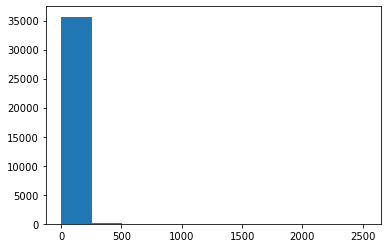

In [23]:
#Degree centrality

degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees)


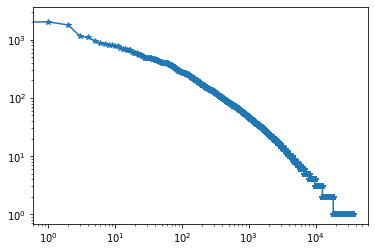

In [24]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
plt.loglog(degree_sequence,marker='*')
plt.show()

(array([3.5652e+04, 9.6000e+01, 1.6000e+01, 7.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 2.5330e+02, 5.0560e+02, 7.5790e+02, 1.0102e+03,
        1.2625e+03, 1.5148e+03, 1.7671e+03, 2.0194e+03, 2.2717e+03,
        2.5240e+03]),
 <BarContainer object of 10 artists>)

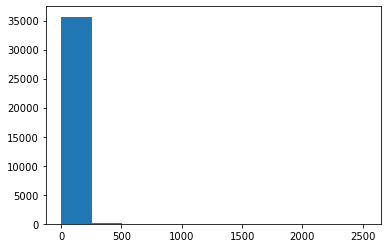

In [25]:
degrees = [G.degree(n, weight='weight') for n in G.nodes()]
plt.hist(degrees)

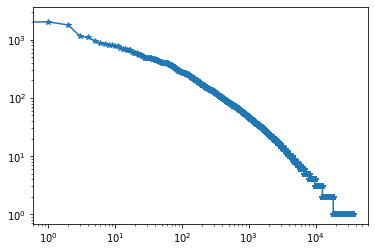

In [26]:
degree_sequence = sorted([d for n, d in G.degree(weight='weight')], reverse=True)
plt.loglog(degree_sequence,marker='*')
plt.show()

In [27]:
degree_centrality = nx.degree_centrality(G)
degree_centrality

{'leagueoflegends': 0.02328441649196366,
 'theredlion': 0.0005870020964360587,
 'inlandempire': 0.00025157232704402514,
 'nfl': 0.00981132075471698,
 'playmygame': 0.0015094339622641509,
 'dogemarket': 0.0048637316561844866,
 'locationbot': 8.385744234800838e-05,
 'indiefied': 8.385744234800838e-05,
 'posthardcore': 0.0006149545772187281,
 'gfycat': 0.0008106219426974144,
 'metalcore': 0.001341719077568134,
 'suicidewatch': 0.007463312368972746,
 'dogecoin': 0.016324248777078963,
 'gaming4gamers': 0.0015932914046121593,
 'kpop': 0.002795248078266946,
 'airsoft': 0.0008944793850454227,
 'circlebroke': 0.013025856044723968,
 'tribes': 0.000670859538784067,
 'oldschoolcoolnsfw': 5.590496156533892e-05,
 'fl_vapers': 5.590496156533892e-05,
 'jailbreak': 0.005562543675751223,
 'corejerk': 0.00030747728860936407,
 'iama': 0.056743535988819004,
 'bandnames': 0.004723969252271139,
 'thedoctorstravels': 0.00011180992313067784,
 'politicaldiscussion': 0.0043046820405310965,
 'uncomfortableqs': 2.

In [28]:
for node in sorted(degree_centrality, key=degree_centrality.get, reverse=True):
  print(node, degree_centrality[node])

askreddit 0.07055206149545772
iama 0.056743535988819004
subredditdrama 0.05042627533193571
writingprompts 0.031949685534591196
outoftheloop 0.030719776380153736
pics 0.026750524109014674
videos 0.024654088050314465
leagueoflegends 0.02328441649196366
todayilearned 0.02280922431865828
gaming 0.022641509433962263
funny 0.02227812718378756
conspiracy 0.02180293501048218
legaladvice 0.019846261355695317
copypasta 0.019371069182389938
drama 0.01928721174004193
worldnews 0.01864430468204053
explainlikeimfive 0.01861635220125786
the_donald 0.018364779874213834
mhoc 0.017442348008385743
news 0.016519916142557652
dogecoin 0.016324248777078963
subredditoftheday 0.016268343815513626
bitcoin 0.01562543675751223
techsupport 0.015457721872816212
pcmasterrace 0.015122292103424178
games 0.014926624737945492
showerthoughts 0.014647099930118798
askhistorians 0.014367575122292102
tipofmypenis 0.013808525506638714
nostupidquestions 0.013808525506638714
shitliberalssay 0.013780573025856044
circlejerkcopypa

dreams 0.0014255765199161425
exchristian 0.0014255765199161425
nursing 0.0014255765199161425
truefilm 0.0014255765199161425
ask_politics 0.0014255765199161425
nutrition 0.0014255765199161425
gravityfalls 0.0014255765199161425
applyingtocollege 0.0014255765199161425
boocredux 0.0014255765199161425
dogemining 0.001397624039133473
debateachristian 0.001397624039133473
statistics 0.001397624039133473
productivity 0.001397624039133473
randomactsofpizza 0.001397624039133473
philadelphia 0.001397624039133473
fatpeoplestories 0.001397624039133473
androiddev 0.001397624039133473
nosleepooc 0.001397624039133473
windows 0.001397624039133473
gametales 0.001397624039133473
vzla 0.001397624039133473
unpopularopinion 0.001397624039133473
wildhockey 0.001397624039133473
software 0.001397624039133473
sixers 0.001397624039133473
nofapwar 0.001397624039133473
flashtv 0.001397624039133473
polandball 0.001397624039133473
upvoted 0.001397624039133473
samharris 0.001397624039133473
slideforreddit 0.001397624

htpc 0.0008106219426974144
nolapelicans 0.0008106219426974144
thunder 0.0008106219426974144
nba2k 0.0008106219426974144
fanfiction 0.0008106219426974144
korean 0.0008106219426974144
tropicalweather 0.0008106219426974144
chineselanguage 0.0008106219426974144
gangstalking 0.0008106219426974144
premed 0.0008106219426974144
redditbay 0.0008106219426974144
hungary 0.0008106219426974144
damnthatsinteresting 0.0008106219426974144
ssbm 0.0008106219426974144
gearvr 0.0008106219426974144
comcast 0.0008106219426974144
indiancountry 0.0008106219426974144
mademesmile 0.0008106219426974144
wheredidthesodago 0.0008106219426974144
academia 0.0008106219426974144
redditcritiques 0.0008106219426974144
interiordesign 0.0008106219426974144
ffrecordkeeper 0.0008106219426974144
morbidquestions 0.0008106219426974144
forwardsfromgrandma 0.0008106219426974144
stellaris 0.0008106219426974144
ggdiscussion 0.0008106219426974144
octobersveryown 0.0008106219426974144
fuckthealtright 0.0008106219426974144
popheadscir

battleborn 0.0005590496156533892
movie_club 0.0005590496156533892
deepintoyoutube 0.0005590496156533892
makingamurderer 0.0005590496156533892
lnfinity 0.0005590496156533892
nintendonx 0.0005590496156533892
cbrbattleroyale 0.0005590496156533892
livestreamfail 0.0005590496156533892
foreverunwanted 0.0005590496156533892
azerbaijan 0.0005590496156533892
enoughhillhate 0.0005590496156533892
thecannibalcaverns 0.0005590496156533892
nomanshigh 0.0005590496156533892
massociatedpress 0.0005590496156533892
marchagainsttrump 0.0005590496156533892
xxketo 0.0005310971348707198
civcraftexchange 0.0005310971348707198
acc 0.0005310971348707198
artistlounge 0.0005310971348707198
taoism 0.0005310971348707198
dogecoindev 0.0005310971348707198
compdota2 0.0005310971348707198
disability 0.0005310971348707198
askmarketing 0.0005310971348707198
free 0.0005310971348707198
mtgfinance 0.0005310971348707198
borderlands2 0.0005310971348707198
louisville 0.0005310971348707198
madokamagica 0.0005310971348707198
mag

mazda 0.00039133473095737245
circlebrokediscussion 0.00039133473095737245
glocks 0.00039133473095737245
limitedhangouts 0.00039133473095737245
drkcoin 0.00039133473095737245
austinguns 0.00039133473095737245
protestantism 0.00039133473095737245
minecraftbuddies 0.00039133473095737245
bahai 0.00039133473095737245
fitbit 0.00039133473095737245
puertorico 0.00039133473095737245
tails 0.00039133473095737245
stalker 0.00039133473095737245
hermitcraft 0.00039133473095737245
estimation 0.00039133473095737245
hentai 0.00039133473095737245
cabalofthebuildsmiths 0.00039133473095737245
esoguilds 0.00039133473095737245
meanjokes 0.00039133473095737245
curlyhair 0.00039133473095737245
yms 0.00039133473095737245
crohnsdisease 0.00039133473095737245
austrian_economics 0.00039133473095737245
stonerengineering 0.00039133473095737245
nflroundtable 0.00039133473095737245
arenafps 0.00039133473095737245
pandr 0.00039133473095737245
birmingham 0.00039133473095737245
wedding 0.00039133473095737245
dreadfort

capitalism 0.00030747728860936407
rochester 0.00030747728860936407
airbnb 0.00030747728860936407
evenewbies 0.00030747728860936407
typography 0.00030747728860936407
care 0.00030747728860936407
madeofstyrofoam 0.00030747728860936407
pokemoninsurgence 0.00030747728860936407
whatsinthisthing 0.00030747728860936407
dpdr 0.00030747728860936407
fidelitypdx 0.00030747728860936407
bestbuy 0.00030747728860936407
wikiinaction 0.00030747728860936407
kaizenbrotherhood 0.00030747728860936407
ehlersdanlos 0.00030747728860936407
leftcommunism 0.00030747728860936407
wales 0.00030747728860936407
landlord 0.00030747728860936407
rapwars 0.00030747728860936407
eqnext 0.00030747728860936407
sf_book_club 0.00030747728860936407
cade 0.00030747728860936407
battlefield_4_cte 0.00030747728860936407
evolvegame 0.00030747728860936407
lootcrate 0.00030747728860936407
deathcabforcutie 0.00030747728860936407
confidence 0.00030747728860936407
waxpen 0.00030747728860936407
asianbros 0.00030747728860936407
twoxsex 0.00

musgov 0.00025157232704402514
applecirclejerk 0.00025157232704402514
kurzgesagt 0.00025157232704402514
strugglefucking 0.00025157232704402514
fa30plus 0.00025157232704402514
fierceflow 0.00025157232704402514
narcsinthewild 0.00025157232704402514
austincipher 0.00025157232704402514
boxoffice 0.00025157232704402514
ebes 0.00025157232704402514
solidworks 0.00025157232704402514
rocksmith 0.00025157232704402514
girlsundpanzer 0.00025157232704402514
archery 0.00025157232704402514
vulkan 0.00025157232704402514
zyramains 0.00025157232704402514
arkfactions 0.00025157232704402514
animebazaar 0.00025157232704402514
everquest 0.00025157232704402514
algotrading 0.00025157232704402514
superleague 0.00025157232704402514
trolling 0.00025157232704402514
phillylist 0.00025157232704402514
roboragi 0.00025157232704402514
ccj888 0.00025157232704402514
lavignyinquisition 0.00025157232704402514
internetpr 0.00025157232704402514
rocketleaguefriends 0.00025157232704402514
depressionregimens 0.00025157232704402

makeupaddicts 0.00019566736547868622
chennai 0.00019566736547868622
ncaafbseries 0.00019566736547868622
babyexchange 0.00019566736547868622
staples 0.00019566736547868622
maidsafe 0.00019566736547868622
greataurantiaco 0.00019566736547868622
minecraftmod 0.00019566736547868622
gnu 0.00019566736547868622
4hourbodyslowcarb 0.00019566736547868622
diesel 0.00019566736547868622
vlc 0.00019566736547868622
numenera 0.00019566736547868622
clojure 0.00019566736547868622
codclanhq 0.00019566736547868622
ranprieur 0.00019566736547868622
redditzeroclan 0.00019566736547868622
needvocals 0.00019566736547868622
project1999 0.00019566736547868622
abletonlive 0.00019566736547868622
excatholic 0.00019566736547868622
rocirclejerk 0.00019566736547868622
pvcommission 0.00019566736547868622
comingout 0.00019566736547868622
drunkorakid 0.00019566736547868622
fifautcoins 0.00019566736547868622
rockband 0.00019566736547868622
creditcards 0.00019566736547868622
scaredshitless 0.00019566736547868622
mst3k 0.0001

ausskincare 0.00016771488469601676
spacextalk 0.00016771488469601676
sooners 0.00016771488469601676
whatsbotheringyou 0.00016771488469601676
comiccon 0.00016771488469601676
stilltrying 0.00016771488469601676
orangeisthenewblack 0.00016771488469601676
buildapchelp 0.00016771488469601676
megaming 0.00016771488469601676
savannah 0.00016771488469601676
techsnap 0.00016771488469601676
kayaking 0.00016771488469601676
jailbreakdevelopers 0.00016771488469601676
sportsbookextra 0.00016771488469601676
steelseries 0.00016771488469601676
gnupg 0.00016771488469601676
pathology 0.00016771488469601676
30daysit 0.00016771488469601676
lasvegas 0.00016771488469601676
grammarnazi 0.00016771488469601676
iwallpaper 0.00016771488469601676
pensacola 0.00016771488469601676
gentoo 0.00016771488469601676
technocracy 0.00016771488469601676
herdofsquirrels 0.00016771488469601676
pugs 0.00016771488469601676
cubancigars 0.00016771488469601676
mcambrosia 0.00016771488469601676
medfordmass 0.00016771488469601676
astr

socialparis 0.0001397624039133473
genomics 0.0001397624039133473
seoul 0.0001397624039133473
neurodiversity 0.0001397624039133473
sourceengine 0.0001397624039133473
austinmotorcycles 0.0001397624039133473
themarketplace 0.0001397624039133473
wargames 0.0001397624039133473
trueseries 0.0001397624039133473
lingerieaddiction 0.0001397624039133473
darkcoinmarket 0.0001397624039133473
cryptohardware 0.0001397624039133473
genetics 0.0001397624039133473
csgocritic 0.0001397624039133473
doctorswithoutborders 0.0001397624039133473
chicagosuburbs 0.0001397624039133473
queenelsa 0.0001397624039133473
colosseumtournament 0.0001397624039133473
ilstu 0.0001397624039133473
expos 0.0001397624039133473
crowdfundingprojects 0.0001397624039133473
reasoners 0.0001397624039133473
crimsonpokemonleague 0.0001397624039133473
sonicshowerthoughts 0.0001397624039133473
payday2secret 0.0001397624039133473
postprocessingclub 0.0001397624039133473
reprap 0.0001397624039133473
gtagivers 0.0001397624039133473
subdred

dogswearingjeans 0.0001397624039133473
milkshakes 0.0001397624039133473
adultsubs 0.0001397624039133473
smartthings 0.0001397624039133473
sassmastah77 0.0001397624039133473
einfach_posten 0.0001397624039133473
kopieerpasta 0.0001397624039133473
watchexchangefeedback 0.0001397624039133473
awww 0.0001397624039133473
reynad 0.0001397624039133473
iranpolitics 0.0001397624039133473
danganroleplay 0.0001397624039133473
mtgeternal 0.0001397624039133473
darksouls3jpn 0.0001397624039133473
courseherohelp 0.0001397624039133473
liberty 0.0001397624039133473
cantax 0.0001397624039133473
canadian_socialism 0.0001397624039133473
basebuildinggames 0.0001397624039133473
s7edge 0.0001397624039133473
bapccanada 0.0001397624039133473
couchpotato 0.0001397624039133473
yorickmains 0.0001397624039133473
youngjustice 0.0001397624039133473
cwarrow 0.0001397624039133473
tacn 0.0001397624039133473
wormrp 0.0001397624039133473
metalgearantinuclear 0.0001397624039133473
learncsharp 0.0001397624039133473
itaglia 0

smu 0.00011180992313067784
missoula 0.00011180992313067784
breakcore 0.00011180992313067784
wildlife 0.00011180992313067784
civcraftroma 0.00011180992313067784
brooklynninenine 0.00011180992313067784
redditangels 0.00011180992313067784
ps4tournaments 0.00011180992313067784
dominion 0.00011180992313067784
tengwar 0.00011180992313067784
crayonpop 0.00011180992313067784
reddithotel 0.00011180992313067784
kyrios 0.00011180992313067784
learnchinese 0.00011180992313067784
learnmandarin 0.00011180992313067784
alienisolation 0.00011180992313067784
boardgamedeals 0.00011180992313067784
gonzomojo 0.00011180992313067784
psoriasis 0.00011180992313067784
foodscience 0.00011180992313067784
blackbooks 0.00011180992313067784
bitcoinbeg 0.00011180992313067784
smashconnect 0.00011180992313067784
kanmusu 0.00011180992313067784
wrestling 0.00011180992313067784
galaxynexus 0.00011180992313067784
defcoin 0.00011180992313067784
ruger 0.00011180992313067784
goldenretrievers 0.00011180992313067784
vocabulary 0

modelushousebudgetcom 0.00011180992313067784
blacklivesmatter 0.00011180992313067784
portabledabs 0.00011180992313067784
aacricketclub 0.00011180992313067784
zeldamains 0.00011180992313067784
slabserver 0.00011180992313067784
fairtax 0.00011180992313067784
catholicpolitics 0.00011180992313067784
hppd 0.00011180992313067784
estoration 0.00011180992313067784
skyhill 0.00011180992313067784
gaybrosgonewild 0.00011180992313067784
cryptoubi 0.00011180992313067784
rskakamile 0.00011180992313067784
sharktank 0.00011180992313067784
loveline 0.00011180992313067784
trundlemains 0.00011180992313067784
mongodb 0.00011180992313067784
survivorrankdowniii 0.00011180992313067784
garmin 0.00011180992313067784
nosperg 0.00011180992313067784
rantsfromretail 0.00011180992313067784
language 0.00011180992313067784
erickrowan 0.00011180992313067784
torontomarlies 0.00011180992313067784
thirdrocksmp 0.00011180992313067784
lapfoxtrax 0.00011180992313067784
kitchens 0.00011180992313067784
renektonmains 0.0001118

columbussocial 8.385744234800838e-05
nuitakeover 8.385744234800838e-05
uva 8.385744234800838e-05
theonlycolors 8.385744234800838e-05
streeteats 8.385744234800838e-05
mavgdesigners 8.385744234800838e-05
brostep 8.385744234800838e-05
iastate 8.385744234800838e-05
hookahtrade 8.385744234800838e-05
wildcats 8.385744234800838e-05
circlemusic 8.385744234800838e-05
germanrap 8.385744234800838e-05
newman4185 8.385744234800838e-05
narutoanime 8.385744234800838e-05
johnmayer 8.385744234800838e-05
beyondthesummit 8.385744234800838e-05
gameidea 8.385744234800838e-05
bluesguitarist 8.385744234800838e-05
meta_feminism 8.385744234800838e-05
rbnspouses 8.385744234800838e-05
awwwtf 8.385744234800838e-05
wowcirclejerk 8.385744234800838e-05
concordia 8.385744234800838e-05
bugout 8.385744234800838e-05
motola 8.385744234800838e-05
civaytosfp 8.385744234800838e-05
kennesaw 8.385744234800838e-05
hardcoresmp 8.385744234800838e-05
xray 8.385744234800838e-05
animals 8.385744234800838e-05
pathfinder 8.3857442348

psx 8.385744234800838e-05
trailmeals 8.385744234800838e-05
fakeidreviewhub 8.385744234800838e-05
thedaslore 8.385744234800838e-05
talesfromelite 8.385744234800838e-05
cicada 8.385744234800838e-05
flowerbridge 8.385744234800838e-05
ctbeer 8.385744234800838e-05
futharkgenerator 8.385744234800838e-05
razorbacks 8.385744234800838e-05
britain 8.385744234800838e-05
manchester_uni 8.385744234800838e-05
tofoodie 8.385744234800838e-05
explainlikeimphd 8.385744234800838e-05
gamingnews 8.385744234800838e-05
gnuterrypratchett 8.385744234800838e-05
nyu 8.385744234800838e-05
buymyfutplayer 8.385744234800838e-05
wrestlefigs 8.385744234800838e-05
zugorphans 8.385744234800838e-05
traveller 8.385744234800838e-05
hbl 8.385744234800838e-05
soundgarden 8.385744234800838e-05
steelicarus 8.385744234800838e-05
gunplatestbay 8.385744234800838e-05
darknetmarketsnz 8.385744234800838e-05
lawcanada 8.385744234800838e-05
unix 8.385744234800838e-05
deadwood 8.385744234800838e-05
gamergatecopypasta 8.385744234800838e

lafc 8.385744234800838e-05
baconitdev 8.385744234800838e-05
shittyaskflying 8.385744234800838e-05
ausbeer 8.385744234800838e-05
blacklight 8.385744234800838e-05
teamtimessquare 8.385744234800838e-05
husky 8.385744234800838e-05
panicatthedisco 8.385744234800838e-05
thealkaizer 8.385744234800838e-05
bakubakuworldproblems 8.385744234800838e-05
trollymovienight 8.385744234800838e-05
skyrimmodders 8.385744234800838e-05
enhancement_ja 8.385744234800838e-05
letstradepedals 8.385744234800838e-05
imaginaryhorrors 8.385744234800838e-05
fuckwaffle 8.385744234800838e-05
immortals_gg 8.385744234800838e-05
cebu 8.385744234800838e-05
pacifism 8.385744234800838e-05
wingchun 8.385744234800838e-05
charcreations 8.385744234800838e-05
timferrissshow 8.385744234800838e-05
juststemthings 8.385744234800838e-05
2meirl42meirl4meirl 8.385744234800838e-05
teamfathertime 8.385744234800838e-05
awesomenauts 8.385744234800838e-05
pine64 8.385744234800838e-05
survivorfeedback 8.385744234800838e-05
herossong 8.3857442

osheaga 8.385744234800838e-05
jungle_mains 8.385744234800838e-05
fender 8.385744234800838e-05
gibson 8.385744234800838e-05
clayton_kershaw 8.385744234800838e-05
modelwsj 8.385744234800838e-05
kiljoysglyphs 8.385744234800838e-05
axolotls 8.385744234800838e-05
rogers 8.385744234800838e-05
gtavmoneyhax 8.385744234800838e-05
gtamoneydrop 8.385744234800838e-05
springawakening 8.385744234800838e-05
modelnewstatesman 8.385744234800838e-05
beadsprites 8.385744234800838e-05
business_ideas 8.385744234800838e-05
overwatchcustomgames 8.385744234800838e-05
dragonquest 8.385744234800838e-05
stairsinthewoods 8.385744234800838e-05
duckdose 8.385744234800838e-05
bitcoinclassic 8.385744234800838e-05
teflshit 8.385744234800838e-05
modelinnocenceproject 8.385744234800838e-05
noahsotherark 8.385744234800838e-05
eredivisie 8.385744234800838e-05
herobuilds 8.385744234800838e-05
halomythic 8.385744234800838e-05
murderhomelesspeople 8.385744234800838e-05
ringplus 8.385744234800838e-05
playconanservers 8.385744

pfsteel 5.590496156533892e-05
coimbatore 5.590496156533892e-05
northpool 5.590496156533892e-05
tagproconspiracies 5.590496156533892e-05
windowsxp 5.590496156533892e-05
physec 5.590496156533892e-05
derekbest 5.590496156533892e-05
macro 5.590496156533892e-05
jobs4crypto 5.590496156533892e-05
browsergames 5.590496156533892e-05
weddings 5.590496156533892e-05
casualcraft 5.590496156533892e-05
gongfutea 5.590496156533892e-05
kritzkast 5.590496156533892e-05
bitofnewsbot 5.590496156533892e-05
piperwallet 5.590496156533892e-05
80smusic 5.590496156533892e-05
esofishing 5.590496156533892e-05
pacificrim 5.590496156533892e-05
gamingmentors 5.590496156533892e-05
belicoin 5.590496156533892e-05
dogeart 5.590496156533892e-05
mcpico 5.590496156533892e-05
garyc 5.590496156533892e-05
baseballcards 5.590496156533892e-05
oculusdev 5.590496156533892e-05
decoratingmyapt 5.590496156533892e-05
thenauticaltroupe 5.590496156533892e-05
reddittolerancecorps 5.590496156533892e-05
terracoin 5.590496156533892e-05
wors

marvelcirclejerk 5.590496156533892e-05
shitbluepillerssay 5.590496156533892e-05
24hoursofuhc 5.590496156533892e-05
eveporn 5.590496156533892e-05
seattlebike 5.590496156533892e-05
nowow 5.590496156533892e-05
shameless 5.590496156533892e-05
wissenschaft 5.590496156533892e-05
insurgencebattles 5.590496156533892e-05
trololololololololol 5.590496156533892e-05
skyrimmodhelp 5.590496156533892e-05
thesouthbay 5.590496156533892e-05
dubstepawards2014 5.590496156533892e-05
truetrueaskreddit 5.590496156533892e-05
songaweek 5.590496156533892e-05
rideottawa 5.590496156533892e-05
indonesiangamers 5.590496156533892e-05
ecigindia 5.590496156533892e-05
postpunk 5.590496156533892e-05
paymentproof 5.590496156533892e-05
eberron 5.590496156533892e-05
crayfish 5.590496156533892e-05
libertarianeurope 5.590496156533892e-05
ecycle 5.590496156533892e-05
fremantlefc 5.590496156533892e-05
disneyhs 5.590496156533892e-05
synesthesia 5.590496156533892e-05
solvingd2b 5.590496156533892e-05
pieces 5.590496156533892e-05


yoyo 5.590496156533892e-05
afrikaans 5.590496156533892e-05
hawkeye 5.590496156533892e-05
worldcrisis 5.590496156533892e-05
motoe 5.590496156533892e-05
coilgore 5.590496156533892e-05
removevegemite 5.590496156533892e-05
eder 5.590496156533892e-05
freegiveaways 5.590496156533892e-05
shipping 5.590496156533892e-05
bestoftldr 5.590496156533892e-05
totalwararena 5.590496156533892e-05
fastfoodreview 5.590496156533892e-05
kotaku_kotaku 5.590496156533892e-05
hideaway_jp 5.590496156533892e-05
afabledhero 5.590496156533892e-05
downvotetrolling 5.590496156533892e-05
er6t3e 5.590496156533892e-05
askprogrammers 5.590496156533892e-05
bowyer 5.590496156533892e-05
shunt31 5.590496156533892e-05
agorism 5.590496156533892e-05
textdetectives 5.590496156533892e-05
singleparents 5.590496156533892e-05
nim 5.590496156533892e-05
tonga 5.590496156533892e-05
attachmentparenting 5.590496156533892e-05
purduef1 5.590496156533892e-05
nipponichi 5.590496156533892e-05
snowcrack 5.590496156533892e-05
vampireweekend 5.5

ankylosingspondylitis 5.590496156533892e-05
dirtylab 5.590496156533892e-05
texastech 5.590496156533892e-05
eastereggs 5.590496156533892e-05
t0bys_storycorner 5.590496156533892e-05
comicbooksuggest 5.590496156533892e-05
orchestra 5.590496156533892e-05
watch4k 5.590496156533892e-05
bokudakegainaimachi 5.590496156533892e-05
ncsuteamalpha 5.590496156533892e-05
dalaranwow 5.590496156533892e-05
diplomacy 5.590496156533892e-05
brownman 5.590496156533892e-05
gintellectual 5.590496156533892e-05
nintype 5.590496156533892e-05
mongolkhalasar 5.590496156533892e-05
memorialwall 5.590496156533892e-05
riftintothemind 5.590496156533892e-05
terrorwatch 5.590496156533892e-05
goregrind 5.590496156533892e-05
deckwash900 5.590496156533892e-05
tiki 5.590496156533892e-05
thecultofkeisae 5.590496156533892e-05
goldcoast 5.590496156533892e-05
entershikari 5.590496156533892e-05
samuelenderby 5.590496156533892e-05
xwingonline 5.590496156533892e-05
askreddit_ja 5.590496156533892e-05
kitsuneworlddevblog 5.5904961565

dune 5.590496156533892e-05
pokemongokc 5.590496156533892e-05
incest_erotica 5.590496156533892e-05
earrumblersassemble 5.590496156533892e-05
disneycomics 5.590496156533892e-05
mocopogo 5.590496156533892e-05
mspa 5.590496156533892e-05
asklinuxusers 5.590496156533892e-05
camgirls 5.590496156533892e-05
pokemongoutah 5.590496156533892e-05
nolago 5.590496156533892e-05
pokemongo_orlando 5.590496156533892e-05
pokemongotucson 5.590496156533892e-05
islamicleft 5.590496156533892e-05
romanceauthors 5.590496156533892e-05
steemit 5.590496156533892e-05
auto 5.590496156533892e-05
pokemongoku 5.590496156533892e-05
clashdecks 5.590496156533892e-05
chartercable 5.590496156533892e-05
traumaticchildhood 5.590496156533892e-05
hoverjunkers 5.590496156533892e-05
hamptonroadspogo 5.590496156533892e-05
pokemongo_dc 5.590496156533892e-05
alexa 5.590496156533892e-05
cavesofqud 5.590496156533892e-05
bestofclearandsweet 5.590496156533892e-05
montrealgo 5.590496156533892e-05
pokemongoerie 5.590496156533892e-05
tenwo

blues 5.590496156533892e-05
campusreform 5.590496156533892e-05
foreignpolicy 5.590496156533892e-05
bitfinex 5.590496156533892e-05
april2017bumpers 5.590496156533892e-05
thrillsleep 5.590496156533892e-05
subaruimpreza 5.590496156533892e-05
torment 5.590496156533892e-05
switch 5.590496156533892e-05
idopokemanstuff 5.590496156533892e-05
cadamus 5.590496156533892e-05
aboveandbeyond 5.590496156533892e-05
firstimpressions 5.590496156533892e-05
cssenatechamber 5.590496156533892e-05
captainnintendodude 5.590496156533892e-05
unmodified 5.590496156533892e-05
pricecheck 5.590496156533892e-05
goldenmanager 5.590496156533892e-05
kinksters_gone_wild 5.590496156533892e-05
the_street 5.590496156533892e-05
gw2exchange 5.590496156533892e-05
captainsugar 5.590496156533892e-05
mormonscholar 5.590496156533892e-05
shelterandstrength 5.590496156533892e-05
metalfoundry 5.590496156533892e-05
badphysics 5.590496156533892e-05
rice 5.590496156533892e-05
chmuranet 5.590496156533892e-05
tokkiefeesboek 5.59049615653

shortfilms 5.590496156533892e-05
before_after_cumsluts 5.590496156533892e-05
anno 5.590496156533892e-05
jakielim 5.590496156533892e-05
100daysofrejection 5.590496156533892e-05
kingofthehill 5.590496156533892e-05
wingsoffire 5.590496156533892e-05
fastworkers 5.590496156533892e-05
seattleherf 5.590496156533892e-05
raidandguildleaders 5.590496156533892e-05
preggoporn 5.590496156533892e-05
alcoholicsanonymous 5.590496156533892e-05
fretton 5.590496156533892e-05
sugarfreemua 5.590496156533892e-05
keming 5.590496156533892e-05
thewastes 5.590496156533892e-05
notgayporn 5.590496156533892e-05
siloportem 5.590496156533892e-05
web_dev 5.590496156533892e-05
mholbills 5.590496156533892e-05
primedaydeals 5.590496156533892e-05
trinity_x_scripts 5.590496156533892e-05
cmhocverify 5.590496156533892e-05
noisygifs 5.590496156533892e-05
redditfbdynasty 5.590496156533892e-05
japanesefood 5.590496156533892e-05
mischevous 5.590496156533892e-05
skywind 5.590496156533892e-05
interviewfauxyou 5.590496156533892e-0

highdadjokes 2.795248078266946e-05
team_mediocre 2.795248078266946e-05
fapfap 2.795248078266946e-05
yugioheconomy 2.795248078266946e-05
kittehcoinmarket 2.795248078266946e-05
chattanoogaents 2.795248078266946e-05
salukis 2.795248078266946e-05
mvtest2 2.795248078266946e-05
explainlikeimspock 2.795248078266946e-05
darktheme 2.795248078266946e-05
incrypto 2.795248078266946e-05
nxtcoin 2.795248078266946e-05
rugc_europe 2.795248078266946e-05
catfishingtales 2.795248078266946e-05
501st 2.795248078266946e-05
truegamedev 2.795248078266946e-05
pokedexcompletion 2.795248078266946e-05
pocketsmite 2.795248078266946e-05
newscientist 2.795248078266946e-05
mlplore 2.795248078266946e-05
incrementalzoo 2.795248078266946e-05
ualberta 2.795248078266946e-05
thinkpadcirclejerk 2.795248078266946e-05
sharedactown 2.795248078266946e-05
dogemarketeu 2.795248078266946e-05
redditwanderers 2.795248078266946e-05
coino 2.795248078266946e-05
idliketobeatree 2.795248078266946e-05
baththoughts 2.795248078266946e-05
xc

bds 2.795248078266946e-05
luciddreams 2.795248078266946e-05
tagprowcbosnia 2.795248078266946e-05
maneshhalai 2.795248078266946e-05
sylumgetsrekt 2.795248078266946e-05
sandcreek 2.795248078266946e-05
newport 2.795248078266946e-05
symbian 2.795248078266946e-05
sethbling 2.795248078266946e-05
foals 2.795248078266946e-05
shitelitistssay 2.795248078266946e-05
ygorp 2.795248078266946e-05
mlpspike 2.795248078266946e-05
ligadequito 2.795248078266946e-05
amsterdaments 2.795248078266946e-05
lgbtopenmodmail 2.795248078266946e-05
pmnetplay 2.795248078266946e-05
europetravelpics 2.795248078266946e-05
heatcss 2.795248078266946e-05
aytossk 2.795248078266946e-05
clannunu 2.795248078266946e-05
roplay 2.795248078266946e-05
guncollecting 2.795248078266946e-05
pcsleeving 2.795248078266946e-05
sega 2.795248078266946e-05
darkwallet 2.795248078266946e-05
melbournecirclejerk 2.795248078266946e-05
happyfunplayground 2.795248078266946e-05
dsaa 2.795248078266946e-05
milkrunners 2.795248078266946e-05
zombieboxes 

gamechap 2.795248078266946e-05
outofthejerk 2.795248078266946e-05
gamergatediscussion 2.795248078266946e-05
partcontrolproblems 2.795248078266946e-05
bitchaboutrsoccer 2.795248078266946e-05
tibia 2.795248078266946e-05
ohtea 2.795248078266946e-05
bucuresti 2.795248078266946e-05
horrorshortstories 2.795248078266946e-05
nochrontext 2.795248078266946e-05
handguns 2.795248078266946e-05
jontronshowerthoughts 2.795248078266946e-05
politicsdebunked 2.795248078266946e-05
tppconfessions 2.795248078266946e-05
padguides 2.795248078266946e-05
creepyweb 2.795248078266946e-05
worshipporn 2.795248078266946e-05
palsbarainaction 2.795248078266946e-05
poppunkjerk 2.795248078266946e-05
parallelview 2.795248078266946e-05
twoxmtg 2.795248078266946e-05
kansascitybeer 2.795248078266946e-05
jorga 2.795248078266946e-05
customedh 2.795248078266946e-05
ncaafbstories 2.795248078266946e-05
betanetwork 2.795248078266946e-05
indiandadjokes 2.795248078266946e-05
dwarfism 2.795248078266946e-05
euphonium 2.7952480782669

allisforgiven 2.795248078266946e-05
stemlogic 2.795248078266946e-05
survivalunion 2.795248078266946e-05
pythonforum 2.795248078266946e-05
casualgrilledcheese 2.795248078266946e-05
fundamentalanalysis 2.795248078266946e-05
noodlenaughts 2.795248078266946e-05
wearality 2.795248078266946e-05
massrezinc 2.795248078266946e-05
emp 2.795248078266946e-05
thewalkingreddits 2.795248078266946e-05
soloboardgaming 2.795248078266946e-05
tightsqueeze 2.795248078266946e-05
oneplusoneinvites 2.795248078266946e-05
longboardingdistance 2.795248078266946e-05
tagproafterdark 2.795248078266946e-05
thefirststep 2.795248078266946e-05
metalocalypseseason5 2.795248078266946e-05
podstuck 2.795248078266946e-05
tloucensored 2.795248078266946e-05
badtransmogs 2.795248078266946e-05
jorsun 2.795248078266946e-05
avitus 2.795248078266946e-05
nightmaresmp 2.795248078266946e-05
onetruetohsaka 2.795248078266946e-05
neutralpolitics_de 2.795248078266946e-05
feverclangaming 2.795248078266946e-05
civcraftama 2.795248078266946

race_realism 2.795248078266946e-05
djtunes 2.795248078266946e-05
deadlyunicorn 2.795248078266946e-05
benin 2.795248078266946e-05
sesamestreet 2.795248078266946e-05
thehitchhikers 2.795248078266946e-05
ocala 2.795248078266946e-05
islamicstudies 2.795248078266946e-05
64realquick 2.795248078266946e-05
modelushousewaysmeans 2.795248078266946e-05
imptech 2.795248078266946e-05
trainsim 2.795248078266946e-05
glutenfreecooking 2.795248078266946e-05
pcgiveaways 2.795248078266946e-05
frenchsubs 2.795248078266946e-05
intercellar 2.795248078266946e-05
lomquestguild 2.795248078266946e-05
avengers 2.795248078266946e-05
cujo 2.795248078266946e-05
pennydreadful 2.795248078266946e-05
bassvoices 2.795248078266946e-05
libertytribune 2.795248078266946e-05
gorescueme 2.795248078266946e-05
arcaneseries 2.795248078266946e-05
thebattler 2.795248078266946e-05
bengalcats 2.795248078266946e-05
botswana 2.795248078266946e-05
burkinafaso 2.795248078266946e-05
jmbagels 2.795248078266946e-05
burundi 2.79524807826694

ficclub 2.795248078266946e-05
sammyclassicsonicfan 2.795248078266946e-05
missouripoliticsalt 2.795248078266946e-05
thelostwoods 2.795248078266946e-05
caprica 2.795248078266946e-05
cuntycat2 2.795248078266946e-05
foreignwordoftheday 2.795248078266946e-05
redditvgcleague 2.795248078266946e-05
milkychanpanties 2.795248078266946e-05
warplanesnuffporn 2.795248078266946e-05
noaccounttest 2.795248078266946e-05
mastiff 2.795248078266946e-05
orlendr 2.795248078266946e-05
mechanicalkeyboard 2.795248078266946e-05
bikeslc 2.795248078266946e-05
mbtidating 2.795248078266946e-05
savepepe 2.795248078266946e-05
pdu 2.795248078266946e-05
fuckeduptits 2.795248078266946e-05
nolanyager 2.795248078266946e-05
askoldpeople 2.795248078266946e-05
roboskeltal 2.795248078266946e-05
tool_force 2.795248078266946e-05
dogecoincss 2.795248078266946e-05
yween 2.795248078266946e-05
learnruby 2.795248078266946e-05
montco 2.795248078266946e-05
thesilvercage 2.795248078266946e-05
athernice 2.795248078266946e-05
tautaitaisn

f5networks 2.795248078266946e-05
niuniverse 2.795248078266946e-05
childfreemilitary 2.795248078266946e-05
futureology 2.795248078266946e-05
lifeatsea 2.795248078266946e-05
xxsnailkillerxx 2.795248078266946e-05
me_irl_anarchy 2.795248078266946e-05
stevenage 2.795248078266946e-05
repeatthealamo 2.795248078266946e-05
geo1088_sandbox 2.795248078266946e-05
newbrunswicknj 2.795248078266946e-05
dumfriesandgalloway 2.795248078266946e-05
teaparty 2.795248078266946e-05
bloodnotes 2.795248078266946e-05
bungieplease 2.795248078266946e-05
multiplemyeloma 2.795248078266946e-05
fadehosting 2.795248078266946e-05
wiltshire 2.795248078266946e-05
cheltenham 2.795248078266946e-05
allwomen 2.795248078266946e-05
chippenham 2.795248078266946e-05
bournemouth 2.795248078266946e-05
textsecure 2.795248078266946e-05
younglabour 2.795248078266946e-05
southwales 2.795248078266946e-05
territoriolivre 2.795248078266946e-05
plymouth 2.795248078266946e-05
newportsw 2.795248078266946e-05
croydon 2.795248078266946e-05
la

powerbrikdoesstuff 2.795248078266946e-05
smolderingego 2.795248078266946e-05
chinchilladave 2.795248078266946e-05
novaprospekt 2.795248078266946e-05
shareastory 2.795248078266946e-05
gatedtulpas 2.795248078266946e-05
poopvandals 2.795248078266946e-05
theforceawakens 2.795248078266946e-05
dinoempires 2.795248078266946e-05
bettergfmotes 2.795248078266946e-05
lookatthis 2.795248078266946e-05
battlefrontoce 2.795248078266946e-05
circlejerkofclans 2.795248078266946e-05
seanpenname 2.795248078266946e-05
newids 2.795248078266946e-05
gtd 2.795248078266946e-05
phoenixgamers 2.795248078266946e-05
redditupsilon 2.795248078266946e-05
solverant_codicis 2.795248078266946e-05
freechampionsbot 2.795248078266946e-05
sexjournal 2.795248078266946e-05
weed_ja 2.795248078266946e-05
ssgcsgo 2.795248078266946e-05
mhonline 2.795248078266946e-05
swcommander 2.795248078266946e-05
zodia 2.795248078266946e-05
ytpl 2.795248078266946e-05
dcjj 2.795248078266946e-05
letsnotmeetfr 2.795248078266946e-05
warriorspickup 

premiumshare 2.795248078266946e-05
pcbsd 2.795248078266946e-05
lontv 2.795248078266946e-05
piccolifascidiritaly 2.795248078266946e-05
rocketry 2.795248078266946e-05
moonhunters 2.795248078266946e-05
upguards 2.795248078266946e-05
cogneuro 2.795248078266946e-05
premiumaccounts 2.795248078266946e-05
retrogifs 2.795248078266946e-05
sansastark 2.795248078266946e-05
cactusleague 2.795248078266946e-05
ohthatwasme 2.795248078266946e-05
renoise 2.795248078266946e-05
timeparadox 2.795248078266946e-05
shareyourtwocents 2.795248078266946e-05
weirwood 2.795248078266946e-05
villarrealcf 2.795248078266946e-05
redvditmoviechallenge 2.795248078266946e-05
gliding 2.795248078266946e-05
androidbetaprogram 2.795248078266946e-05
singaporeinashellnut 2.795248078266946e-05
jaysonsama 2.795248078266946e-05
captionbot 2.795248078266946e-05
transam617 2.795248078266946e-05
theredpillcirclejerk 2.795248078266946e-05
teflcirclejerk 2.795248078266946e-05
treehome 2.795248078266946e-05
knightsradiantcr 2.7952480782

aircrack 2.795248078266946e-05
solarpunk 2.795248078266946e-05
swtg 2.795248078266946e-05
bolsonaro 2.795248078266946e-05
activistmedia 2.795248078266946e-05
harryprompter 2.795248078266946e-05
silphroadar 2.795248078266946e-05
silphroadtn 2.795248078266946e-05
silphroadms 2.795248078266946e-05
pachaedits 2.795248078266946e-05
praiseyogg 2.795248078266946e-05
killerstormclan 2.795248078266946e-05
chillwaveproduction 2.795248078266946e-05
fnafshitposts 2.795248078266946e-05
whateveryouwantposted 2.795248078266946e-05
modelindonesia 2.795248078266946e-05
fountainpencirclejerk 2.795248078266946e-05
dairywhitecup 2.795248078266946e-05
unexpectedanalbleach 2.795248078266946e-05
afcwimbledon 2.795248078266946e-05
thenamers 2.795248078266946e-05
maabmakeup 2.795248078266946e-05
kratom411 2.795248078266946e-05
ml16 2.795248078266946e-05
realberniesanders 2.795248078266946e-05
freecodecamp 2.795248078266946e-05
canigetawaywithit 2.795248078266946e-05
ibew 2.795248078266946e-05
btcnewsfeed 2.795

soft2hard 2.795248078266946e-05
thechapel 2.795248078266946e-05
talesofgeneraltech 2.795248078266946e-05
miifightermains 2.795248078266946e-05
deadbedroomtalk 2.795248078266946e-05
beretta 2.795248078266946e-05
demonichorde 2.795248078266946e-05
miifighters 2.795248078266946e-05
pol__invictus 2.795248078266946e-05
cruzazul 2.795248078266946e-05
automagic 2.795248078266946e-05
emojerk 2.795248078266946e-05
pokemongotulsa 2.795248078266946e-05
askandthink 2.795248078266946e-05
maimaischmiede 2.795248078266946e-05
gweroisdead 2.795248078266946e-05
highschooldxdcj 2.795248078266946e-05
venezia 2.795248078266946e-05
pokemongobelgium 2.795248078266946e-05
monsterhuntermeetup 2.795248078266946e-05
pokemongonc 2.795248078266946e-05
free_downvotes 2.795248078266946e-05
raisedbynarcicists 2.795248078266946e-05
chihayafuru 2.795248078266946e-05
casualmua 2.795248078266946e-05
horseheadff 2.795248078266946e-05
mhfuios 2.795248078266946e-05
theholysphere 2.795248078266946e-05
datpizz 2.795248078266

rmtkgroenlinks 2.795248078266946e-05
tixati 2.795248078266946e-05
mcedit 2.795248078266946e-05
factoriommo 2.795248078266946e-05
michelinas 2.795248078266946e-05
worldconquest 2.795248078266946e-05
trumpquotes 2.795248078266946e-05
neuromusculardent 2.795248078266946e-05
paulftompkins 2.795248078266946e-05
christianmetal 2.795248078266946e-05
hillary_for_prison 2.795248078266946e-05
darcechokes 2.795248078266946e-05
hugofdeath 2.795248078266946e-05
wowguild 2.795248078266946e-05
nbafantasyph 2.795248078266946e-05
tiap 2.795248078266946e-05
pangolinappreciation 2.795248078266946e-05
underscorewarrior 2.795248078266946e-05
rape2 2.795248078266946e-05
7thsea 2.795248078266946e-05
2016splits 2.795248078266946e-05
dresdenfilesrpg 2.795248078266946e-05
legaladvicecanada 2.795248078266946e-05
apsu 2.795248078266946e-05
nintendodiscussion 2.795248078266946e-05
sanjosesucks 2.795248078266946e-05
aquariumquestions 2.795248078266946e-05
discofreak 2.795248078266946e-05
omega0678 2.795248078266946

nomansskysurvival 2.795248078266946e-05
shitty_dream_meanings 2.795248078266946e-05
jinanenglish 2.795248078266946e-05
tryndameremains 2.795248078266946e-05
brawlhallacirclejerk 2.795248078266946e-05
playsoftheyear 2.795248078266946e-05
scottgames 2.795248078266946e-05
trollanxiety 2.795248078266946e-05
coldharambe 2.795248078266946e-05
musicianprogrammer 2.795248078266946e-05
awakestories 2.795248078266946e-05
elitex3 2.795248078266946e-05
angelaeingezoomt 2.795248078266946e-05
holdmywine 2.795248078266946e-05
centerfoldvapeco 2.795248078266946e-05
alkmaar 2.795248078266946e-05
seedexchange 2.795248078266946e-05
asktrans 2.795248078266946e-05
forcedpuns 2.795248078266946e-05
jputna 2.795248078266946e-05
poker_theory 2.795248078266946e-05
euznhapa 2.795248078266946e-05
truehapas 2.795248078266946e-05
theinfection 2.795248078266946e-05
theincels 2.795248078266946e-05
hyouka 2.795248078266946e-05
sssnarrations 2.795248078266946e-05
beatbox 2.795248078266946e-05
bitcoinusa 2.7952480782669

happyskirmish 2.795248078266946e-05
roguemattw 2.795248078266946e-05
hugeboobsjav 2.795248078266946e-05
mitch 2.795248078266946e-05
trollxweddings 2.795248078266946e-05
cgpgrey2 2.795248078266946e-05
karmaindex 2.795248078266946e-05
titanstesting 2.795248078266946e-05
frogsandtoads 2.795248078266946e-05
shittyeconomics 2.795248078266946e-05
quadricorns 2.795248078266946e-05
ammunition 2.795248078266946e-05
5nailwrites 2.795248078266946e-05
nigger_dicks_in_anus 2.795248078266946e-05
whiskyeurope 2.795248078266946e-05
wearewaiting 2.795248078266946e-05
channelzero 2.795248078266946e-05
askdemocrats 2.795248078266946e-05
alienagenda 2.795248078266946e-05
ces 2.795248078266946e-05
omniscientshadow 2.795248078266946e-05
arcaneadventures 2.795248078266946e-05
lgbtfurry 2.795248078266946e-05
cryptosteel 2.795248078266946e-05
cityflow 2.795248078266946e-05
fansofmma 2.795248078266946e-05
diyhouse 2.795248078266946e-05
allthingswaytools 2.795248078266946e-05
imperialassault 2.795248078266946e-0

mercwithamouth 2.795248078266946e-05
weirdfetish 2.795248078266946e-05
dndincharacter 2.795248078266946e-05
wackyj4ckie 2.795248078266946e-05
nazi 2.795248078266946e-05
lgwatchsport 2.795248078266946e-05
tbtif 2.795248078266946e-05
limitedaccess 2.795248078266946e-05
baystars 2.795248078266946e-05
reclaimant 2.795248078266946e-05
vermiculture 2.795248078266946e-05
projectozone2 2.795248078266946e-05
reinhardtmains 2.795248078266946e-05
warclicks 2.795248078266946e-05
jogatina 2.795248078266946e-05
elysion 2.795248078266946e-05
factionparadox 2.795248078266946e-05
valkyrie_en 2.795248078266946e-05
duckgame 2.795248078266946e-05
scammingcommunity 2.795248078266946e-05
stonedhq 2.795248078266946e-05
rphradio 2.795248078266946e-05
irk 2.795248078266946e-05
getmestarted 2.795248078266946e-05
kemonofriends 2.795248078266946e-05
thriftstorehaulsjerk 2.795248078266946e-05
reactivedogs 2.795248078266946e-05
writerhorrible 2.795248078266946e-05
stobugs 2.795248078266946e-05
cubetrades 2.79524807

video 2.795248078266946e-05
notquiteultralight 2.795248078266946e-05
facebookreddits 2.795248078266946e-05
team_esperanto 2.795248078266946e-05
bbwgw 2.795248078266946e-05
rektgame 2.795248078266946e-05
nae4 2.795248078266946e-05
asianhottiesgifs 2.795248078266946e-05
sailingcrew 2.795248078266946e-05
dogecoin_business 2.795248078266946e-05
altgonewild 2.795248078266946e-05
bitwasp 2.795248078266946e-05
halo2 2.795248078266946e-05
godus 2.795248078266946e-05
linuxevolved 2.795248078266946e-05
vancouverfood 2.795248078266946e-05
whatintheheck 2.795248078266946e-05
turquoisemoors 2.795248078266946e-05
redditeu 2.795248078266946e-05
straightgirlsplaying 2.795248078266946e-05
goatsimulator 2.795248078266946e-05
subredditdramacubed 2.795248078266946e-05
bitcoinpuzzles 2.795248078266946e-05
fmnetwork 2.795248078266946e-05
nbaultimatedraft 2.795248078266946e-05
howimetyourmother 2.795248078266946e-05
powerpoint 2.795248078266946e-05
3932695 2.795248078266946e-05
resistancehigh 2.7952480782669

journalentries 2.795248078266946e-05
halibut 2.795248078266946e-05
deafskype 2.795248078266946e-05
bodyboarding 2.795248078266946e-05
mildlyterrifying 2.795248078266946e-05
bluejacketsgwg 2.795248078266946e-05
uprising18 2.795248078266946e-05
hiltonhead 2.795248078266946e-05
theegixuswar 2.795248078266946e-05
pbp5ednd2 2.795248078266946e-05
wichitalan 2.795248078266946e-05
grandtheftautovi 2.795248078266946e-05
aalto 2.795248078266946e-05
booknfto 2.795248078266946e-05
jfk 2.795248078266946e-05
poopsacks 2.795248078266946e-05
happyembarrassedgirls 2.795248078266946e-05
nukevfx 2.795248078266946e-05
pzservers 2.795248078266946e-05
phil_s_stein 2.795248078266946e-05
hartfordwolfpack 2.795248078266946e-05
coyotesgwg 2.795248078266946e-05
handrails 2.795248078266946e-05
chart_bot 2.795248078266946e-05
delco 2.795248078266946e-05
totler 2.795248078266946e-05
arttheory 2.795248078266946e-05
smashbash 2.795248078266946e-05
baritone 2.795248078266946e-05
declineporn 2.795248078266946e-05
smutu

play_it_forward 2.795248078266946e-05
fateofremnant 2.795248078266946e-05
doublepiemafia 2.795248078266946e-05
crockpot 2.795248078266946e-05
ffpictlogica 2.795248078266946e-05
sufficiencybot 2.795248078266946e-05
malefashionuk 2.795248078266946e-05
convoy 2.795248078266946e-05
mygun 2.795248078266946e-05
clothesripping 2.795248078266946e-05
spedwards 2.795248078266946e-05
amishsmp 2.795248078266946e-05
homemadegayporn 2.795248078266946e-05
numberwang 2.795248078266946e-05
historicalpowerball 2.795248078266946e-05
iosfonts 2.795248078266946e-05
uvhbx 2.795248078266946e-05
breathinginformation 2.795248078266946e-05
dayzsaservers 2.795248078266946e-05
k5blazer 2.795248078266946e-05
thefreerpghunt 2.795248078266946e-05
pathofdiablotrade 2.795248078266946e-05
rockhunters 2.795248078266946e-05
fireflyonline 2.795248078266946e-05
aap_logic 2.795248078266946e-05
unr 2.795248078266946e-05
mlmscams 2.795248078266946e-05
boats 2.795248078266946e-05
lyra 2.795248078266946e-05
retroshare 2.7952480

432mystery 2.795248078266946e-05
paidnygiants 2.795248078266946e-05
dragonsdogmaonline 2.795248078266946e-05
hellenicpolytheism 2.795248078266946e-05
kaalaaaa 2.795248078266946e-05
imaginarygiants 2.795248078266946e-05
musiceducation 2.795248078266946e-05
curseny 2.795248078266946e-05
tbx 2.795248078266946e-05
nsfwvideos 2.795248078266946e-05
degreestohitler 2.795248078266946e-05
troxellophilus 2.795248078266946e-05
imaginaryairships 2.795248078266946e-05
pokefurs 2.795248078266946e-05
bonsaiporn 2.795248078266946e-05
coinop 2.795248078266946e-05
writerscraft 2.795248078266946e-05
fire 2.795248078266946e-05
warhammer30k 2.795248078266946e-05
videogamewallpapers 2.795248078266946e-05
timelessgazongas 2.795248078266946e-05
hogskoleprovet 2.795248078266946e-05
highsocietyradio 2.795248078266946e-05
subtest12345 2.795248078266946e-05
bloodbowl2 2.795248078266946e-05
conspiracydocumentary 2.795248078266946e-05
hamiltonbookclub 2.795248078266946e-05
justbronythings 2.795248078266946e-05
tran

mirageaw 2.795248078266946e-05
ericzane 2.795248078266946e-05
yorkubuddy 2.795248078266946e-05
catslaps 2.795248078266946e-05
throneofliesgame 2.795248078266946e-05
terminuspz 2.795248078266946e-05
darkzoneconfessions 2.795248078266946e-05
gfrommaui 2.795248078266946e-05
point08 2.795248078266946e-05
noladandd 2.795248078266946e-05
snapshillbotex 2.795248078266946e-05
tstodesign 2.795248078266946e-05
thesecretexpo 2.795248078266946e-05
autofellatio 2.795248078266946e-05
randomnsfw 2.795248078266946e-05
maddenmonarchy 2.795248078266946e-05
fkjhsdkjcnhasdchk 2.795248078266946e-05
ps2cobaltair 2.795248078266946e-05
guitarrepair 2.795248078266946e-05
donsguard 2.795248078266946e-05
typedesign 2.795248078266946e-05
cigarscanada 2.795248078266946e-05
wogprdt 2.795248078266946e-05
973rdworldproblems 2.795248078266946e-05
weddingringsshowing 2.795248078266946e-05
digimonmastersonline 2.795248078266946e-05
collections 2.795248078266946e-05
behindcardsmodsbacks 2.795248078266946e-05
modelrandcor

impresssedbycum 2.795248078266946e-05
marvelousdesigner 2.795248078266946e-05
moving2sandiego 2.795248078266946e-05
femdommilking 2.795248078266946e-05
newage 2.795248078266946e-05
ggunited 2.795248078266946e-05
supersentai 2.795248078266946e-05
ladyinred 2.795248078266946e-05
pornlandia 2.795248078266946e-05
ladara 2.795248078266946e-05
startupcanada 2.795248078266946e-05
concordiajustice 2.795248078266946e-05
pluribism 2.795248078266946e-05
rio2016streams 2.795248078266946e-05
redheadgifs 2.795248078266946e-05
redditbetaroyale 2.795248078266946e-05
restoringdick 2.795248078266946e-05
roast_me 2.795248078266946e-05
isurvivorspoilers 2.795248078266946e-05
civ5randomgame 2.795248078266946e-05
thetalosprinciple 2.795248078266946e-05
wingsoflight 2.795248078266946e-05
mobilephotography 2.795248078266946e-05
takecareofmyplant 2.795248078266946e-05
redpilllit 2.795248078266946e-05
sg3751 2.795248078266946e-05
nightlyshow 2.795248078266946e-05
cert_ut_oremprovo 2.795248078266946e-05
redditem

nicememe 2.795248078266946e-05
babybigcatgifs 2.795248078266946e-05
changemyviewdb3dev 2.795248078266946e-05
realbeermoney 2.795248078266946e-05
thenewrepublicanparty 2.795248078266946e-05
askatarotreader 2.795248078266946e-05
bravenewrust 2.795248078266946e-05
desicj 2.795248078266946e-05
theofficialpodcast 2.795248078266946e-05
anesthesiology 2.795248078266946e-05
marvelvscapcom 2.795248078266946e-05
cumeverytime 2.795248078266946e-05
nibblemynipples 2.795248078266946e-05
hyiff 2.795248078266946e-05
imagesofcanada 2.795248078266946e-05
totalwarhammer 2.795248078266946e-05
arms 2.795248078266946e-05
modareddit 2.795248078266946e-05
esctournament 2.795248078266946e-05
top_mains 2.795248078266946e-05
stocanon 2.795248078266946e-05
twistedmetal 2.795248078266946e-05
vintagesports 2.795248078266946e-05
the_donaldbookclub 2.795248078266946e-05
smbccomics 2.795248078266946e-05
dartstalk 2.795248078266946e-05
suckingitdry 2.795248078266946e-05
cigarrollers 2.795248078266946e-05
huaweihonor5x

In [29]:
n_nodes = len(G.nodes)
for node in G.nodes():
  print(node, G.degree(node)/(n_nodes-1))

leagueoflegends 0.023284416491963663
theredlion 0.0005870020964360587
inlandempire 0.00025157232704402514
nfl 0.009811320754716982
playmygame 0.0015094339622641509
dogemarket 0.0048637316561844866
locationbot 8.385744234800838e-05
indiefied 8.385744234800838e-05
posthardcore 0.0006149545772187281
gfycat 0.0008106219426974144
metalcore 0.001341719077568134
suicidewatch 0.007463312368972746
dogecoin 0.016324248777078967
gaming4gamers 0.0015932914046121593
kpop 0.002795248078266946
airsoft 0.0008944793850454227
circlebroke 0.01302585604472397
tribes 0.000670859538784067
oldschoolcoolnsfw 5.590496156533892e-05
fl_vapers 5.590496156533892e-05
jailbreak 0.005562543675751223
corejerk 0.00030747728860936407
iama 0.05674353598881901
bandnames 0.0047239692522711395
thedoctorstravels 0.00011180992313067784
politicaldiscussion 0.004304682040531097
uncomfortableqs 2.795248078266946e-05
connecticut 0.0008944793850454227
metafitnesscirclejerk 2.795248078266946e-05
srssucks 0.003410202655485674
thehid

singleguymeals 2.795248078266946e-05
neopets 0.0005031446540880503
3amjokes 0.0005031446540880503
communism101 0.001453529000698812
polandballarena 0.0004192872117400419
scotland 0.002236198462613557
smartwatch 2.795248078266946e-05
argentinacirclejerk 0.0014814814814814814
lgbt 0.0038294898672257163
playstationsolutions 5.590496156533892e-05
patriots 0.002767295597484277
unitedkingdom 0.006261355695317959
findareddit 0.0068483577917540185
standup 0.0005870020964360587
userbattles 0.00025157232704402514
reactiongifme 5.590496156533892e-05
redditfr 2.795248078266946e-05
tvadvice 5.590496156533892e-05
clashredditmike 5.590496156533892e-05
svenskpolitik 0.0007826694619147449
mead 0.00030747728860936407
roguelikes 0.0008944793850454227
firstworldanarchists 0.0009783368273934311
youtube 0.002655485674353599
playrustservers 0.0004192872117400419
crunchbang 0.00019566736547868622
4000dollarart 2.795248078266946e-05
bitcointip 0.0001397624039133473
cowboybebop 0.0003354297693920335
lowcar 0.00

survival 0.00047519217330538083
xcution 0.00022361984626135568
badliterarystudies 0.0012578616352201257
testoutfit 0.0004192872117400419
giveaways 0.0005031446540880503
freesia 0.00019566736547868622
pittsburgh 0.0017330538085255066
fitness 0.00986722571628232
frugal_jerk 0.0006149545772187281
chiliad100percenters 2.795248078266946e-05
askseddit 0.0008665269042627533
randomassaultforce 2.795248078266946e-05
sasquatch 2.795248078266946e-05
urbandesign 0.00025157232704402514
cartalk 0.0008665269042627533
bettafish 0.000363382250174703
buildapcforme 0.002040531097134871
startups 0.004975541579315164
globaloffensivetrade 0.0026275331935709293
drugs 0.007463312368972746
femradebates 0.0020964360587002098
drawforme 0.0015932914046121593
makeupaddiction 0.0031306778476589796
misophonia 0.0005031446540880503
rba 0.00019566736547868622
audioengineering 0.002124388539482879
tumblrinaction 0.0038574423480083856
onepiece 0.0018448637316561844
westvirginia 0.00016771488469601676
latin 0.00086652690

askmedicine 5.590496156533892e-05
eurovision 0.0001397624039133473
datacoin 8.385744234800838e-05
pokedextrading 2.795248078266946e-05
linux 0.00519916142557652
newtogamedev 2.795248078266946e-05
randomactsofpetfood 0.00022361984626135568
austin 0.0028791055206149547
ijustwatched 0.00019566736547868622
195 0.00016771488469601676
worstof 0.0013696715583508036
ibd 0.00016771488469601676
baseballcirclejerk 0.00025157232704402514
psychiatry 0.001090146750524109
php 0.0012019566736547868
freebietalk 0.00011180992313067784
genderqueer 0.0005590496156533892
cripplingalcoholism 0.0011460517120894479
whatcanwedo 2.795248078266946e-05
kansascity 0.00103424178895877
ps3gtameetup 5.590496156533892e-05
opensource 0.0008944793850454227
starwars 0.0056464011180992315
team_japanese 5.590496156533892e-05
batman 0.0009503843466107617
imbannedfrom 0.0001397624039133473
thebluepill 0.0038015373864430466
kindvoice 0.00039133473095737245
4x4 0.000363382250174703
downtonabbey 0.00016771488469601676
nerdfight

hiredgoonz 2.795248078266946e-05
openchristian 0.000726764500349406
writers 0.0006988120195667365
android 0.010649895178197064
persian 0.00011180992313067784
exchristian 0.0014255765199161425
trance 0.0005310971348707198
eurocoinsurvey 2.795248078266946e-05
threelions 5.590496156533892e-05
voiceacting 0.000726764500349406
badpeoplestories 0.00047519217330538083
greatnwside 0.0001397624039133473
hardware 0.0012578616352201257
insurance 0.0012858141160027952
limitedservers 5.590496156533892e-05
handball 5.590496156533892e-05
rp_backgrounds 2.795248078266946e-05
agameofthroneslcg 0.00011180992313067784
truechristian 0.0024598183088749125
leagueoflegendsmeta 0.0004192872117400419
starcraft 0.003689727463312369
coinyethecoin 0.0001397624039133473
fifthworldproblems 0.0009503843466107617
modern_family 0.00011180992313067784
metallica 0.0004192872117400419
indiegaming 0.0019007686932215233
python 0.002487770789657582
academicbiblical 0.0009783368273934311
unity3d 0.0018448637316561844
aves 0.

cryptogenicbullion 0.0003354297693920335
fixxit 0.00039133473095737245
glitch_in_the_matrix 0.0028791055206149547
makemychoice 0.000670859538784067
gats 5.590496156533892e-05
austria 0.0013137665967854646
babylon5 0.0001397624039133473
stockholm 0.00011180992313067784
notzen 2.795248078266946e-05
msx 5.590496156533892e-05
publiclove 2.795248078266946e-05
sketchdaily 0.0004192872117400419
flagcontest 2.795248078266946e-05
skolarbete 2.795248078266946e-05
whitecapsfc 0.00011180992313067784
chicagomusicscene 0.0001397624039133473
kansascitychiefs 0.00206848357791754
ponymotes 0.00019566736547868622
sidehugs 0.00025157232704402514
challengeus 0.00011180992313067784
uureddit 5.590496156533892e-05
denton 0.0002795248078266946
studioghibli 2.795248078266946e-05
ronansjournal 2.795248078266946e-05
geraffesaresodumb 0.0001397624039133473
mgtow 0.003969252271139064
privacy 0.004276729559748427
mcservers 0.00413696715583508
manga 0.0023480083857442347
threekings 0.00016771488469601676
sochiproble

combatfootage 0.0010621942697414395
changelog 0.003466107617051013
saudiarabia 0.0005031446540880503
alexanderwales 0.00011180992313067784
modnews 0.0015373864430468203
arduino 0.0028791055206149547
l4d2 0.00016771488469601676
progressive_islam 0.0004192872117400419
haikuos 5.590496156533892e-05
thecinemassacre 0.0001397624039133473
badarthistory 0.00047519217330538083
hijabis 0.0001397624039133473
gamingcirclejerk 0.0013696715583508036
dotaconcepts 0.00011180992313067784
hockeywagers 0.00016771488469601676
dccomics 0.0015653389238294898
alienalerts 2.795248078266946e-05
selfdrivingcars 0.00030747728860936407
mariners 0.000726764500349406
rally 0.00019566736547868622
metalmusicians 0.00025157232704402514
police 0.0001397624039133473
arabs 0.001761006289308176
3dprinting 0.0024598183088749125
utahvapers 2.795248078266946e-05
drugnerds 0.0008665269042627533
makeavideogame 0.00022361984626135568
puppy101 0.0002795248078266946
nintendo 0.003689727463312369
hongkong 0.000726764500349406
tal

egalitarian 5.590496156533892e-05
itesthere 2.795248078266946e-05
mustachianism 2.795248078266946e-05
transcendental 2.795248078266946e-05
ncaaw 0.00103424178895877
trucks 0.0006149545772187281
secretsanta 0.0015094339622641509
metacraft 5.590496156533892e-05
chabanais 2.795248078266946e-05
pornid 0.00047519217330538083
punditfact 8.385744234800838e-05
chrome_extensions 0.0004192872117400419
nonprofit 0.00047519217330538083
glocks 0.00039133473095737245
redsox 0.0008385744234800838
ship 2.795248078266946e-05
ufl 0.00025157232704402514
limitedhangouts 0.00039133473095737245
gnv 0.0004192872117400419
collegebaseball 0.00022361984626135568
americanhorrorstory 0.0005590496156533892
std 0.0005031446540880503
aion 8.385744234800838e-05
matlab 0.0004192872117400419
debateanatheist 0.0010621942697414395
grumpers 8.385744234800838e-05
drkcoin 0.00039133473095737245
mcrosecity 5.590496156533892e-05
links4dayyyyz 2.795248078266946e-05
dogecoinfrance 0.0001397624039133473
vinhaven 2.79524807826694

archerfx 0.0009503843466107617
kpoop 0.00011180992313067784
askastronomy 0.0005031446540880503
leaves 0.0008106219426974144
soundersfc 0.00011180992313067784
hivaids 0.0001397624039133473
sunburstandfriends 5.590496156533892e-05
automate 0.0008106219426974144
stalker 0.00039133473095737245
creepypasta 0.0012019566736547868
panoramicgifs 5.590496156533892e-05
allthingsprotoss 0.0001397624039133473
turning 0.00022361984626135568
prolog 5.590496156533892e-05
yankees 0.00022361984626135568
libertyworldproblems 0.00011180992313067784
hatfilms 0.00016771488469601676
nuitakeover 8.385744234800838e-05
asklinguistics 0.0007547169811320754
tooafraidtoask 0.00030747728860936407
ireland 0.004304682040531097
navy 0.0006149545772187281
amethystcove 2.795248078266946e-05
birdswithtylerheads 2.795248078266946e-05
noburp 5.590496156533892e-05
redditbrigade 0.00019566736547868622
simpledoge 2.795248078266946e-05
gpucoinmarket 2.795248078266946e-05
internetisbeautiful 0.0033542976939203353
fatlogic 0.001

dota2castit 0.00019566736547868622
warhammer40k 0.0008106219426974144
malware 0.00047519217330538083
godwinslaw 2.795248078266946e-05
vanmorrison 2.795248078266946e-05
punny 0.00025157232704402514
gunpolitics 0.000670859538784067
dresdenfiles 0.0006988120195667365
zyzz 2.795248078266946e-05
wowcirclejerk 8.385744234800838e-05
ultramarathon 0.00019566736547868622
puppet 5.590496156533892e-05
cryptohardware 0.0001397624039133473
karmabounty 2.795248078266946e-05
concordia 8.385744234800838e-05
cosplay 0.0011740041928721173
jontron 0.001816911250873515
circlejerkbreakingbad 2.795248078266946e-05
meanjokes 0.00039133473095737245
bugout 8.385744234800838e-05
dndgreentext 0.0006149545772187281
coh2strategy 2.795248078266946e-05
asianamerican 0.0018448637316561844
tabletopgaymers 5.590496156533892e-05
ecto 5.590496156533892e-05
highamerica 0.00011180992313067784
sporecontest 2.795248078266946e-05
toonamicirclejerk 2.795248078266946e-05
gallifrey 0.0005870020964360587
curlyhair 0.0003913347309

getnarwhal 0.0025716282320055904
alchestbreach 8.385744234800838e-05
afterplounge 5.590496156533892e-05
lastofus 2.795248078266946e-05
mormon 0.001453529000698812
assholes 0.00022361984626135568
myductapesmagicaland2 2.795248078266946e-05
writersgroup 0.0002795248078266946
knots 5.590496156533892e-05
fashionplus 5.590496156533892e-05
axisgba 0.00025157232704402514
gameofthrones 0.0036058700209643606
juggalo 0.00016771488469601676
minnesotaunited 0.000363382250174703
megaman 0.00022361984626135568
uofmn 0.000363382250174703
dogecoindefenseforce 0.00016771488469601676
tf2scripthelp 0.0001397624039133473
h1z1 0.0019287211740041928
chennai 0.00019566736547868622
jointhefight 2.795248078266946e-05
cuckoldpregnancy 2.795248078266946e-05
programminghorror 0.00022361984626135568
amazonfreebies 2.795248078266946e-05
alanon 0.00044723969252271137
atx4atx 0.00016771488469601676
toolbox 0.0005870020964360587
ancap_poetry 5.590496156533892e-05
mcfanfics 5.590496156533892e-05
amazonlist 2.7952480782

vflbochum 2.795248078266946e-05
continentaltheory 5.590496156533892e-05
dogescavengerhunt 5.590496156533892e-05
taom 2.795248078266946e-05
suchfunding 2.795248078266946e-05
dogevendors 0.00016771488469601676
snapdecision 2.795248078266946e-05
gamemusic 0.000670859538784067
freeclams 0.00011180992313067784
pathfinder_rpg 0.001761006289308176
gnome 0.0004192872117400419
r4olderwomen 5.590496156533892e-05
thetvworld 5.590496156533892e-05
loversarcana 2.795248078266946e-05
jukeskypoppers 2.795248078266946e-05
calamariraceteam 0.0003354297693920335
bbq 0.000363382250174703
2048editions 0.00022361984626135568
raiderspinnacle 0.00022361984626135568
recapcentral 0.00011180992313067784
judgeit 2.795248078266946e-05
voyager 5.590496156533892e-05
bdsmerotica 0.0005310971348707198
nascarcirclejerk 5.590496156533892e-05
flyers 0.000726764500349406
fnv 0.000363382250174703
tdcs 0.0003354297693920335
vinylcollectors 0.0006149545772187281
numberstations 2.795248078266946e-05
architecture 0.00106219426

what_i_want 2.795248078266946e-05
libertarianclan 2.795248078266946e-05
chiodos 2.795248078266946e-05
civcringe 0.0001397624039133473
cswchunk 2.795248078266946e-05
pixelart 0.0005310971348707198
huddersfield 2.795248078266946e-05
chicagojobs 0.00016771488469601676
hvac 0.0008944793850454227
gotrpcommunity 0.0005870020964360587
destructivereaders 0.00044723969252271137
vargas 0.0004192872117400419
gaians 8.385744234800838e-05
portugaltheman 8.385744234800838e-05
sandersforpresident 0.011572327044025157
watersonps2 5.590496156533892e-05
canyoudrawthisforme 2.795248078266946e-05
astrophysics 0.00016771488469601676
csgolounge 0.00039133473095737245
newmexico 0.0002795248078266946
chillwave 0.0001397624039133473
trypophobia 0.00011180992313067784
halostory 0.00039133473095737245
afceast 0.0001397624039133473
israel2 0.0001397624039133473
albuquerque 0.000363382250174703
bannedfrommiiverse 2.795248078266946e-05
deathsquad 0.00011180992313067784
pipemaking 8.385744234800838e-05
suggestions 0

thenomic 2.795248078266946e-05
u3pexchange 5.590496156533892e-05
brokn9 2.795248078266946e-05
whaleabootales 5.590496156533892e-05
ahmadiyya 5.590496156533892e-05
notallmen 5.590496156533892e-05
devcoin 2.795248078266946e-05
shakespeareauthorship 2.795248078266946e-05
tropicalweather 0.0008106219426974144
hhcjcopypasta 0.00025157232704402514
church_of_battle 2.795248078266946e-05
piratepartyofcanada 8.385744234800838e-05
shittyrupaulsdragrace 5.590496156533892e-05
esoinfo 2.795248078266946e-05
nsfr 2.795248078266946e-05
rockband 0.00019566736547868622
tulpaiama 2.795248078266946e-05
flashfiction4you 5.590496156533892e-05
sofp 2.795248078266946e-05
papgrappen 5.590496156533892e-05
chineselanguage 0.0008106219426974144
bottiquette 5.590496156533892e-05
gtaglitchingbuddies 0.00011180992313067784
surrealbeliefs 2.795248078266946e-05
rotc 0.0001397624039133473
savagegarden 8.385744234800838e-05
epicthread 5.590496156533892e-05
hapkido 2.795248078266946e-05
renewableenergy 0.0002795248078266

myfavoritebook 2.795248078266946e-05
spam 0.011684136967155836
fncy 0.0001397624039133473
prospecting 2.795248078266946e-05
festivals 0.0005310971348707198
dudewheresmyhoenn 2.795248078266946e-05
headbangtothis 0.00011180992313067784
newyorkislanders 0.000670859538784067
runningclub 2.795248078266946e-05
redpillmarriage 2.795248078266946e-05
assettocorsa 0.00030747728860936407
portugueseliga 5.590496156533892e-05
ligamx 0.0003354297693920335
asteroidventures 8.385744234800838e-05
charlottesvilletech 5.590496156533892e-05
buttsharpies 2.795248078266946e-05
worldcup 0.00044723969252271137
seriea 5.590496156533892e-05
ligue1 0.0001397624039133473
cigarettes 0.00022361984626135568
sdfnkl 2.795248078266946e-05
playinghouse 2.795248078266946e-05
secretsubreddit 0.00025157232704402514
australianmfa 0.00022361984626135568
shittytodayilearned 0.00030747728860936407
championselect 2.795248078266946e-05
againstatheismplus 8.385744234800838e-05
aleague 0.0006429070580013976
mariogolf 2.79524807826

pureasoiafcirclejerk 8.385744234800838e-05
dance 0.00022361984626135568
grateful_dead 0.00019566736547868622
greenmasterrace 2.795248078266946e-05
pinkteam 2.795248078266946e-05
cryptcoin 2.795248078266946e-05
physics_awt 2.795248078266946e-05
steamfriend 0.00016771488469601676
svenska 0.0001397624039133473
redditactsofkindness 5.590496156533892e-05
furry 0.0024039133473095736
cryptotown 0.00039133473095737245
steamteamblue 0.0002795248078266946
shibegaming 2.795248078266946e-05
steamteampink 0.00025157232704402514
redditlaqueristas 0.000670859538784067
dogecar 2.795248078266946e-05
bodyacceptance 0.00019566736547868622
steamteampurple 0.00019566736547868622
rhockeymockdraft 0.0004192872117400419
youngjobs 0.00016771488469601676
nyyankees 0.0005590496156533892
tekken 0.0001397624039133473
scala 0.000363382250174703
comments 2.795248078266946e-05
ftm 0.0012578616352201257
steamteamgreen 0.00030747728860936407
rollerblading 0.00011180992313067784
ntrx 2.795248078266946e-05
learnjapanese 

ting 0.00019566736547868622
zov 2.795248078266946e-05
uwo 0.0001397624039133473
water 5.590496156533892e-05
pcos 0.00030747728860936407
asklaw 0.0005031446540880503
edgewaterrogerspark 8.385744234800838e-05
worldcupgirls 2.795248078266946e-05
lolcollegiateprogram 2.795248078266946e-05
ithkuil 8.385744234800838e-05
corpus 5.590496156533892e-05
johndotcom 0.00011180992313067784
dynastyfootballleague 0.00011180992313067784
backyardchickens 0.00022361984626135568
respectthreads 0.0032983927323549963
coachella 0.000726764500349406
modsoftherealms 0.0003354297693920335
landscapearchitecture 0.00030747728860936407
basketballtips 0.0001397624039133473
merval 2.795248078266946e-05
swordartonlinefandub 5.590496156533892e-05
elateachers 0.00022361984626135568
artcrit 0.00016771488469601676
comicbookart 0.00030747728860936407
trapmuzik 0.0001397624039133473
makeuprehab 0.00044723969252271137
falsefriends 0.00016771488469601676
montageparodyparodies 2.795248078266946e-05
dogecoinfah 0.0001397624039

stn 2.795248078266946e-05
berlin 0.0009224318658280922
kestrelsquad 2.795248078266946e-05
sacrilegious 2.795248078266946e-05
africanamerican 5.590496156533892e-05
africanhistory 5.590496156533892e-05
hcfwfa 2.795248078266946e-05
swordartonline 0.0009224318658280922
mlpoc 8.385744234800838e-05
gtahitmen 2.795248078266946e-05
onodera 0.00011180992313067784
online2k14 5.590496156533892e-05
seattledota 2.795248078266946e-05
webgames 0.0005870020964360587
wicked_box 0.0001397624039133473
agnosticism 2.795248078266946e-05
babyloss 0.00016771488469601676
townofbanff 2.795248078266946e-05
alberta 0.0005310971348707198
watchdogsmods 2.795248078266946e-05
agnostic 0.0002795248078266946
dndnext 0.0018728162124388539
ausskincare 0.00016771488469601676
teaching 0.00044723969252271137
isp 5.590496156533892e-05
elonmusk 0.0003354297693920335
musicandmathematics 5.590496156533892e-05
vsauce 8.385744234800838e-05
braceface 5.590496156533892e-05
jetta 5.590496156533892e-05
rotmgvouches 2.795248078266946

gravityfalls 0.0014255765199161425
faimprovement 0.00022361984626135568
fightontheflag 5.590496156533892e-05
lifeofnorman 0.00039133473095737245
trackyourproject 2.795248078266946e-05
movieideas 2.795248078266946e-05
xdp 0.00022361984626135568
cannacoin 0.00011180992313067784
megamanlounge 8.385744234800838e-05
congeloso 5.590496156533892e-05
captainsmode 0.00019566736547868622
rwbyrp 0.00047519217330538083
gmo 2.795248078266946e-05
guildwars2funny 5.590496156533892e-05
falcons 0.0022082459818308876
scifiscroll 0.00011180992313067784
hfygerman 2.795248078266946e-05
gendercynical 0.0006988120195667365
technocracy 0.00016771488469601676
invisibleinc 2.795248078266946e-05
skyrimantijokes 2.795248078266946e-05
wimali_public 2.795248078266946e-05
honnyakurennshuu 2.795248078266946e-05
testmyposts 0.0003354297693920335
quadcities 0.0001397624039133473
vacationrental 2.795248078266946e-05
ialien 2.795248078266946e-05
aphextwin 0.0002795248078266946
reddx 8.385744234800838e-05
superhoops 0.000

us101 2.795248078266946e-05
criticaldesign 2.795248078266946e-05
chevysonic 2.795248078266946e-05
forumgames 5.590496156533892e-05
r4albany 2.795248078266946e-05
ucsantabarbara 0.0005590496156533892
pennsylvania 0.0005310971348707198
lancaster 0.0001397624039133473
commandline 0.0005870020964360587
libgdx 0.0001397624039133473
spel 5.590496156533892e-05
fapstronauts 5.590496156533892e-05
francelibre 0.00016771488469601676
randomactsofmechanics 5.590496156533892e-05
hideall1 0.000363382250174703
helloidrinkkthxbai 2.795248078266946e-05
federerfanclub 2.795248078266946e-05
kotakuinaction 0.007127882599580713
pokeplazalounge 0.00016771488469601676
extrahand 2.795248078266946e-05
anothermcserver 2.795248078266946e-05
volvo 0.0002795248078266946
bcit 2.795248078266946e-05
lotro 0.00019566736547868622
dvdasa 0.00030747728860936407
bikeinottawa 2.795248078266946e-05
tos 0.0001397624039133473
redditforceclan 8.385744234800838e-05
tng 0.00011180992313067784
worldofpvp 0.00011180992313067784
dee

farright 5.590496156533892e-05
needhelp 2.795248078266946e-05
nothingheremovealong 2.795248078266946e-05
tabletopsimulator 0.0004192872117400419
theflophouse 2.795248078266946e-05
civcraftroma 0.00011180992313067784
studentaffairs 2.795248078266946e-05
phish 0.0006149545772187281
toyexchangefeedback 5.590496156533892e-05
kerbalcubesat 2.795248078266946e-05
x3tc 5.590496156533892e-05
hyrulewarriors 0.0001397624039133473
theveneration 0.000363382250174703
muchbitcoin 5.590496156533892e-05
eqoa 2.795248078266946e-05
badelf21 5.590496156533892e-05
botsrights 0.0009783368273934311
lestwins 2.795248078266946e-05
dfsports 0.0005870020964360587
fickenthisshit 5.590496156533892e-05
astrogaming 0.0001397624039133473
lommainstreet 0.00022361984626135568
talesfromthefrontdesk 0.0005870020964360587
dragonage 0.002124388539482879
unobtanium 0.00016771488469601676
fringly 8.385744234800838e-05
nbacopypasta 2.795248078266946e-05
kpopfap 8.385744234800838e-05
vitiligo 2.795248078266946e-05
atlauncher 0

findagame 8.385744234800838e-05
ffcirclejerking 2.795248078266946e-05
pegging 0.0001397624039133473
jugglingjerk 2.795248078266946e-05
bloodbornethegame 0.00022361984626135568
einsteinreplica 5.590496156533892e-05
freechipotleguacamole 2.795248078266946e-05
ludobots 0.0001397624039133473
theflameintheflood 2.795248078266946e-05
bitcoinbeg 0.00011180992313067784
dcwhisky 0.00016771488469601676
roleplaygateway 0.00044723969252271137
textventures 0.0004192872117400419
opengl 0.00016771488469601676
ynab 0.0001397624039133473
rule34lol 0.00025157232704402514
pleaserespecttables 2.795248078266946e-05
frankgressieart 2.795248078266946e-05
hair 0.000363382250174703
9gag 0.0006429070580013976
frozenfanart 5.590496156533892e-05
towerofrachel 2.795248078266946e-05
heavyvinyl 8.385744234800838e-05
dailyscripts 8.385744234800838e-05
smashconnect 0.00011180992313067784
prophesiesofreddit 2.795248078266946e-05
breakingnequam 2.795248078266946e-05
exercism 2.795248078266946e-05
hiphopheadsnorthwest 8.

clintisnumberfour 2.795248078266946e-05
vintagetools 2.795248078266946e-05
rampaige 2.795248078266946e-05
fallinginreverse 2.795248078266946e-05
soccernerd 0.00019566736547868622
kerrimawrites 8.385744234800838e-05
tangerinetycoon 5.590496156533892e-05
centrallouisiana 2.795248078266946e-05
truewomensliberation 0.0006429070580013976
ebooks 0.0003354297693920335
litecoindark 5.590496156533892e-05
worldcoinalliance 5.590496156533892e-05
stobuilds 0.0005310971348707198
quinineglow 2.795248078266946e-05
iresearchreporter 5.590496156533892e-05
badperson 2.795248078266946e-05
solforgesharing 8.385744234800838e-05
userexperience 0.000670859538784067
invisibleball 2.795248078266946e-05
ppsspp 2.795248078266946e-05
omnitopiatechnocracy 2.795248078266946e-05
monstercatcringe 8.385744234800838e-05
someball11 2.795248078266946e-05
ausguns 2.795248078266946e-05
outernet 2.795248078266946e-05
dontpmpms 2.795248078266946e-05
gameassets 5.590496156533892e-05
wegointoillfonic 2.795248078266946e-05
hell

paleoart 5.590496156533892e-05
touhoujerk 0.00011180992313067784
softscience 2.795248078266946e-05
nubits 0.00016771488469601676
slydev 5.590496156533892e-05
redditsphinx 8.385744234800838e-05
buttjobs 2.795248078266946e-05
ellenpaosucks 2.795248078266946e-05
fantasylife3ds 0.00011180992313067784
allhailurbanbot 2.795248078266946e-05
carolinabitcoin 0.00011180992313067784
dcbaltimoreimammeetup 2.795248078266946e-05
exxxtras 0.0001397624039133473
oldschoolcool 0.0030747728860936407
uaunited 2.795248078266946e-05
midnight_legion 2.795248078266946e-05
wowbeta 2.795248078266946e-05
mimp 2.795248078266946e-05
destinyshowerthoughts 2.795248078266946e-05
guildwars 0.00016771488469601676
deadmau5 0.00025157232704402514
xna 8.385744234800838e-05
ronniebquotes 2.795248078266946e-05
tabletopgameideas 2.795248078266946e-05
thebarrens 0.00030747728860936407
ifuckinghatecats 2.795248078266946e-05
powersaves3ds 0.00016771488469601676
lolphp 8.385744234800838e-05
whalepunk 2.795248078266946e-05
jwr 5.

bigh 0.0004192872117400419
waifuism 0.00044723969252271137
wishlist 0.0004192872117400419
sickbeard 5.590496156533892e-05
freudigegrafen 2.795248078266946e-05
kismet 2.795248078266946e-05
gear4sale 0.00022361984626135568
bokunoheroacademia 0.00025157232704402514
bestof2014 0.0013696715583508036
podemosantequera 2.795248078266946e-05
dailytechnewsshow 0.0002795248078266946
harvard 8.385744234800838e-05
theorangepeel 2.795248078266946e-05
apocolyptictodd 2.795248078266946e-05
dubbedgifs 5.590496156533892e-05
upvotegifs 0.0001397624039133473
workaholics 0.00011180992313067784
wigglebutts 8.385744234800838e-05
ultramanfans 2.795248078266946e-05
scarybusey 2.795248078266946e-05
stringcheeseincident 2.795248078266946e-05
threepedals 2.795248078266946e-05
liquidsky 2.795248078266946e-05
zanesville 2.795248078266946e-05
n24 2.795248078266946e-05
crd 2.795248078266946e-05
treehouseofhorrors 2.795248078266946e-05
wrestlewiththeplot 0.0001397624039133473
lggwatchr 5.590496156533892e-05
hyperhidro

paymentproof 5.590496156533892e-05
caregiversofreddit 2.795248078266946e-05
eberron 5.590496156533892e-05
xperiaz3 8.385744234800838e-05
comedic 2.795248078266946e-05
openemu 0.0001397624039133473
spelunky 0.0001397624039133473
fidelitypdx 0.00030747728860936407
plazaandalucia 0.0001397624039133473
textdatamining 2.795248078266946e-05
muslimnofap 0.0002795248078266946
pepsi_next1 2.795248078266946e-05
raisingkids 0.00047519217330538083
mongolia 0.00011180992313067784
codereview 0.00025157232704402514
triptales 0.0001397624039133473
bestbuy 0.00030747728860936407
energy_work 0.00044723969252271137
spinnerz 2.795248078266946e-05
fullmetalalchemist 0.00019566736547868622
crayfish 5.590496156533892e-05
livonia 2.795248078266946e-05
fantasylife 0.00011180992313067784
eliteexplorers 0.000363382250174703
justengaged 0.0001397624039133473
inspiteof 2.795248078266946e-05
maximumgraphics 2.795248078266946e-05
blacklegionshitposts 2.795248078266946e-05
playmagic 8.385744234800838e-05
mirainikki 0

hexxit 2.795248078266946e-05
mlbtheshow 0.0003354297693920335
saltminersclash 0.0001397624039133473
marvelcomics 5.590496156533892e-05
d2jbl 2.795248078266946e-05
dotofficial 8.385744234800838e-05
bostonmass 2.795248078266946e-05
pee 8.385744234800838e-05
deathgrips 0.0005870020964360587
drunkenpeasants 0.00039133473095737245
mylifesuxnow 5.590496156533892e-05
2ne1 2.795248078266946e-05
costco 0.00025157232704402514
iamacirclejerk 2.795248078266946e-05
thisstorywillsuck 5.590496156533892e-05
bytewave 5.590496156533892e-05
crusadersquest 0.0001397624039133473
openelec 5.590496156533892e-05
hubchargen 0.00011180992313067784
everquestnext 2.795248078266946e-05
desktopgamecharacters 2.795248078266946e-05
starcitizenrussian 2.795248078266946e-05
h1z1lfg 8.385744234800838e-05
forgotten_realms 0.00044723969252271137
bradspel 2.795248078266946e-05
organ_eyes 2.795248078266946e-05
elitebountyhunters 0.00022361984626135568
clysma 2.795248078266946e-05
bangtan 0.0002795248078266946
antimatterindu

gnomoria 2.795248078266946e-05
website_mirror_bot 2.795248078266946e-05
confidence 0.00030747728860936407
thefence 0.00019566736547868622
techsupportmacgyver 0.0002795248078266946
caucasianchinese 0.0001397624039133473
cheekyasian 5.590496156533892e-05
meowbot 2.795248078266946e-05
shittybattlestations 0.00016771488469601676
toasterrights 2.795248078266946e-05
woot 2.795248078266946e-05
demisexuality 8.385744234800838e-05
soylentmarket 0.0001397624039133473
dndrex 8.385744234800838e-05
falloutboy 0.00019566736547868622
kpopsundry 2.795248078266946e-05
sportingkc 0.00016771488469601676
gnostic 0.0001397624039133473
humblebrag 0.00016771488469601676
notoriousrd2l 2.795248078266946e-05
sterilization 8.385744234800838e-05
besaints 2.795248078266946e-05
bayareaamiibros 2.795248078266946e-05
askdoctorsmeeee 0.0002795248078266946
moldilyspeceresting 2.795248078266946e-05
programminghelp 0.00025157232704402514
clashdark 5.590496156533892e-05
elitealliance 0.00011180992313067784
guelph 0.000195

westshire 8.385744234800838e-05
wilmingtonde 0.00011180992313067784
syogi 2.795248078266946e-05
asablackman 0.0007826694619147449
leathercraft 0.0005870020964360587
workflow 0.00016771488469601676
eulaw 2.795248078266946e-05
buttfacebrigade 2.795248078266946e-05
elitepirates 0.00016771488469601676
swingdancing 2.795248078266946e-05
shogir 5.590496156533892e-05
notflameretardant 2.795248078266946e-05
ariyala 2.795248078266946e-05
cataclysmdda 0.00011180992313067784
automateddecisions 2.795248078266946e-05
battlecats 0.00016771488469601676
studyabroad 0.0001397624039133473
wiiugame 2.795248078266946e-05
japanesereddit 2.795248078266946e-05
toyotatacoma 8.385744234800838e-05
i_am_not_abe 2.795248078266946e-05
foreskin_restoration 0.0001397624039133473
amy_adams 2.795248078266946e-05
markiplier 8.385744234800838e-05
poodles 0.00019566736547868622
scifiwriters 2.795248078266946e-05
acrl 0.00025157232704402514
mhocmirror 5.590496156533892e-05
quakeworldtwo 2.795248078266946e-05
spacequestion

eliteracers 0.00019566736547868622
indianafishing 2.795248078266946e-05
opskins 0.00016771488469601676
applyingtocollege 0.0014255765199161425
hamstercare 2.795248078266946e-05
sanantoniodrama 5.590496156533892e-05
smugame 2.795248078266946e-05
evexplaysnomic 2.795248078266946e-05
tacticalgear 5.590496156533892e-05
modestmouse 0.0001397624039133473
airforce 0.0008665269042627533
holocaustfacts 2.795248078266946e-05
saorp 8.385744234800838e-05
witchcraft 0.0001397624039133473
electrum 0.00011180992313067784
newsokunomoral 0.0013696715583508036
themetropolis 0.0001397624039133473
toolband 0.0003354297693920335
wrel 5.590496156533892e-05
onetruegilgamesh 2.795248078266946e-05
nationalguard 0.00016771488469601676
zmarter 2.795248078266946e-05
cookiecollector2 5.590496156533892e-05
letsridetogether 2.795248078266946e-05
charcuterie 0.0001397624039133473
kraina 2.795248078266946e-05
neweracaps 2.795248078266946e-05
programmatic 2.795248078266946e-05
pointandlaugh 2.795248078266946e-05
sakura

trollabot 8.385744234800838e-05
1fcnuernberg 5.590496156533892e-05
squareenix 2.795248078266946e-05
wptypoe 2.795248078266946e-05
baylor 0.00025157232704402514
chihuahua 8.385744234800838e-05
playfun 2.795248078266946e-05
wisconsinbeer 2.795248078266946e-05
factom 8.385744234800838e-05
haloonline 0.0002795248078266946
picases 8.385744234800838e-05
microcenterproxy 0.00011180992313067784
new_eden_news_bot 2.795248078266946e-05
emulationonandroid 0.00025157232704402514
idiculouslyrich 2.795248078266946e-05
j_sfx 2.795248078266946e-05
shadowcash 0.00019566736547868622
aegeusauthored 2.795248078266946e-05
fatpeoplemotivation 2.795248078266946e-05
hpmorkinkmeme 2.795248078266946e-05
cantonese 0.0001397624039133473
opconfessions 5.590496156533892e-05
onepiecetc 0.00030747728860936407
entertainment_jp 5.590496156533892e-05
winchester 2.795248078266946e-05
whofanfiction 2.795248078266946e-05
dmrcirclejerk 8.385744234800838e-05
deeper_diy 0.00011180992313067784
project_aquarius 2.79524807826694

team60sreb 0.00011180992313067784
graffhelp 8.385744234800838e-05
grooveshark 0.00011180992313067784
crownvictoria 2.795248078266946e-05
phisnomcyphers 8.385744234800838e-05
paydaytheheistmods 0.00011180992313067784
accountinghumor 2.795248078266946e-05
oregairusnafu 0.0001397624039133473
atheismindia 5.590496156533892e-05
ultimaterpgplaylist 5.590496156533892e-05
seedboxes 0.0003354297693920335
phantomforces 0.00016771488469601676
michiganforsanders 2.795248078266946e-05
discworld_themetest 2.795248078266946e-05
saltyuhc 2.795248078266946e-05
hirenj 8.385744234800838e-05
gtav_cruises 0.00025157232704402514
endergate 5.590496156533892e-05
3gun 2.795248078266946e-05
geocentrism 8.385744234800838e-05
internationalhockey 2.795248078266946e-05
nexusnewbies 0.00011180992313067784
standingdesk 0.00011180992313067784
sufjan 0.00011180992313067784
fez 8.385744234800838e-05
squirrelmafia 5.590496156533892e-05
utcognoscantveritatem 5.590496156533892e-05
trackdays 5.590496156533892e-05
twingetv 2

poulsbo 2.795248078266946e-05
dota2lounge 2.795248078266946e-05
lamia 2.795248078266946e-05
bardmains 0.00047519217330538083
playtesters 0.0001397624039133473
askakiwi 2.795248078266946e-05
sdkorea 2.795248078266946e-05
thedaa 2.795248078266946e-05
kikfriends 2.795248078266946e-05
iraqconflict 5.590496156533892e-05
splatoonmeta 5.590496156533892e-05
kurzgesagt 0.00025157232704402514
bookofthevishanti 8.385744234800838e-05
northernireland 0.0012578616352201257
glitchhop 8.385744234800838e-05
triplanetarytest 2.795248078266946e-05
uzbekistan 2.795248078266946e-05
kde 0.0005031446540880503
macon 2.795248078266946e-05
nsfw_videos 5.590496156533892e-05
motivashian 5.590496156533892e-05
icecreamery 8.385744234800838e-05
gcsu 2.795248078266946e-05
gsu 2.795248078266946e-05
doterra 2.795248078266946e-05
gout 5.590496156533892e-05
madagascar 2.795248078266946e-05
ghotioninabarrel 5.590496156533892e-05
santaclarita 2.795248078266946e-05
clseries 0.00011180992313067784
discountedproducts 2.795248

shitrodditsays 0.00011180992313067784
diode 2.795248078266946e-05
lanfest 5.590496156533892e-05
mcpe 0.0005310971348707198
notes 8.385744234800838e-05
rhermitcraft_uhc 8.385744234800838e-05
rawjs 2.795248078266946e-05
mwnn 0.0003354297693920335
hardwareswapuk 0.00044723969252271137
kungfury 5.590496156533892e-05
tis100 8.385744234800838e-05
myfitnesspal 0.00011180992313067784
tarot 0.000363382250174703
cyle 2.795248078266946e-05
lostpet 8.385744234800838e-05
boardgameindustry 0.0001397624039133473
arkansasamiibo 2.795248078266946e-05
askman 2.795248078266946e-05
cigarreview 5.590496156533892e-05
elementalhominid 2.795248078266946e-05
thebeacon 0.00019566736547868622
ladystoneheart 2.795248078266946e-05
renegades 0.00019566736547868622
twoxbookclub 0.00011180992313067784
joebidenbot 2.795248078266946e-05
cseventvods 0.00030747728860936407
quittingkratom 0.00022361984626135568
xrdt4 5.590496156533892e-05
pokeflags 2.795248078266946e-05
shenmue 5.590496156533892e-05
formula1gifs 5.5904961

shittheadminssay 0.00022361984626135568
futurefight 0.0002795248078266946
plazapalmadelrio 2.795248078266946e-05
socer 2.795248078266946e-05
questbot 2.795248078266946e-05
buttoncheaters 2.795248078266946e-05
troy 0.00011180992313067784
criticalactivism 0.00011180992313067784
monstermusume 0.00022361984626135568
dash 2.795248078266946e-05
indiefilm 2.795248078266946e-05
ideasforhtm 0.00016771488469601676
playwithlsa 2.795248078266946e-05
innernetworking 2.795248078266946e-05
deepaudio 2.795248078266946e-05
ayylmao 8.385744234800838e-05
bigquery 0.00047519217330538083
thegggreatwork 2.795248078266946e-05
shunt31 5.590496156533892e-05
fbhw 8.385744234800838e-05
zjcontroversy 2.795248078266946e-05
vosfinances 8.385744234800838e-05
agorism 5.590496156533892e-05
hackbloc 8.385744234800838e-05
textdetectives 5.590496156533892e-05
mordekaisermains 8.385744234800838e-05
sadsatan 0.00011180992313067784
singleparents 5.590496156533892e-05
glitch_art 0.0004192872117400419
nim 5.590496156533892e-0

judaismanythinggoes 5.590496156533892e-05
mariorule34 2.795248078266946e-05
photosfromreddit 8.385744234800838e-05
pillscollide 0.0001397624039133473
algotrading 0.00025157232704402514
queensuniversity 8.385744234800838e-05
dell 0.0008944793850454227
americangovernment 5.590496156533892e-05
maesteralliance 0.0002795248078266946
stateoftheunion 8.385744234800838e-05
css_ja 8.385744234800838e-05
wrpowers 2.795248078266946e-05
burds_irl 2.795248078266946e-05
theleft 0.00011180992313067784
lickerish 0.00011180992313067784
videostream 5.590496156533892e-05
indiangaming 0.00022361984626135568
socialist 0.00016771488469601676
traphentai 2.795248078266946e-05
wizards 2.795248078266946e-05
delicioustraps 2.795248078266946e-05
hindurashtravad 2.795248078266946e-05
knightsofcolumbus 8.385744234800838e-05
fascist 5.590496156533892e-05
quadcopter 0.00016771488469601676
nsfworldtour 2.795248078266946e-05
heephelps 2.795248078266946e-05
mozilla 2.795248078266946e-05
purephysics 2.795248078266946e-05


retail 2.795248078266946e-05
multicoptercirclejerk 2.795248078266946e-05
hail69hydra 2.795248078266946e-05
talesofbasingse 5.590496156533892e-05
civeden 8.385744234800838e-05
theunboundshrine 0.0002795248078266946
roundearth 2.795248078266946e-05
xxanime 5.590496156533892e-05
stellaris 0.0008106219426974144
warsnipersclash 0.00011180992313067784
pokemonfartacademy 5.590496156533892e-05
grilledchess 2.795248078266946e-05
shurimaslegacy 2.795248078266946e-05
migrantfleet 2.795248078266946e-05
lomtwilighttown 5.590496156533892e-05
redditgauntlet 8.385744234800838e-05
enfrancais 2.795248078266946e-05
enlightenedclockmen 2.795248078266946e-05
geinounews 5.590496156533892e-05
lavignyinquisition 0.00025157232704402514
planetsidebattles 0.0002795248078266946
baofeng 5.590496156533892e-05
kolkata 0.00019566736547868622
limetown 5.590496156533892e-05
soccerdiscussions 5.590496156533892e-05
ssl 2.795248078266946e-05
berniesanderssucks 0.00016771488469601676
ketojapan 2.795248078266946e-05
interne

oregonforsanders 0.00016771488469601676
ausweddingplanning 2.795248078266946e-05
aceattorneycirclejerk 5.590496156533892e-05
southcarolina4sanders 0.00011180992313067784
elpaso 5.590496156533892e-05
southdakotaforsanders 5.590496156533892e-05
cobalt 2.795248078266946e-05
badmods 0.0005870020964360587
utah4sanders 5.590496156533892e-05
pizzajerk 2.795248078266946e-05
washingtonforsanders 0.00016771488469601676
survivalgaming 0.00011180992313067784
planespotting 2.795248078266946e-05
747thworldpirates 0.000363382250174703
reykjaviktory 0.00011180992313067784
mediastudies 2.795248078266946e-05
wisconsin4sanders 0.0001397624039133473
askmrp 0.0003354297693920335
redealliance 5.590496156533892e-05
ultrawidemasterrace 0.0007826694619147449
construct2 2.795248078266946e-05
intuitivedominant 8.385744234800838e-05
sargonofakkad 0.0015932914046121593
terrariadesign 2.795248078266946e-05
repmarketplace 2.795248078266946e-05
blizzardcodes 0.00030747728860936407
shortystories 2.795248078266946e-05


turcophobia 8.385744234800838e-05
danidvtest 0.00011180992313067784
plesioth 2.795248078266946e-05
tomwaits 2.795248078266946e-05
tesshowerthoughts 2.795248078266946e-05
metalgearsolidv_pc 0.00011180992313067784
antiwork 8.385744234800838e-05
elint 0.00011180992313067784
rivenmains 0.00047519217330538083
buyandsellbcn 2.795248078266946e-05
inactiontown 0.00016771488469601676
nest 0.00025157232704402514
srsgsm 2.795248078266946e-05
usenettalk 2.795248078266946e-05
chefit 0.00016771488469601676
achacks 5.590496156533892e-05
machinegraveyard 2.795248078266946e-05
jerma985 8.385744234800838e-05
scherazade 5.590496156533892e-05
pdctest 2.795248078266946e-05
abraxasmarketplace 2.795248078266946e-05
wood 2.795248078266946e-05
drawmynightmare 5.590496156533892e-05
finishthatpicture 2.795248078266946e-05
brampton 0.00022361984626135568
emojipasta 0.00103424178895877
blowonyourscreen 2.795248078266946e-05
bayareavandwellers 2.795248078266946e-05
avast 8.385744234800838e-05
sino 0.000726764500349

parked_miatas 2.795248078266946e-05
rotaotithes 2.795248078266946e-05
wintersurvival 2.795248078266946e-05
ringtones 5.590496156533892e-05
dumpsterdivingfinds 2.795248078266946e-05
helpwithvideogames 2.795248078266946e-05
dropzone 5.590496156533892e-05
iossideload 2.795248078266946e-05
kungfuquickness 5.590496156533892e-05
pyronar 0.0001397624039133473
trueducati 8.385744234800838e-05
thriftstorehauls 0.00039133473095737245
speedrunmeta 2.795248078266946e-05
kungfucinema 0.0001397624039133473
ghostpantsmcgee 2.795248078266946e-05
awkwardfilipina 0.0001397624039133473
dadsthatgame 2.795248078266946e-05
ifaustus 5.590496156533892e-05
boilermakers 8.385744234800838e-05
warcollege 0.0002795248078266946
subredditsimulator_ss 0.0004192872117400419
cinemasobs 2.795248078266946e-05
austinmusicians 2.795248078266946e-05
gonzaga 5.590496156533892e-05
kanmusunights 5.590496156533892e-05
soylentbuffalo 2.795248078266946e-05
underminers 0.00022361984626135568
lifewithigor 5.590496156533892e-05
hebr

politiek 2.795248078266946e-05
nocorporations 0.0001397624039133473
potuselection2016 5.590496156533892e-05
sanctuaryoftheexiles 2.795248078266946e-05
paydayveterans 8.385744234800838e-05
youtubegaming 0.00022361984626135568
amandapalmer 2.795248078266946e-05
amiiboflorida 2.795248078266946e-05
devsia 2.795248078266946e-05
gtarant 8.385744234800838e-05
popheads 0.0006429070580013976
stonemasonry 2.795248078266946e-05
reba 2.795248078266946e-05
vocaloid 0.00030747728860936407
askashittyphilosopher 5.590496156533892e-05
philadelphia4sanders 5.590496156533892e-05
computer_help 0.0002795248078266946
holytoledobeta 2.795248078266946e-05
qemu_kvm 5.590496156533892e-05
windowsserver 0.00011180992313067784
trailrunning 0.00016771488469601676
scootrrichards 8.385744234800838e-05
ketode 2.795248078266946e-05
ggafterdark 8.385744234800838e-05
softwaregore 0.0008944793850454227
thekilling 2.795248078266946e-05
mcdonalds 0.00016771488469601676
volcas 5.590496156533892e-05
reviewcircle 0.00013976240

jleaguetest 5.590496156533892e-05
irlgirls 2.795248078266946e-05
robosexuality 2.795248078266946e-05
waage 2.795248078266946e-05
hahayeah 2.795248078266946e-05
pizzaboyadventures 8.385744234800838e-05
modtools 5.590496156533892e-05
boostedboards 0.00011180992313067784
mewtwo928 2.795248078266946e-05
pizzaboyadventure 5.590496156533892e-05
p99circlejerk 2.795248078266946e-05
canadaland 2.795248078266946e-05
iostoday 2.795248078266946e-05
badneighbor 0.00011180992313067784
ageplaystories 0.00016771488469601676
chromeeos 2.795248078266946e-05
italia 2.795248078266946e-05
yrc 2.795248078266946e-05
canadiansforbernie 8.385744234800838e-05
atlantic10 2.795248078266946e-05
big5 2.795248078266946e-05
phila 2.795248078266946e-05
calvinandhobbes 0.0002795248078266946
fanart 2.795248078266946e-05
ncaa 2.795248078266946e-05
odu 2.795248078266946e-05
polyphasic 5.590496156533892e-05
bacewrites 2.795248078266946e-05
rosin 8.385744234800838e-05
project1999uncut 2.795248078266946e-05
primalmealplan 2.

mlpwritingschool 2.795248078266946e-05
apple_jp 5.590496156533892e-05
r4rasian 0.00011180992313067784
rocketleaguecoaching 8.385744234800838e-05
hyperstake 2.795248078266946e-05
diydrones 0.00019566736547868622
repentantbetrayers 2.795248078266946e-05
drowningdream 2.795248078266946e-05
blackpeople 2.795248078266946e-05
rationalemagazine 0.00016771488469601676
resonanceproject 2.795248078266946e-05
wowcollective 5.590496156533892e-05
everythingsalie 5.590496156533892e-05
academiceconomics 0.00016771488469601676
latestagecapitalism 0.002767295597484277
pissedoffbiotic2 5.590496156533892e-05
opiwrites 2.795248078266946e-05
arfid 2.795248078266946e-05
aarhus 5.590496156533892e-05
flf 2.795248078266946e-05
burnvictims 2.795248078266946e-05
pub204 5.590496156533892e-05
drumnbass 2.795248078266946e-05
goodgametv 2.795248078266946e-05
fnafdreams 2.795248078266946e-05
whooosh 0.00011180992313067784
toastkingdom 5.590496156533892e-05
xtrill 0.0001397624039133473
cults 0.0003354297693920335
elis

gentlestwhispers 2.795248078266946e-05
jarrariums 2.795248078266946e-05
voltdwellers 0.00011180992313067784
paramore 5.590496156533892e-05
cassiopeiamains 5.590496156533892e-05
walther 8.385744234800838e-05
amersfoort 2.795248078266946e-05
artistspeakeasy 0.00022361984626135568
growinguppoor 2.795248078266946e-05
orgasmcontrol 0.00019566736547868622
galokot 0.0001397624039133473
ccie 5.590496156533892e-05
zenwatch 5.590496156533892e-05
shhbbyisok 5.590496156533892e-05
socjus 0.00011180992313067784
redpillreadinggroup 2.795248078266946e-05
altrap 2.795248078266946e-05
thegrandoldpaper 0.00019566736547868622
kirkcousinshaters 2.795248078266946e-05
good_girl 2.795248078266946e-05
nautilusmains 2.795248078266946e-05
kakunir 0.0001397624039133473
gocats 2.795248078266946e-05
submechanophobia 8.385744234800838e-05
scur 2.795248078266946e-05
miela 2.795248078266946e-05
medibuds 8.385744234800838e-05
cardgames 8.385744234800838e-05
pvmvt 8.385744234800838e-05
playingcardgames 2.795248078266946

modelaustralia 0.0005031446540880503
sexover30 0.0009224318658280922
endlessspace 5.590496156533892e-05
dragonsdogma 2.795248078266946e-05
kromagnon 2.795248078266946e-05
echofox 5.590496156533892e-05
riddlesforredditors 5.590496156533892e-05
experimentalposts 2.795248078266946e-05
fantasysmash 5.590496156533892e-05
dpptinkering 0.0003354297693920335
powerballpool 2.795248078266946e-05
magicsebi 2.795248078266946e-05
teamtimessquare 8.385744234800838e-05
teammidnight 5.590496156533892e-05
teamnoisemakers 2.795248078266946e-05
husky 8.385744234800838e-05
frenchforeignlegion 2.795248078266946e-05
burnley 0.00011180992313067784
jotnar 2.795248078266946e-05
recruitinghell 0.0001397624039133473
10cloverfieldlane 0.00047519217330538083
rxrex 2.795248078266946e-05
cryptids 2.795248078266946e-05
mspaintshoops 2.795248078266946e-05
panicatthedisco 8.385744234800838e-05
eskrima 2.795248078266946e-05
doinggodswork 2.795248078266946e-05
yellowbelliescoc 2.795248078266946e-05
thealkaizer 8.38574423

copwatch 2.795248078266946e-05
elderscrollslegends 0.0003354297693920335
amazonfba 2.795248078266946e-05
chinavisa 5.590496156533892e-05
badgeopolitics 2.795248078266946e-05
sondheim 2.795248078266946e-05
type_ii_bot 2.795248078266946e-05
7zipmasterrace 2.795248078266946e-05
xcom2 0.00011180992313067784
h1z1market 8.385744234800838e-05
fulhamfc 8.385744234800838e-05
nahden 2.795248078266946e-05
ru 2.795248078266946e-05
thewitness 0.00011180992313067784
politicaldebate 2.795248078266946e-05
bladeandsouluncen 2.795248078266946e-05
blacklagoon 5.590496156533892e-05
tron 2.795248078266946e-05
undertaleaus 0.00011180992313067784
shittyfinance 2.795248078266946e-05
triforceheroes 2.795248078266946e-05
ukvisa 5.590496156533892e-05
journeytothetop 2.795248078266946e-05
sandiegoforsanders 8.385744234800838e-05
defaulttalk 5.590496156533892e-05
modelsenatefinancecom 8.385744234800838e-05
daniel 5.590496156533892e-05
chineselasercutters 2.795248078266946e-05
valhallamarketplace 2.795248078266946e

lgbtpolitics 5.590496156533892e-05
lgbtrees 5.590496156533892e-05
vsr0 2.795248078266946e-05
australiangreens 5.590496156533892e-05
environmental_policy 5.590496156533892e-05
envirotech 2.795248078266946e-05
referrals 5.590496156533892e-05
liberty 0.0001397624039133473
gnarmain 2.795248078266946e-05
restests 2.795248078266946e-05
uos 2.795248078266946e-05
page0rz 2.795248078266946e-05
ecoreddit 5.590496156533892e-05
primecoin 5.590496156533892e-05
youthrights 5.590496156533892e-05
jillstein 0.0011460517120894479
youngatheists 2.795248078266946e-05
r3volution 2.795248078266946e-05
lesbients 5.590496156533892e-05
canadafree 2.795248078266946e-05
purplepill 8.385744234800838e-05
somaliland 2.795248078266946e-05
outlawantics 2.795248078266946e-05
europeannationalism 0.0005870020964360587
netpolitics 2.795248078266946e-05
morality 2.795248078266946e-05
glassheads 5.590496156533892e-05
lampwork 2.795248078266946e-05
magicalgirls 2.795248078266946e-05
uspirateparty 2.795248078266946e-05
pirat

championmains 0.0008385744234800838
root_android 2.795248078266946e-05
uofo 2.795248078266946e-05
logorequests 0.0003354297693920335
askpopculture 2.795248078266946e-05
fitforsexover30 8.385744234800838e-05
gentle_femdom 5.590496156533892e-05
agentsofdoubt 0.00016771488469601676
kossacks_for_sanders 0.0014814814814814814
futanari_comics 2.795248078266946e-05
codblackopsiii 2.795248078266946e-05
bicommunity 2.795248078266946e-05
investing_discussion 5.590496156533892e-05
noxluca 2.795248078266946e-05
mame 0.00016771488469601676
burningwheel 8.385744234800838e-05
abdada 2.795248078266946e-05
scientificresearch 2.795248078266946e-05
marvel_daredevil 2.795248078266946e-05
thehaze 2.795248078266946e-05
withbobanddavid 2.795248078266946e-05
undertoad 2.795248078266946e-05
shroomery 2.795248078266946e-05
animeoftheweek 2.795248078266946e-05
entheogens 5.590496156533892e-05
mr_g_w 8.385744234800838e-05
bernieactivism 2.795248078266946e-05
raisedbyborderlines 0.000363382250174703
seculrparentin

earlymodernliterature 2.795248078266946e-05
hydraulicpresschannel 0.0001397624039133473
wowserversrecruitment 2.795248078266946e-05
beermoneyhomenetwork 2.795248078266946e-05
weneedachilles 5.590496156533892e-05
makerd2lgreatagain 2.795248078266946e-05
digimonlinkz 2.795248078266946e-05
uplay 8.385744234800838e-05
19chickens 2.795248078266946e-05
stellarisgame 5.590496156533892e-05
pufflehugs04 2.795248078266946e-05
pcp 2.795248078266946e-05
nova_core 2.795248078266946e-05
shavecrafters 2.795248078266946e-05
numberfree 2.795248078266946e-05
yellow_red 2.795248078266946e-05
alpertlpinefiction 2.795248078266946e-05
modelf1 0.00011180992313067784
coflocal 2.795248078266946e-05
scfitness 5.590496156533892e-05
shoestring 0.0001397624039133473
theexperimentserver 2.795248078266946e-05
onlycamwood7postshere 5.590496156533892e-05
clashroyale 0.0015932914046121593
tomteller 2.795248078266946e-05
k3no 2.795248078266946e-05
scape 2.795248078266946e-05
politicallyincorrect 2.795248078266946e-05
mr

swisstemples 5.590496156533892e-05
rwbynsfw 0.00011180992313067784
frostgrave 2.795248078266946e-05
sydneyindoorsoccer 2.795248078266946e-05
bedbugadvice 5.590496156533892e-05
younglinkmains 2.795248078266946e-05
mixes 2.795248078266946e-05
vettech 8.385744234800838e-05
tabrequest 2.795248078266946e-05
disco 8.385744234800838e-05
vivenords 2.795248078266946e-05
shallowhouse 2.795248078266946e-05
imaginaryforests 2.795248078266946e-05
foilmtg 5.590496156533892e-05
thealcove 2.795248078266946e-05
written4reddit 5.590496156533892e-05
thewolfskullparty 5.590496156533892e-05
dfwgardening 2.795248078266946e-05
frankenserial 8.385744234800838e-05
buitenspelen 2.795248078266946e-05
sens 8.385744234800838e-05
magick 0.0001397624039133473
darkra01 5.590496156533892e-05
avukamu 2.795248078266946e-05
sayheytohuy 2.795248078266946e-05
vivesupport 2.795248078266946e-05
themittanidotcom 2.795248078266946e-05
ethtradeclub 2.795248078266946e-05
upliftingcomments 2.795248078266946e-05
zeroescapecircleje

gym 5.590496156533892e-05
sailormoondrops 5.590496156533892e-05
nothingeverhappens 0.00039133473095737245
4ktv 8.385744234800838e-05
buildingsubreddits 2.795248078266946e-05
bored 2.795248078266946e-05
gundealsfu 2.795248078266946e-05
dks3builds 0.00022361984626135568
patreonpiracy 2.795248078266946e-05
ragatode 2.795248078266946e-05
lgbtaustralia 2.795248078266946e-05
europelife 0.00011180992313067784
startrekafterdark 2.795248078266946e-05
threshmains 0.00022361984626135568
civworldpowers 0.0006429070580013976
lootcratespoilers 0.00011180992313067784
hatesubredditoftheday 0.0005870020964360587
breedablepokemon 0.0003354297693920335
twilighthistories 5.590496156533892e-05
wowmeta 5.590496156533892e-05
eastasianfashion 2.795248078266946e-05
shapeoko 2.795248078266946e-05
benzoblotters 2.795248078266946e-05
modelinfowars 0.00011180992313067784
codiw 2.795248078266946e-05
frozenincarbonite 5.590496156533892e-05
ragnarokonline 5.590496156533892e-05
legos 2.795248078266946e-05
portlandbeer

kronoswow 0.00011180992313067784
pastlives 8.385744234800838e-05
sheforhe 5.590496156533892e-05
talislanta 2.795248078266946e-05
starwarsdadjokes 2.795248078266946e-05
ggoverwatch 8.385744234800838e-05
watch_me_ban_you 5.590496156533892e-05
probroscis 2.795248078266946e-05
thatsnobempire 8.385744234800838e-05
asianbloc 2.795248078266946e-05
yimo 8.385744234800838e-05
tailsonmac 2.795248078266946e-05
realmofthemadgod 2.795248078266946e-05
monsterstrike 2.795248078266946e-05
digitaltutorials 2.795248078266946e-05
norwegian 2.795248078266946e-05
elizadushku 2.795248078266946e-05
marimba 2.795248078266946e-05
daevil1 2.795248078266946e-05
carsaustralia 2.795248078266946e-05
kernel 2.795248078266946e-05
gottheories 0.00011180992313067784
nofapde 5.590496156533892e-05
slbivtestzone 5.590496156533892e-05
chardapunjab 2.795248078266946e-05
manhua 2.795248078266946e-05
blinsinwriting 2.795248078266946e-05
webnovels 2.795248078266946e-05
francais 2.795248078266946e-05
dirtyeuro4euro 2.7952480782

ideasforpicturegame 2.795248078266946e-05
durham 0.00016771488469601676
cigarraffles 8.385744234800838e-05
lofihiphop 0.00011180992313067784
queenofthesouth 2.795248078266946e-05
hwatch 8.385744234800838e-05
immaculateteeth 2.795248078266946e-05
plutus 2.795248078266946e-05
hyperrpg 0.0001397624039133473
elsalvador 0.00011180992313067784
galiomains 8.385744234800838e-05
oldhandhelds 2.795248078266946e-05
scotstay 2.795248078266946e-05
voroncorexy 8.385744234800838e-05
asused 8.385744234800838e-05
badlitreads 2.795248078266946e-05
krasnaya 2.795248078266946e-05
ripnfl 2.795248078266946e-05
vertixonline 2.795248078266946e-05
craftergame 5.590496156533892e-05
rprogramming 2.795248078266946e-05
videoessay 5.590496156533892e-05
oakville 2.795248078266946e-05
desiweddings 2.795248078266946e-05
ukinvesting 0.00016771488469601676
eclipsephase 2.795248078266946e-05
pdxmp 8.385744234800838e-05
mtvscream 5.590496156533892e-05
watchwatchthemods 5.590496156533892e-05
dashforreddit 0.000251572327044

askasmutvivor 2.795248078266946e-05
leftismandchill 2.795248078266946e-05
sfevents 5.590496156533892e-05
anarchyanarchy 2.795248078266946e-05
schecterguitars 5.590496156533892e-05
familiesyouchoose 0.00011180992313067784
godenmark 2.795248078266946e-05
pokemongobh 2.795248078266946e-05
schoolgirlerror 2.795248078266946e-05
destinyepics 8.385744234800838e-05
civyoahtl 5.590496156533892e-05
accidentalalbumtitles 5.590496156533892e-05
pokemongola 0.0004192872117400419
bhampokemongo 5.590496156533892e-05
dune 5.590496156533892e-05
thenomansskyexplorers 2.795248078266946e-05
lowt 2.795248078266946e-05
amv 8.385744234800838e-05
mhoirnuacht 0.0005031446540880503
pokemongokc 5.590496156533892e-05
infinitesummer 8.385744234800838e-05
sheboyganwi 2.795248078266946e-05
pokemongobflo 8.385744234800838e-05
goldandblack 0.0011180992313067784
sysadmin_fr 2.795248078266946e-05
pokemongoaustin 0.00016771488469601676
digibro 0.00011180992313067784
pokemongoelpaso 2.795248078266946e-05
creativecoding 8.3

superbowl 2.795248078266946e-05
nordicskincare 2.795248078266946e-05
politicalgames 2.795248078266946e-05
littleaskreddit 2.795248078266946e-05
redditsavages 2.795248078266946e-05
selfesteemsupport 2.795248078266946e-05
suleaks 8.385744234800838e-05
perthpokemongo 5.590496156533892e-05
spacefraud 2.795248078266946e-05
pokemongo_rva 8.385744234800838e-05
byoctrading 2.795248078266946e-05
glue_reviews 2.795248078266946e-05
boggeyy 8.385744234800838e-05
goafemalemodelescorts 2.795248078266946e-05
adirondacks 0.0001397624039133473
cypresstx 2.795248078266946e-05
puffitup 2.795248078266946e-05
tcgcollecting 5.590496156533892e-05
tinyfairybabe 2.795248078266946e-05
cattleandcrops 5.590496156533892e-05
pokemongobrampton 2.795248078266946e-05
abzugame 8.385744234800838e-05
boottoobig 5.590496156533892e-05
abandonware 0.00011180992313067784
ethereumeth 5.590496156533892e-05
sexsellsbbw 2.795248078266946e-05
arestbc 2.795248078266946e-05
livros 5.590496156533892e-05
silphroadla 2.795248078266946

femslib 5.590496156533892e-05
breath_of_the_wild 0.0003354297693920335
wirelessrouters 2.795248078266946e-05
varminthunting 5.590496156533892e-05
battlerite 0.0002795248078266946
stonetear 2.795248078266946e-05
decentbakeapc 2.795248078266946e-05
british_tea_company 8.385744234800838e-05
cyanideplaysgames 2.795248078266946e-05
thecasualplates 2.795248078266946e-05
online_dating_advice 5.590496156533892e-05
bloodshades 2.795248078266946e-05
mememarket 2.795248078266946e-05
rldiscussion 2.795248078266946e-05
the_oc 2.795248078266946e-05
lovelivemuse 2.795248078266946e-05
honorsmartphones 2.795248078266946e-05
murderbydeath 2.795248078266946e-05
marshalluniversity 2.795248078266946e-05
onwardvr 0.00011180992313067784
twoxindia 5.590496156533892e-05
techsupportscammers 2.795248078266946e-05
primus 8.385744234800838e-05
randomactsoftrump 2.795248078266946e-05
sbreddit 2.795248078266946e-05
chrishardwick 2.795248078266946e-05
pokemongonashville 5.590496156533892e-05
trueliterature 2.79524807

cheese 5.590496156533892e-05
turfgrassmanagement 2.795248078266946e-05
econophysics 2.795248078266946e-05
wankers 2.795248078266946e-05
battlefieldmystery 2.795248078266946e-05
h3vr 2.795248078266946e-05
againstspaceedgeclub 5.590496156533892e-05
moncton 5.590496156533892e-05
whyvotefordonaldtrump 2.795248078266946e-05
alienabduction 2.795248078266946e-05
veganjews 2.795248078266946e-05
redditzuluroyale 2.795248078266946e-05
loseit_movember 5.590496156533892e-05
aromantic 2.795248078266946e-05
metadiepio 2.795248078266946e-05
extdi 2.795248078266946e-05
jaxx 5.590496156533892e-05
devathos 2.795248078266946e-05
sometimesafantasy19 8.385744234800838e-05
civilizationsim 8.385744234800838e-05
shadowobsidian 2.795248078266946e-05
germantrans 2.795248078266946e-05
multiplayergames 2.795248078266946e-05
bestofmcstories 2.795248078266946e-05
politics1 2.795248078266946e-05
trumppa 5.590496156533892e-05
onlinearbitrage 2.795248078266946e-05
devotedmap 0.00016771488469601676
kanyeleaks 5.5904961

systemd 5.590496156533892e-05
adventurelookup 2.795248078266946e-05
stellacracy 2.795248078266946e-05
fraudnet2 5.590496156533892e-05
organization 2.795248078266946e-05
1night2days 8.385744234800838e-05
desksetup 2.795248078266946e-05
bdsmkikpals 2.795248078266946e-05
swainmains 5.590496156533892e-05
entrepreneurmover 0.0001397624039133473
captainhair59 2.795248078266946e-05
chefknives 0.00011180992313067784
diskurse 2.795248078266946e-05
scihi 2.795248078266946e-05
dotaisawesome 2.795248078266946e-05
wintarwonderland 2.795248078266946e-05
tf2asia 0.00011180992313067784
xmrtrader 8.385744234800838e-05
smashboxarena 2.795248078266946e-05
needaplacetorant 2.795248078266946e-05
italy_ss 5.590496156533892e-05
showbox 5.590496156533892e-05
fatfire 5.590496156533892e-05
thenextlevelyou2017 2.795248078266946e-05
biomebundle 2.795248078266946e-05
brownspectacledbear 2.795248078266946e-05
openmormon 8.385744234800838e-05
raisedbyistoxic 2.795248078266946e-05
flippityfloppityfloo 2.7952480782669

minecraftmapmaking 5.590496156533892e-05
giftcardtrading 8.385744234800838e-05
jallikattu 2.795248078266946e-05
eschewe 2.795248078266946e-05
fifthworldbigbang 2.795248078266946e-05
gilmoregirls 0.00011180992313067784
hxdx 2.795248078266946e-05
scannablefakeids 5.590496156533892e-05
educatedgenus 2.795248078266946e-05
100yearclub 2.795248078266946e-05
onguardforthee 0.0002795248078266946
pokemongohamilton 5.590496156533892e-05
mormon_whitewashing 5.590496156533892e-05
gtavmoneylobby 0.0001397624039133473
pianonewbies 2.795248078266946e-05
fireteamsps4 8.385744234800838e-05
sinfulstella 2.795248078266946e-05
dothackers 2.795248078266946e-05
nazigramatical 2.795248078266946e-05
endfptp 0.00019566736547868622
illegaltorrents2 5.590496156533892e-05
cracksupport 2.795248078266946e-05
intotheslushpile 5.590496156533892e-05
tldr_the_donald 2.795248078266946e-05
gaypolitics 2.795248078266946e-05
falc 2.795248078266946e-05
allgamers 0.0005031446540880503
hashbakchodi 5.590496156533892e-05
women

stephaniemichelle 2.795248078266946e-05
twdroadtosurvival 2.795248078266946e-05
deadrising 5.590496156533892e-05
airsoftgore 2.795248078266946e-05
aidb 8.385744234800838e-05
rocketleaguewager 2.795248078266946e-05
buildapcvideoediting 2.795248078266946e-05
askfitness 2.795248078266946e-05
whywouldyoufuckthat 2.795248078266946e-05
caving 5.590496156533892e-05
petdoves 2.795248078266946e-05
usbc 2.795248078266946e-05
pathbrewer 5.590496156533892e-05
exournal 2.795248078266946e-05
xcessivewriting 5.590496156533892e-05
howwastoday 2.795248078266946e-05
cypressia 2.795248078266946e-05
minarchy 2.795248078266946e-05
congress_bill_bot 5.590496156533892e-05
askvets 2.795248078266946e-05
christianmen 2.795248078266946e-05
localmultiplayergames 0.00039133473095737245
fifacoin 2.795248078266946e-05
fifa17coins 5.590496156533892e-05
dizzi 0.00030747728860936407
moderncomposition 5.590496156533892e-05
policeuk 5.590496156533892e-05
domains 5.590496156533892e-05
imaginaryfairytales 2.795248078266946

chucke4711 2.795248078266946e-05
nvade 2.795248078266946e-05
timelapsesofplace 2.795248078266946e-05
openplace 2.795248078266946e-05
surreallore 2.795248078266946e-05
jvc 2.795248078266946e-05
map_porn 5.590496156533892e-05
srsexplained 2.795248078266946e-05
hamdevs 2.795248078266946e-05
luciomains 0.00011180992313067784
placeqr 2.795248078266946e-05
roborecall 2.795248078266946e-05
team_refuel 2.795248078266946e-05
dataanalysis 2.795248078266946e-05
theleftunited 2.795248078266946e-05
the_redacted 5.590496156533892e-05
pxlsspace 0.00022361984626135568
tinyscales 2.795248078266946e-05
vanderbilt 2.795248078266946e-05
ffxioffline 2.795248078266946e-05
clubpenguinrewritten 5.590496156533892e-05
worldoftanksblitz 5.590496156533892e-05
megadosing 2.795248078266946e-05
vcplace 2.795248078266946e-05
the_donald_ca 8.385744234800838e-05
neurofeedback 5.590496156533892e-05
spnati 0.00011180992313067784
kspmods 2.795248078266946e-05
placetardis 2.795248078266946e-05
danp999reputation 2.795248078

windowshots 2.795248078266946e-05
cubiclewarriors 2.795248078266946e-05
ratemymayor 0.00047519217330538083
thesimscontests 2.795248078266946e-05
ladybonersgw 0.00030747728860936407
depthhub 0.0006149545772187281
lost_2 5.590496156533892e-05
kidsonline 2.795248078266946e-05
boop 2.795248078266946e-05
pervinca 2.795248078266946e-05
askbuddhist 2.795248078266946e-05
holdmybeer 0.0005310971348707198
turn 2.795248078266946e-05
starblecch 8.385744234800838e-05
fixato 2.795248078266946e-05
lwjgl 2.795248078266946e-05
gametrade 0.00047519217330538083
miniluv 2.795248078266946e-05
diaryofearth 2.795248078266946e-05
maxcoinproject 8.385744234800838e-05
ifukmydog 2.795248078266946e-05
bf4_eu 5.590496156533892e-05
storybattles 2.795248078266946e-05
ps_esports 2.795248078266946e-05
dogecoinhype 2.795248078266946e-05
clashbandidos 5.590496156533892e-05
blackmarketreferences 0.00019566736547868622
studyme 2.795248078266946e-05
humbledoge 5.590496156533892e-05
bdsmtasks 0.0001397624039133473
realgirls

soccerbot 2.795248078266946e-05
r9kelsaproject 2.795248078266946e-05
mlptalentexchange 2.795248078266946e-05
remoteplaces 2.795248078266946e-05
ixion 2.795248078266946e-05
chromeclan 2.795248078266946e-05
thingsforants 8.385744234800838e-05
whiskeyreviews 2.795248078266946e-05
royalpains 2.795248078266946e-05
mariogolfreddittour 0.0001397624039133473
musiccirclejerk 2.795248078266946e-05
328657982131321212 2.795248078266946e-05
ftaffl 5.590496156533892e-05
cfbuploads 5.590496156533892e-05
fargo 0.00011180992313067784
louie 2.795248078266946e-05
gunime 2.795248078266946e-05
realignmentredraft 5.590496156533892e-05
film 2.795248078266946e-05
bookporn 2.795248078266946e-05
cameraporn 2.795248078266946e-05
privateeye 2.795248078266946e-05
udayton 2.795248078266946e-05
amateurroomporn 0.00011180992313067784
localpunkmusic 2.795248078266946e-05
tombradygifs 2.795248078266946e-05
ngage 2.795248078266946e-05
nothinghere 2.795248078266946e-05
vine 2.795248078266946e-05
universeproject 2.7952480

ratemyfantroll 5.590496156533892e-05
nextgame 2.795248078266946e-05
2spooky4me 5.590496156533892e-05
mempo 8.385744234800838e-05
unitedstatesofamerica 8.385744234800838e-05
808seduction 8.385744234800838e-05
joshm_01 2.795248078266946e-05
revolutionstate 2.795248078266946e-05
gameplans 0.00011180992313067784
mechanical_gifs 0.00011180992313067784
vintagemotorcycles 0.00011180992313067784
zigguratgame 2.795248078266946e-05
smitty9913 2.795248078266946e-05
aquajail 2.795248078266946e-05
redditue30 2.795248078266946e-05
universemode 2.795248078266946e-05
marvelheroestrade 2.795248078266946e-05
redditmade 0.00011180992313067784
libertario 2.795248078266946e-05
elearning 2.795248078266946e-05
whoamiakabizarro 5.590496156533892e-05
lomactionparty 2.795248078266946e-05
openvms 2.795248078266946e-05
civbesaves 2.795248078266946e-05
rgtrc 5.590496156533892e-05
publishing 8.385744234800838e-05
fifthworldpics 2.795248078266946e-05
fifthworldemoticons 2.795248078266946e-05
lifeafterbenzos 2.795248

gaunt596 5.590496156533892e-05
strategicminds 5.590496156533892e-05
worldbuildingdaily 2.795248078266946e-05
cdstoriesgonewild 2.795248078266946e-05
reddittaskforce 2.795248078266946e-05
starrealms 2.795248078266946e-05
narcoticsunitama 8.385744234800838e-05
upvotedbecausegirl 2.795248078266946e-05
wingsofglory 2.795248078266946e-05
lossprevention 5.590496156533892e-05
writeresearch 5.590496156533892e-05
flytapemakesfunofyou 2.795248078266946e-05
art4tips 2.795248078266946e-05
hollandmichigan 2.795248078266946e-05
ozarkmakerspace 2.795248078266946e-05
appstate 5.590496156533892e-05
fuckablefaces 2.795248078266946e-05
celebnsfw 5.590496156533892e-05
sorg2_viewers 2.795248078266946e-05
spock 2.795248078266946e-05
porn 2.795248078266946e-05
stockgames 2.795248078266946e-05
blueshiftmc 5.590496156533892e-05
ogham 2.795248078266946e-05
drpepper_ja 2.795248078266946e-05
wejammin 2.795248078266946e-05
patriarchalblessing 5.590496156533892e-05
120fpsgameplay 2.795248078266946e-05
fifaonps4 2.7

unbgbbivchidctiicbgf 2.795248078266946e-05
pacificunion 2.795248078266946e-05
thewastes 5.590496156533892e-05
meaning 2.795248078266946e-05
surrendertothevoid 2.795248078266946e-05
fitnessrivals 2.795248078266946e-05
leaguetheorycrafting 2.795248078266946e-05
malefetishitems 2.795248078266946e-05
askmrskeltal 2.795248078266946e-05
pllexchange 2.795248078266946e-05
notgayporn 5.590496156533892e-05
legalizemaine 2.795248078266946e-05
smutbuddy 0.0008944793850454227
eroshare 2.795248078266946e-05
shadowplay 2.795248078266946e-05
siloportem 5.590496156533892e-05
eauxclaires 2.795248078266946e-05
helpinghand 2.795248078266946e-05
bringbackrobotwars 2.795248078266946e-05
web_dev 5.590496156533892e-05
projectsports 0.00011180992313067784
bdsmbooks 2.795248078266946e-05
redditthroughculture 2.795248078266946e-05
athleticgirls 2.795248078266946e-05
ourleague 2.795248078266946e-05
ank 2.795248078266946e-05
lmj 2.795248078266946e-05
mholbills 5.590496156533892e-05
primedaydeals 5.590496156533892e

nrlrll3 2.795248078266946e-05
mygamecollection_app 0.00011180992313067784
celebsnaked 2.795248078266946e-05
mouthwideopen 5.590496156533892e-05
micimaos 2.795248078266946e-05
cosplaygirls 0.00019566736547868622
carhelp 2.795248078266946e-05
rebelgalaxy 2.795248078266946e-05
rugbystreams 5.590496156533892e-05
briefmacabrestories 2.795248078266946e-05
n3rdfusion 0.00011180992313067784
imagesofthe1970s 2.795248078266946e-05
denveru 2.795248078266946e-05
falloutboston 2.795248078266946e-05
spacelaunchsystem 2.795248078266946e-05
sdbookclub 2.795248078266946e-05
arcelormittal 2.795248078266946e-05
dofasco 2.795248078266946e-05
the_modern_chair 2.795248078266946e-05
cazzette 2.795248078266946e-05
walkthemoon 2.795248078266946e-05
cocredditrise 2.795248078266946e-05
modafinilcat 5.590496156533892e-05
vintage 2.795248078266946e-05
ncespa 2.795248078266946e-05
p2p 2.795248078266946e-05
shaddolls 5.590496156533892e-05
bestof_exmormon 2.795248078266946e-05
maresmatingmanual 0.00011180992313067784

macprogramming 2.795248078266946e-05
missionpatches 2.795248078266946e-05
pathfinder_acg 5.590496156533892e-05
nongestationalnursing 5.590496156533892e-05
90s 5.590496156533892e-05
10mm 2.795248078266946e-05
nsfw_snapchat 0.00011180992313067784
2centsjournal 2.795248078266946e-05
reddittips 2.795248078266946e-05
competitivevg 2.795248078266946e-05
gamecapture 5.590496156533892e-05
redditpups 2.795248078266946e-05
theworldofalmeria 2.795248078266946e-05
majorityrules 2.795248078266946e-05
johnfetterman 2.795248078266946e-05
blinkpool 0.00011180992313067784
gonewildcd 5.590496156533892e-05
geekyculture 2.795248078266946e-05
karmamarketswings 2.795248078266946e-05
towers 2.795248078266946e-05
clickwise 2.795248078266946e-05
pureyc 2.795248078266946e-05
narutokairp 5.590496156533892e-05
nekoparagame 2.795248078266946e-05
servicedogs 2.795248078266946e-05
onepotmeals 2.795248078266946e-05
zorkz 2.795248078266946e-05
myapplemarket 2.795248078266946e-05
pokemonxtremeoverride 0.000111809923130

lolgrindr 2.795248078266946e-05
sanguinebrotherhood 2.795248078266946e-05
historiccrimes 2.795248078266946e-05
rumblemains 2.795248078266946e-05
lesbianspace 2.795248078266946e-05
modelbuzzfeeduk 2.795248078266946e-05
amea 2.795248078266946e-05
wrestlinganimations 2.795248078266946e-05
airconditionerfiction 2.795248078266946e-05
naturalparenting 2.795248078266946e-05
fuckramsay 2.795248078266946e-05
thegauntlettournament 2.795248078266946e-05
bythemods 2.795248078266946e-05
overwatch_competitive 2.795248078266946e-05
nyanbegging 2.795248078266946e-05
donkeykong 2.795248078266946e-05
heroesneverdie 5.590496156533892e-05
whatisthatsong 2.795248078266946e-05
refrigeration 2.795248078266946e-05
agi 2.795248078266946e-05
cocreddit 2.795248078266946e-05
pythontips 5.590496156533892e-05
ass_grab 2.795248078266946e-05
wolferos 2.795248078266946e-05
savethebay 2.795248078266946e-05
robocraftrefugees 2.795248078266946e-05
vegangaming 2.795248078266946e-05
thescottcawthonsub 2.795248078266946e-05

servershowdown 2.795248078266946e-05
unsaveallposts 2.795248078266946e-05
rocketleagueexchange 0.000726764500349406
contests 2.795248078266946e-05
lawlzformod 2.795248078266946e-05
mrrobotfaq 2.795248078266946e-05
projectvanilla 2.795248078266946e-05
abletonracks 2.795248078266946e-05
vestariasaga 2.795248078266946e-05
suituproleplay 2.795248078266946e-05
oddballanthros 2.795248078266946e-05
harambethegame 2.795248078266946e-05
casualcore 2.795248078266946e-05
onedickmanychicks 2.795248078266946e-05
teenamiugly 2.795248078266946e-05
upset 5.590496156533892e-05
bicyclecss 2.795248078266946e-05
domesticresearchusa 8.385744234800838e-05
agingredditors 2.795248078266946e-05
ockytoptix 2.795248078266946e-05
burgers 5.590496156533892e-05
coxcommunications 2.795248078266946e-05
summerlesson 2.795248078266946e-05
fhatots 2.795248078266946e-05
wouldy 5.590496156533892e-05
zec 0.00011180992313067784
nrxn 2.795248078266946e-05
thechapeltest 2.795248078266946e-05
tree 2.795248078266946e-05
vfxunio

megumin 8.385744234800838e-05
donutsteel 2.795248078266946e-05
onlinestudents 2.795248078266946e-05
girlslovecum 2.795248078266946e-05
telemmo 5.590496156533892e-05
trek 2.795248078266946e-05
gachimuchi 2.795248078266946e-05
incelpurgatory 8.385744234800838e-05
sucksquishbangblow 2.795248078266946e-05
themortalinstruments 2.795248078266946e-05
dreammarket 2.795248078266946e-05
morphis 2.795248078266946e-05
wheretoplaygolf 2.795248078266946e-05
acslb 2.795248078266946e-05
gwcumsluts 5.590496156533892e-05
finalfantasyviii 2.795248078266946e-05
thelastguardian 2.795248078266946e-05
botanicalporn 5.590496156533892e-05
stopnodont 2.795248078266946e-05
sojustsaysomething 2.795248078266946e-05
siegeenginememes 2.795248078266946e-05
kimchitheory 8.385744234800838e-05
l41999 2.795248078266946e-05
bodyinflation 2.795248078266946e-05
18_19 5.590496156533892e-05
mmamemes 2.795248078266946e-05
deskcablemanagement 2.795248078266946e-05
upskirtpics 2.795248078266946e-05
nimbleamerica 2.79524807826694

tamercrusade 2.795248078266946e-05
gnuradio 2.795248078266946e-05
battlegrounds 2.795248078266946e-05
calicosummer 5.590496156533892e-05
bingeeatingdisorder 2.795248078266946e-05
hotones 2.795248078266946e-05
guude 2.795248078266946e-05
sweetpeaconfederation 2.795248078266946e-05
nmmusicindia 2.795248078266946e-05
natureisbrutal 8.385744234800838e-05
deadpanhumor 8.385744234800838e-05
copme 2.795248078266946e-05
musicrates 2.795248078266946e-05
stw 2.795248078266946e-05
albionalkimiya 2.795248078266946e-05
shareyourryders 2.795248078266946e-05
amigurumi 2.795248078266946e-05
reclaimtheholyland 2.795248078266946e-05
milovana 2.795248078266946e-05
transtwincities 2.795248078266946e-05
crossbows 0.00011180992313067784
utarlington 2.795248078266946e-05
paradigmadventuregame 2.795248078266946e-05
nataliealynlind 2.795248078266946e-05
puckstreams 2.795248078266946e-05
veritasium 2.795248078266946e-05
moviepy 2.795248078266946e-05
shakyknees 2.795248078266946e-05
plume 2.795248078266946e-05
d

In [30]:
degree = G.degree(weight='weight')
max_degree = max(dict(degree).values())
degree_centrality_weighted = [deg/max_degree for deg in dict(degree).values()]
degree_centrality_weighted

[0.33003169572107766,
 0.00832012678288431,
 0.0035657686212361333,
 0.13906497622820918,
 0.021394611727416798,
 0.06893819334389857,
 0.0011885895404120444,
 0.0011885895404120444,
 0.008716323296354992,
 0.011489698890649762,
 0.01901743264659271,
 0.10578446909667195,
 0.23137876386687797,
 0.022583201267828843,
 0.039619651347068144,
 0.012678288431061807,
 0.18462757527733756,
 0.009508716323296355,
 0.000792393026941363,
 0.000792393026941363,
 0.0788431061806656,
 0.004358161648177496,
 0.8042789223454834,
 0.06695721077654516,
 0.001584786053882726,
 0.061014263074484945,
 0.0003961965134706815,
 0.012678288431061807,
 0.0003961965134706815,
 0.04833597464342314,
 0.0003961965134706815,
 0.1945324881141046,
 0.021394611727416798,
 0.03645007923930269,
 1.0,
 0.08280507131537243,
 0.02733755942947702,
 0.000792393026941363,
 0.0003961965134706815,
 0.028526148969889066,
 0.030110935023771792,
 0.039619651347068144,
 0.4528526148969889,
 0.000792393026941363,
 0.0166402535657686

In [ ]:
#nx.draw_networkx(G)

In [31]:
#Closeness centrality
closeness_centrality = nx.closeness_centrality(G)

In [32]:
for node in sorted(closeness_centrality, key=closeness_centrality.get, reverse=True):
  print(node, closeness_centrality[node])

askreddit 0.3139439724063652
iama 0.30456464083406126
videos 0.28783547898976797
pics 0.28284101822714164
todayilearned 0.2819160099096996
funny 0.27542653057171446
worldnews 0.27439665150176157
gaming 0.2738030815094015
outoftheloop 0.27216723315680397
technology 0.27074112827298086
news 0.27029489859213424
explainlikeimfive 0.26901102963138596
pcmasterrace 0.2670719986174178
science 0.26506010026938914
dataisbeautiful 0.2637183803782137
showerthoughts 0.2632141387331311
gifs 0.26267888984731363
subredditdrama 0.2624997390859279
wtf 0.26181078691793236
movies 0.26135748689533783
leagueoflegends 0.26123801828941273
adviceanimals 0.26075004178686173
games 0.260519895214493
lifeprotips 0.2599310360875403
bestof 0.2581613550682378
tifu 0.25815911865698765
askscience 0.2575879077574243
writingprompts 0.25619871835637154
books 0.2560109174307027
music 0.25592406576517907
politics 0.25568466065220885
futurology 0.25524863987396396
hearthstone 0.25317899148041473
legaladvice 0.253046508176138

gonewild 0.20679111253569124
firstworldanarchists 0.20677070775537307
ebola 0.20674124129186253
fellowkids 0.20673670873518857
college 0.20671178322556422
evangelion 0.20668459861440883
shitamericanssay 0.20667553866619445
footballmanagergames 0.20666195023304887
flipping 0.20665289227025022
edc 0.2066166683578472
bouldering 0.20659856116345965
homenetworking 0.20657366895262252
surface 0.20655330705942188
marijuanaenthusiasts 0.20655330705942188
fifthworldproblems 0.20653294917995482
confirmedtestcss 0.20652171223949886
blackops3 0.20651937948957608
modhelp 0.2065171180478699
localmultiplayergames 0.2064967673009994
askculinary 0.20648546306349716
yogscast 0.2064538177818016
contagiouslaughter 0.20644251824604648
helpmefind 0.2064267009737919
luciddreaming 0.20636571419281943
popping 0.20635233542573286
nootropics 0.20634990868711514
tennis 0.20634313564007895
ufos 0.20634313564007895
kingdomhearts 0.20632959087979408
wikileaks 0.2062912237138498
usmc 0.20624610413560046
luna_lovewell

bloodbornethegame 0.19792162973687744
singularity 0.19791124483821032
asiantwox 0.19789878439823688
justunsubbed 0.19787386822473355
jillstein 0.19786348833739956
geology 0.19785310953900587
energy 0.19784688278258966
abcdesis 0.19783443044547966
huntsvillealabama 0.19780538108709073
uwaterloo 0.19780330645935892
amazon 0.19779085960679568
logitechg 0.19778256257529836
futurewhatif 0.197751454905815
gradschool 0.19774523454612497
worldpowers 0.19773901457775095
opiatesrecovery 0.19773279500065605
erotichypnosis 0.19771413861667692
cinemagraphs 0.19770999323165506
idontworkherelady 0.19770792060432932
japantravel 0.19767269258728384
911truth 0.19765197608802929
rivalsofaether 0.19764576198496742
modsoftherealms 0.19762712201998925
materialdesign 0.19761883871961333
mgtow 0.19761676800301334
artisanvideos 0.19761055611357714
coolermaster 0.19760848557054847
urbanexploration 0.19755136578614715
trebuchetmemes 0.19754432025104826
gildstats 0.1975409086154727
hackintosh 0.19754018198390708


disability 0.19259774365686544
letsmakeanovel 0.19259290542107496
rsdarkscape 0.1925859432886159
tropicalweather 0.1925603807840187
roleplay 0.1925407219361474
ford 0.19253679064824533
aram 0.19253285952087773
cfbofftopic 0.19252892855403467
leagueofmemes 0.19252499774770643
florida 0.1925230324047323
advertising 0.1925191018391578
careersuccess 0.19251337649449698
darksouls3jpn 0.19250338118166352
northkorea 0.1924896277122955
writingprompt 0.1924896277122955
leagueconnect 0.19248766309138354
ikeahacks 0.19248176946926013
gangplankmains 0.19246409076811485
trance 0.19245427067062174
triviatime 0.19245337809757573
shamelessplug 0.19244837909312004
monero 0.19244641531411114
devils_third 0.19243463348163437
stocks 0.1924307065247133
user_simulator 0.19242481638983344
dogemining 0.19241107414395028
meta 0.19241107414395028
linuxadmin 0.19240911112619696
evex 0.19240911112619696
ifyoulikeblank 0.19240322231325507
stopdrinking 0.19239144576869208
pitchamovie 0.1923835955398555
bertstrips 0

redditdota2league 0.1880145974375936
lalist 0.18801272310205938
mr_trump 0.1880089745431013
enfp 0.1880052261336162
see 0.1879977297630293
pensacola 0.18799210787738935
ofcoursethatsathing 0.1879808651147505
actualconspiracies 0.18797524423769138
toonami 0.18797337068670278
stpetersburgfl 0.18797337068670278
elateachers 0.18796962369676554
londonontario 0.18796400349194284
gamedevclassifieds 0.1879265440468689
movieposterporn 0.18792416094950148
brasilbitcoin 0.18791530912464455
openbazaar 0.18791343676820718
adderall 0.1879115644490811
getsuave 0.18790781992275846
psychedelic 0.1879022034130815
borussiadortmund 0.18789471525577173
nasa 0.18789471525577173
bitcointip 0.1878909714009223
accutane 0.1878909714009223
epilepsy 0.1878853558983799
als 0.1878816124164931
climbharder 0.1878778690837757
pitbulls 0.18787038286581373
worldnewssummary 0.18786987682228734
gta 0.18786289724442248
dimensionaljumping 0.187846056777135
porsche 0.187846056777135
mtb 0.18783857309410654
therecordcorrected

pokemonshowdown 0.18450688986428324
swift 0.18450327979776143
cardinals 0.1844906456773546
hentai 0.18448884094425663
baseballtradedeadline 0.18447620880114618
kcroyals 0.1844744043504859
neutralnews 0.1844723689024844
concisegameguides 0.1844651521677576
serverporn 0.1844633480723018
askanelectrician 0.18445252424058436
nhlhut 0.1844509497038307
serialkillers 0.1844509497038307
crucibleplaybook 0.1844509497038307
sfgiants 0.18444373408932505
customsmash 0.18444193027390737
fashionreps 0.1844401264937711
businesshub 0.1844293045538053
writersplace 0.1844218636142867
pokemonplaza 0.18441848388370977
shinypokemon 0.1844004522548773
bathrooms 0.1843876079156977
haiku 0.18438602949040972
kikpals 0.18438422680348418
civgovernment 0.18438242415180697
brass 0.18438242415180697
shoes 0.18437881895419336
ergonomics 0.18437701640825488
ps4deals 0.1843752138975606
cutouts 0.18436597929362783
cigarettes 0.1843607950806727
grmd 0.1843607950806727
wiihacks 0.1843499824479006
stunfisk 0.1843481804657

carsofcraigslist 0.1817438032501755
usercars 0.1817438032501755
fiat 0.1817438032501755
dieselbenz 0.1817438032501755
askcarguys 0.1817438032501755
autocross 0.1817438032501755
usedcars 0.1817438032501755
suchlist 0.1817420193657679
s2000 0.18173856643218927
fairbanks 0.18173681514028153
skyline 0.18173681514028153
regularcarreviews 0.1817350638821255
mr2 0.1817350638821255
infiniti 0.1817350638821255
focusst 0.1817350638821255
lovecraft 0.18173331265772025
scion 0.18173331265772025
askgamemasters 0.18173331265772025
biggestproblem 0.18173331265772025
stuffcoins 0.18171228576916945
humbledoge 0.18171228576916945
politicsall 0.1817087845015965
dogeforgames 0.18170354700574773
gwent 0.1816965447399017
aquarium 0.18168602955078667
drobo 0.18168602955078667
sf_book_club 0.18168429207321082
skype 0.18168079161481585
wikileakssummary 0.18168077921760759
santacruz 0.18167204105892032
radicalsatanism 0.18167202933660231
headsets 0.18166854107257835
computerviruses 0.18166852962018007
summer 0.

ideasforeli5 0.17846246384647302
namenerds 0.17846246384647302
lost_2 0.1784593181221777
askredditteenagers 0.178457629589614
teenagecoders 0.178457629589614
teen4teen 0.178457629589614
conventionofstates 0.17845594108900287
cheap_meals 0.17845233199318322
trade 0.17845064346281475
turtles 0.17845064346281475
amateur 0.1784494203414393
teenhangouts 0.17844726649793802
spanish 0.17844557806342798
trichsters 0.1784388246448887
vaping101 0.17843713637012457
mempo 0.1784339934883278
riseagainst 0.17843038359052363
uspolitics 0.1784202553793892
youtubers 0.1784185674559863
dmacademy 0.1784185674559863
austinjobs 0.1784151917049891
treeofsavior 0.1784151917049891
raidsecrets 0.17840506521840072
kayaking 0.1784000024061635
unityassets 0.17838312844045945
futmobile 0.17836625766650188
logorequests 0.17836288389464025
rsoc 0.17834939008338527
haloplayers 0.17834939008338527
stopgaming 0.17833927106474243
faimprovement 0.17833421198600125
cinematography 0.17833083942629804
japanpics 0.1783308394

bikinis 0.1750409125927752
animaltextgifs 0.1750404315262806
osaka 0.1750404315262806
kansai 0.17502466930547608
worstofmspaint 0.1750181728346298
biggerthanyouthought 0.1750181728346298
askmanagement 0.17501606598397884
tradeorgift 0.17498845990171816
umanitoba 0.1749759575265021
newtothenavy 0.1749738484424324
cseducation 0.1749673552437408
whynotasource 0.1749673552437408
omscs 0.17496573201936708
cscareerquestionseu 0.17496573201936708
demonssouls 0.17495112435521273
sandbox 0.17494836621893084
tfc 0.1749138047371369
ofwgkta 0.1749138047371369
predaddit 0.17491056030538263
reallifedoodles 0.17490667571312757
simulated 0.1749040718029415
morocco 0.17488623090317582
sneakerdeals 0.1748846091836756
budgetfood 0.1748829874942515
prasha2 0.1748786152662604
exmormonen 0.17487812260642757
irstudies 0.17487325798925862
arthistorycirclejerk 0.17486839364272208
gwabackstage 0.17486190826828468
pegging 0.17486028699983847
pitt 0.17485056002046687
texaspolitics 0.17484295023542942
idaho 0.1748

curiousvideos 0.17200474596181364
tomnoonan 0.17200474596181364
delete 0.17200474596181364
neuropsychology 0.172000914329195
metacirclejerk 0.172000914329195
circlefuckers 0.17199777705761582
competitionclimbing 0.1719953347957023
medfordmass 0.17198993437934956
realestateinvesting 0.17198366075167176
duncantrussell 0.17197895583125947
weddingdress 0.17196641063524734
homestarrunner 0.17196484261443387
legotrade 0.17196484261443387
minerapocalypse 0.1719507317137817
battlefield_live 0.17194446094569468
neurology 0.1719413257331617
rule34overwatch 0.17193732202062695
redditpetfinder 0.17192948545784684
drwholegacy 0.17192321672193603
drwho 0.17192321672193603
puppy101 0.17192094963826085
dogcare 0.17190684593983643
backyardchickens 0.1719052790050732
placestart 0.17190214522124103
fosterdogs 0.17189501306639127
tempestmarine 0.17188334491736076
vinylreleases 0.17187621576963544
feminineboys 0.17187237997236468
openvpn 0.17187237997236468
oakcliff 0.17186525257826663
dallasmeetups 0.1718

mh17 0.16828071466885197
episodehub 0.16828071466885197
emberjs 0.16828071466885197
streetepistemology 0.16828071466885197
badmovieideas 0.1682792131411453
v2blast 0.1682792131411453
housemd 0.1682792131411453
gamindustri 0.1682792131411453
softwaretesting 0.1682792131411453
freekarma4you 0.1682792131411453
13steinj 0.16827771164023392
logic_studio 0.16827359741762107
repsneakers 0.16827170590452697
mturk 0.1682672018840622
cinemasins 0.16824768724791314
es 0.16824768724791314
sneakermarket 0.16824618630953725
pwned 0.16821467278860802
twoxadhd 0.16821167211658766
clicksforbeermoney 0.16819367033236043
mypartneristrans 0.16819217035759582
missinghud2bot 0.16816162993666828
nerdtattoos 0.16816162993666828
cantonese 0.16816067706654875
alexelcapoyt 0.16815467968158257
boigodmode 0.16815318040218244
gamecocks 0.16814868272438996
dcfu 0.1681101274380437
aachen 0.16810767240986055
duesseldorf 0.16810767240986055
synthwaveproducers 0.16810317751224801
newcastleupontyne 0.16810072246120558
fr

chipotle 0.16495286797659098
coverletters 0.16494998254574345
sciencecareers 0.16494998254574345
interviews 0.16494998254574345
transistor 0.16493787767622542
moto_z 0.16492834503163598
sfx 0.16492806349912742
megacon 0.16492662131599084
madlads 0.16492517915807586
deadspace 0.16491969161537284
crackstatus 0.16491248112877271
puertorico 0.1649110391071123
exredpill 0.16490382937707185
shittytumblrgifs 0.16490354981549202
worldprompts 0.16490238750671146
hittablefaces 0.1649021080610325
chuck 0.16488508702891744
cocaine 0.1648836454862921
yogsrust 0.16483608871613242
sissies 0.16479287908817916
freegames 0.16477245331577411
sonicmarathon 0.16477245331577411
whatitdoeswell 0.16477245331577411
gaybrosgonewild 0.1647669641834633
bobsburgers 0.16475832769304588
realdubstep 0.16475400978734855
mutcoinselling 0.16474313698152815
okcupidlgbt 0.16473647428376406
okcupidgonewild 0.16473647428376406
flagstaff 0.16473530147765256
dearpeople 0.16473018932243988
okbestface 0.1647266683061191
osxtwea

touhoumusic 0.16157809009833343
touhoutest 0.16157809009833343
tearofgrace 0.16157532152504284
dashboardcast 0.16156423174316187
caregiversupport 0.16156007995080404
testpackpleaseignore 0.16155179248216187
lowlibidocommunity 0.16155040863422085
ucalgary 0.16154902480998762
appliancerepair 0.16154902480998762
thedetaildirectory 0.16154900954764168
memacs 0.16154622761626913
battlewagon 0.16153380430796277
therealjillstein 0.16152410668667808
dinosaurdrawings 0.16152135330302303
politicalconversation 0.16151720339457523
imaginarytyria 0.16151027508110802
neokosmos 0.1615019772547563
mobilerepair 0.16149507415048317
jakarta 0.16149506305074676
tennessee 0.1614923084213248
cerpen 0.16148954278689537
gold 0.1614895219209337
indonesiangamers 0.16148816000520247
avoarmy 0.16148816000520247
indoclone 0.1614853945128573
imaginaryartifacts 0.16148123641863626
chickfila 0.16148123641863626
natureofreality 0.16148123641863626
brucespringsteen 0.16148123641863626
cofounder 0.16147848119636943
puen

teachmensfw 0.15822993635651605
dirtylick 0.15822993635651605
angel 0.15822306331057734
mediawiki 0.15822306331057734
bdsmtalk 0.1582217359024772
bdsmfaq 0.15822040851664942
bdsmama 0.15822040851664942
grandcherokee 0.15821908115309335
kissanime 0.15820169389108396
nvidiayyy 0.1582007382336877
lineageeternal 0.15819808439321542
dragonsdogmaonline 0.15819808439321542
7darkrealms 0.15819808439321542
lostarkgame 0.15819808439321542
peria 0.15819808439321542
talesweaver 0.15819808439321542
littlewaronline 0.15819808439321542
futurefight 0.15819386547641778
afterword 0.15819168913375617
rmmorpgdiscussions 0.1581912116622008
dnl 0.1581912116622008
wakfu 0.1581885579370215
albiononline 0.1581885579370215
crowfall 0.1581885579370215
wurmonline 0.1581885579370215
moonlightbladeonline 0.1581885579370215
soulhuntersgame 0.15818818895944042
rigsmcl 0.15818746992163776
windlands_game 0.15818746992163776
battlezone_psvr 0.1581779439265921
psvrhack 0.1581779439265921
werewolveswithin 0.15817794392659

aviationgifs 0.15643720794997523
keys 0.15643720794997523
mfw 0.15643720794997523
girlsdancingawkwardly 0.15643720794997523
thunderleague 0.15643720794997523
revelationmmo 0.15643720794997523
pouts 0.15643720794997523
3framemovies 0.1564316508188185
backpackingdogs 0.1564316508188185
stutter 0.15643035329844873
sheikmains 0.15642905579960334
thesmashbrosmovie 0.15642775832228176
boxer 0.15642256862822287
infowars 0.15642127125851235
megalithporn 0.15640737060342746
learnjava 0.15640311034198498
metroidvania 0.15639958881957555
desura 0.15639606846145596
nfsrides 0.1563956982180195
slowtv 0.1563956982180195
emergencymedicine 0.1563862504093633
altislife 0.15637495161172596
desolationmod 0.15637495161172596
smashups 0.15637365513158988
trocadelivros 0.15636846942601676
lisboa 0.15636846942601676
opendata_pt 0.15636846942601676
seducaopt 0.15636846942601676
scam 0.15636846942601676
fazeramigos 0.15636846942601676
sonyvegas 0.15636809762347711
portugalcaralho 0.15635902281077774
porto 0.15

ggonewild 0.1540793589930375
incest_gifs 0.1540793589930375
whoregasm 0.1540793589930375
after_the_shot 0.1540793589930375
thickloads 0.1540793589930375
tits 0.1540793589930375
dropem 0.1540793589930375
wtf_porn_gifs 0.1540793589930375
enf 0.1540793589930375
realasians 0.1540793589930375
damngoodinterracial 0.1540793589930375
japanpornstars 0.1540793589930375
twingirls 0.1540793589930375
womenofcolor 0.1540793589930375
bondageblowjobs 0.1540793589930375
gettingherselfoff 0.1540793589930375
cunnilingus 0.1540793589930375
trollxporn 0.1540793589930375
intheass 0.1540793589930375
swimsuitsex 0.1540793589930375
wildchicks 0.1540793589930375
hipcleavage 0.1540793589930375
sohotithurts 0.1540793589930375
pornstarwannabe 0.1540793589930375
sexfight 0.1540793589930375
augustames 0.1540793589930375
femdom_gifs 0.1540793589930375
nsfw_plowcam 0.1540793589930375
faponher 0.1540793589930375
flexigirls 0.1540793589930375
asiancuties 0.1540793589930375
sexyfrex 0.1540793589930375
vocalsex 0.15407935

splatoon_2 0.15200928781650827
halomythic 0.15200139111424257
splatoonmeta 0.15200003428840045
anonymouspals 0.15199948756263168
halorp 0.15199336304564162
rebelgalaxy 0.1519909133770375
vonboomslang 0.1519896885723461
huaweip9 0.15198846378739445
cprog 0.15198723902218214
nsaleaks 0.15198478955097353
emrnorway 0.15198478955097353
moiren 0.15198478955097353
blackmesasource 0.15198411023029904
halofleetbattles 0.1519835648449763
seajobs 0.1519816606713426
angelsandairwaves 0.1519798908454071
tomdelonge 0.1519798908454071
alternativehealth 0.1519767617903024
lawrencelist 0.1519713188704825
universityofkansas 0.1519713188704825
leonamains 0.15196574046257635
biochemistry 0.15195961819342332
sioscout 0.15195172941548207
twitchmains 0.15194370260201717
potcoinescrow 0.15194316061689744
legalizemaine 0.15194316061689744
thesecretweapon 0.15194247846384293
tampajobs 0.1519412543453931
aflvote 0.15194071256623257
aflfantasy 0.15193948857048145
milwaukeegaming 0.15193948857048145
westcoasteagle

wastelandpowers 0.14786937835667918
coinexchange 0.14786917032815414
futbolmx 0.14786242241640463
numismatics 0.14786242241640463
lisk 0.14786221494298055
reptrader 0.14785662629940163
iconomi 0.14785546713052963
aethereum 0.14785430797983284
citybike 0.14782649381455862
anewzero 0.14782281344987705
ep_easteurope 0.1478193378556896
supraball 0.14781354556188647
teenstreetwear 0.1478123871575984
teendadcore 0.1478123871575984
weissschwarz 0.14781027371695607
empirepowers_hre 0.14781027371695607
cactus 0.14781007040349142
bonsaiporn 0.14780891205367164
hqmgames 0.14780427883594063
hqmbots 0.14780427883594063
confucianism 0.14779058266881573
discordian 0.14778131810847667
rattit 0.14777880132959895
securityctf 0.1477755283480844
onebagging 0.1477708968663964
onedrive 0.14776838124473488
hdtgm 0.1477604770939827
montypython 0.1477570041630503
predator 0.1477570041630503
tellreddit 0.14775584655568455
yeezyordie 0.14775005879092465
xenobladechroniclesx 0.14773964195691147
nanotank 0.1477024

dallasriders 0.14296874271320392
doctorsyn 0.14295881881375938
sc_middlemen 0.14295881881375938
cardinalregiment 0.14295357223617697
toastmasters 0.1429501501115551
english 0.14294581615467902
imaginaryastronauts 0.14293298888044376
rmtkmedia 0.14293064937489164
rpi 0.14291656881805048
seqmaker 0.14289617029719234
concertstagedesign 0.14288750985762552
am2r 0.1428873334472386
boston_running 0.14287235661409645
diving 0.14287217907447236
steamteamblue 0.1428646030934594
steamteamgreen 0.1428646030934594
steampurpleteam 0.14286243867502635
tis100 0.14286135649040302
macfootball 0.1428310619759588
nsfw2048 0.14281826411407217
massageporn 0.14281826411407217
rie 0.14278619742243293
mytrovecreation 0.1427815046041675
trovecreationsguides 0.1427815046041675
cretoriani 0.14277267310925906
equalgamers 0.14275720943710865
ausfemalefashion 0.14275124627206595
bestship 0.1427274808637102
smallbusinessideas 0.14272640080588972
sexytimechat 0.14269921426093216
fnafbmodding 0.14269724542233186
abero

redditinnuendo 0.1352627950739629
redditheroesclan 0.1352627950739629
thebatmanteam 0.1352627950739629
rohschnitts 0.1352627950739629
thetolerant 0.1352627950739629
redditclashers 0.1352627950739629
clashredditgold 0.13526182496139696
cocredditheroes 0.13526182496139696
the_dreadship 0.13526182496139696
conspiration 0.13525865877123944
strawhatrpgshop 0.1352219888242053
evolutionreddit 0.13522012328097607
okcc 0.13521721482095542
timeless 0.1351949207834291
redditphcyclingclub 0.13518207330473625
nantona_sandbox 0.13516560422600482
suzharatest 0.13516560422600482
invisiblebicycles 0.13509976801971746
nfja 0.13509976801971746
writejpn_eigodekakou 0.13509976801971746
relaynovel_ja 0.1350978326315931
tora_no_ana 0.1350932369729204
giron 0.13508839870185715
tiraura 0.13508839870185715
newssokuhou_r 0.1350825932340191
redditshistory_ja 0.1350825932340191
kiben 0.13508162570455806
redditstrike 0.13507291856306233
chastitytraining 0.135070016432002
redditkings 0.1350569630391071
redditraiders

backupantisrs 0.12690419053246255
meta_feminism 0.12689783511214894
marvelavengersacademy 0.12687516590897707
maa2 0.12687516590897707
maa 0.12686881116127097
avengersacademyios 0.12686710428349732
newfangl3d 0.12679840007056709
indiemarket 0.1267374446783991
ashen_assembly 0.12672218734876683
bisco 0.12667792591496108
nikujaga 0.12665535210250553
newsoku 0.12665535210250553
asciiart_jp 0.12665535210250553
dragons 0.1266468475195514
edmontongaming 0.12662729131244058
exingulis 0.12662088924420556
exrboahrmoid 0.12662088924420556
e3489536872 0.12662088924420556
328657982131321212 0.12662088924420556
solving_mnxwizi 0.1266153904909052
topsecret 0.1266153904909052
01001111010100000 0.1266153904909052
fbyuiwqtrcf398t36271 0.1266115917074007
lammy 0.12660859102574806
solving_uvhbx 0.12660734188389966
fedoratipbot 0.12657035763741287
tips4tricks 0.12656146196267204
tovg 0.12651303282424506
opentrackersdotorg 0.1265079773968498
arumba07 0.12649609807613807
njriders 0.12648846254798812
cityofh

tytonreddit 3.726997437689261e-05
redditelephino 3.726997437689261e-05
cubesmp 3.726997437689261e-05
redditwhiskey 3.726997437689261e-05
spongeproject 3.726997437689261e-05
teamlmq 3.726997437689261e-05
dailymafia 3.726997437689261e-05
fpsz 3.726997437689261e-05
redditvikings 3.726997437689261e-05
presshearttocontinue 3.726997437689261e-05
hadosacademy 3.726997437689261e-05
clashdark 3.726997437689261e-05
storiesbycyrdaan 3.726997437689261e-05
hazardops 3.726997437689261e-05
tappedout 3.726997437689261e-05
s10 3.726997437689261e-05
team_usa 3.726997437689261e-05
minimal 3.726997437689261e-05
shittyshowerthoughts 3.726997437689261e-05
philadelphia4sanders 3.726997437689261e-05
genderotica 3.726997437689261e-05
hot100 3.726997437689261e-05
lanugo1984 3.726997437689261e-05
shinjimin 3.726997437689261e-05
rebeccastilles69 3.726997437689261e-05
xedit 3.726997437689261e-05
teamsunflower 3.726997437689261e-05
essc 3.726997437689261e-05
pokemongomn 3.726997437689261e-05
crossdreaming 3.7269974

dataconspiratardshate 2.795248078266946e-05
pmcrebellion 2.795248078266946e-05
noisemusic 2.795248078266946e-05
newportnews 2.795248078266946e-05
ctfxc 2.795248078266946e-05
greyposcience 2.795248078266946e-05
rawcelebs 2.795248078266946e-05
afolon 2.795248078266946e-05
spaceribs 2.795248078266946e-05
blackish 2.795248078266946e-05
xrebirth 2.795248078266946e-05
girltalk 2.795248078266946e-05
outofthegreypoloop 2.795248078266946e-05
vbfanserver 2.795248078266946e-05
vikpack 2.795248078266946e-05
hdq 2.795248078266946e-05
agourahigh 2.795248078266946e-05
allthemusics 2.795248078266946e-05
differentmusic 2.795248078266946e-05
lifservers 2.795248078266946e-05
tmnt 2.795248078266946e-05
nannies 2.795248078266946e-05
thesolarempire 2.795248078266946e-05
axiscapitalgroup 2.795248078266946e-05
journalentries 2.795248078266946e-05
pbp5ednd2 2.795248078266946e-05
baritone 2.795248078266946e-05
smututoring 2.795248078266946e-05
horrorhouserp 2.795248078266946e-05
joshm_01 2.795248078266946e-05
z

lucky7s 0.0
circlejerkpdx 0.0
frugal_stories 0.0
reportthespammersnsfw 0.0
native_korean 0.0
antisrs 0.0
wannaspend 0.0
reddhub 0.0
feelsofjustice 0.0
rbci 0.0
streetfinder 0.0
playrustright 0.0
antm 0.0
orangeredacademy 0.0
mcvenom 0.0
dominatedominion 0.0
merecraft 0.0
fireflyfestival 0.0
coinfraud 0.0
band_names 0.0
roleplayingforreddit 0.0
futureworldproblems 0.0
update 0.0
tailors 0.0
ausents 0.0
shortnotalittlebitch 0.0
masserect 0.0
bitbar 0.0
skryim 0.0
topreddit 0.0
tnacss 0.0
ronpaulcoinmarket 0.0
sfbeer 0.0
sirron 0.0
singlechampchallenge 0.0
90shiphop 0.0
freesia 0.0
chiliad100percenters 0.0
randomassaultforce 0.0
sasquatch 0.0
urbandesign 0.0
tipdoge 0.0
bookgiveaways 0.0
fanficcrits 0.0
dan 0.0
longue 0.0
thailandlos 0.0
newscape 0.0
itsasmallworld 0.0
superpowersworldprime 0.0
aikido 0.0
uctransfer 0.0
jung 0.0
masudaexchange 0.0
gunnerkrigg 0.0
emc2 0.0
earlymusic 0.0
letstalkbitcoin 0.0
braincrackmc 0.0
uwg 0.0
nosleepfinder 0.0
cablesgonewild 0.0
youngearthcreationism

redditactivism 0.0
garyc 0.0
neutralmilkhotel 0.0
scoran 0.0
baseballcards 0.0
sks 0.0
oculusdev 0.0
decoratingmyapt 0.0
im14andmetacanada 0.0
squishable 0.0
ecosocialism 0.0
reddittolerancecorps 0.0
axecraft 0.0
germanmilitaria 0.0
teenxchromosomes 0.0
drinkingdollars 0.0
sas_watch 0.0
uofi 0.0
box5 0.0
subredditdramax6 0.0
japanesegameshows 0.0
postcollapse 0.0
worstadviceever 0.0
survivalist 0.0
noahbradleycirclejerk 0.0
overthoughts 0.0
mainebeer 0.0
zombiesurvivaltactics 0.0
epl 0.0
pennystocktrading 0.0
demoncycle 0.0
tf2eastcoast 0.0
alchestbreach 0.0
lastofus 0.0
myductapesmagicaland2 0.0
fashionplus 0.0
juggalo 0.0
jointhefight 0.0
cuckoldpregnancy 0.0
amazonfreebies 0.0
ancap_poetry 0.0
amazonlist 0.0
mindmap 0.0
twu 0.0
darknetshops 0.0
latenight 0.0
trivia 0.0
metafeminism 0.0
nwarkansas 0.0
flapcoin 0.0
truemcservers 0.0
criminaljustice 0.0
kcpdo 0.0
fiftytreefiddy 0.0
disneymagicalworld 0.0
redpillfreemasonry 0.0
weexistnow 0.0
ottawafuryfc 0.0
mini 0.0
writetoyourmp 0.0


bitcoinmagazine 0.0
vrcollaborative 0.0
franchisehockey 0.0
yiffstories 0.0
elitistwatch 0.0
anticivilization 0.0
protolangproject 0.0
subredditreviews 0.0
bluesrock 0.0
madazzahatter 0.0
qwertycourt 0.0
fucksgtstubby 0.0
wretchedcreations 0.0
curecoin 0.0
disagreeable 0.0
ucr 0.0
xthorgoldx 0.0
lwgcirclejerk 0.0
blackgirlgamers 0.0
ddo 0.0
sockheads 0.0
mrmorwbc 0.0
sportscardsales 0.0
howdoesthiswork 0.0
thingswayfairerknows 0.0
lonestar 0.0
cfbbard 0.0
modabuse 0.0
tavor 0.0
greenmasterrace 0.0
pinkteam 0.0
cryptcoin 0.0
physics_awt 0.0
redditactsofkindness 0.0
shibegaming 0.0
dogecar 0.0
tekken 0.0
comments 0.0
ntrx 0.0
srsjews 0.0
bwfc 0.0
redditorsrs 0.0
catcoins 0.0
dota2guilds 0.0
eels 0.0
ausjobs 0.0
wsj 0.0
montageparodybattles 0.0
fuckthespurs 0.0
gtao 0.0
areeljay 0.0
talesfromnursing 0.0
h2grow 0.0
nobackspace 0.0
armchairphilosophy 0.0
iquitws 0.0
cybercock 0.0
redditoffline 0.0
thelovelinecompanion 0.0
michiganriders 0.0
thedealisoff 0.0
grindr 0.0
smashbrosonline 0.0
su

greenmountain 0.0
brickleberry 0.0
cnu 0.0
promosbr 0.0
powerpc 0.0
irepair 0.0
atomgraywrites 0.0
appleenthusiasts 0.0
kjfqatest 0.0
lawofattraction 0.0
webmarketing 0.0
talesofdirtydave 0.0
iwu 0.0
tf2showerthoughts 0.0
cxmplxplura 0.0
dirtydavestories 0.0
lawnpopping 0.0
cseli5 0.0
mspaintrequests 0.0
allthingsdt 0.0
bitcoinhu 0.0
tradclimbing 0.0
buildaquietpc 0.0
eveclashers 0.0
childrenofysera 0.0
recklesstheclan 0.0
wtk 0.0
forgottennews 0.0
mutcoinsforsale 0.0
flightmc 0.0
exasperations 0.0
funeralhouse 0.0
legostories 0.0
minene 0.0
blahlicus 0.0
kat_fud 0.0
shitmormonssay 0.0
txstate 0.0
subgredditoftheweek 0.0
cvillecoffeechats 0.0
brisbanelions 0.0
hungercraft 0.0
wordcount 0.0
smu 0.0
multicopterbst 0.0
fappening_the 0.0
edenaa 0.0
learnpolish 0.0
davidtennant 0.0
trollxy 0.0
woodyslab 0.0
rpgoneliners 0.0
dadsguild 0.0
castletv 0.0
szaszism 0.0
censored 0.0
bankofwesteros 0.0
whatisnotthisthing 0.0
aldnoahzero 0.0
hardscience 0.0
scorpion 0.0
orwellism 0.0
casualbattling 

teamfusiongaming 0.0
rcigarsbattlezone 0.0
officialbitcoin 0.0
voiceoverrequests 0.0
frugaldating 0.0
nemesisasylum 0.0
theelderscrollssix 0.0
phil_hinds 0.0
mazdaprotege 0.0
marching_arts 0.0
greygoo 0.0
teksavvy 0.0
tiadsa 0.0
jiffybot 0.0
flaminglips 0.0
allltogethernow 0.0
half_assed_haiku 0.0
pcgentlerace 0.0
infraredsauna 0.0
garbagemantales 0.0
swindon 0.0
noeatnosleep 0.0
grisaia 0.0
destinydads 0.0
oxford 0.0
theflealee 0.0
uca 0.0
smiet 0.0
ballarat 0.0
ideasfortech 0.0
forjamaicasmom 0.0
deadchildren 0.0
fictionmultiverse 0.0
solosexual 0.0
testdenmark 0.0
vencirclejerk 0.0
amateurtheories 0.0
shitbluepillerssay 0.0
haikubattle 0.0
highendstreetwear 0.0
freddyland 0.0
zipzapcat 0.0
sadfrisson 0.0
lowpoly2d 0.0
mountaineercraft 0.0
sopa 0.0
askmadscience 0.0
usernamestories 0.0
chattanoogamarket 0.0
seattlebike 0.0
reasonableconspiracy 0.0
thesteamco 0.0
maddaddam 0.0
nowow 0.0
lastfmarmy 0.0
reformedtransparency 0.0
podemostarifa 0.0
tricycling 0.0
horrorgaming 0.0
civexofft

markingout 0.0
binghamtonuniversity 0.0
holeville 0.0
samgalimore 0.0
communitybasedmmorpg 0.0
makemygame 0.0
fleshlight 0.0
simpleit 0.0
alb 0.0
narratelikeiama 0.0
ncma 0.0
duckietv 0.0
indianafishing 0.0
hamstercare 0.0
sanantoniodrama 0.0
smugame 0.0
evexplaysnomic 0.0
holocaustfacts 0.0
witchcraft 0.0
onetruegilgamesh 0.0
zmarter 0.0
letsridetogether 0.0
kraina 0.0
neweracaps 0.0
programmatic 0.0
pointandlaugh 0.0
sakuracon 0.0
batesmotel 0.0
removekiwi 0.0
youtubecenter 0.0
dmjunkies 0.0
flygear 0.0
honkers 0.0
littlebusters 0.0
lessragingsea 0.0
cainhelm 0.0
deletedaccounts 0.0
beermoneybr 0.0
notredamesports 0.0
secession 0.0
youbigot 0.0
longbeards 0.0
secretland 0.0
yemenconflict 0.0
ziincworks 0.0
divination 0.0
taiwancirclejerk 0.0
pelit 0.0
niqqasguild 0.0
peritusglobal 0.0
sitsthewind 0.0
earthpornvids 0.0
usedengagementrings 0.0
dicemasters 0.0
askashittymechanic 0.0
aractivism 0.0
spamaccounts 0.0
deathpolka 0.0
nycwhisky 0.0
kdcgamegrumps 0.0
pornflicknames 0.0
thermos

benin 0.0
muppets 0.0
sesamestreet 0.0
dvzcirclejerk 0.0
pararoo 0.0
thehitchhikers 0.0
flash 0.0
ocala 0.0
danishents 0.0
islamicstudies 0.0
64realquick 0.0
modelushousewaysmeans 0.0
imptech 0.0
trainsim 0.0
trancecirclejerk 0.0
glutenfreecooking 0.0
pcgiveaways 0.0
frenchsubs 0.0
intercellar 0.0
lomquestguild 0.0
ambulancemayhem3d 0.0
undeleteseattle 0.0
avengers 0.0
cujo 0.0
jacktest 0.0
swinghouse 0.0
pennydreadful 0.0
bassvoices 0.0
libertytribune 0.0
macedonia 0.0
gorescueme 0.0
arcaneseries 0.0
thebattler 0.0
bengalcats 0.0
botswana 0.0
burkinafaso 0.0
jmbagels 0.0
burundi 0.0
ejuice 0.0
capeverde 0.0
car_ 0.0
naturalhair 0.0
bitcoinnepal 0.0
bitcoinsouthafrica 0.0
codinginterview 0.0
evansville 0.0
allyv1 0.0
gingerkitty 0.0
opendogtraining 0.0
endersgameserver 0.0
retartedmoosegas 0.0
aplaceforlearns 0.0
digitalperdition 0.0
buyitforlifeeu 0.0
badpolsci 0.0
cocthebrotherhood 0.0
flightbuddy 0.0
pragmatism 0.0
shit2rpsays 0.0
redditknightsrcs 0.0
jadehelm 0.0
unhistory 0.0
team

nsfwfacts 0.0
moderatorplatform 0.0
codcompcirclejerk 0.0
opinion 0.0
cabrillo 0.0
niconiconi 0.0
lombanditsguild 0.0
domybrows 0.0
spacebrowns 0.0
straymav 0.0
anniemains 0.0
mpospress 0.0
radphilly 0.0
deepdreamrequests 0.0
podemosfuenlabrada 0.0
gravitygaming 0.0
nomnomnewz 0.0
apeekintomymind 0.0
modelcentraldistrict 0.0
wolflionbear 0.0
drunkenama 0.0
dyingsub 0.0
infinitywars 0.0
fixapc 0.0
fuckcancer 0.0
braincancer 0.0
demetraa 0.0
retiredusername 0.0
falconbms 0.0
notflix 0.0
asksluts 0.0
circlecuck 0.0
elite1mod 0.0
btc38 0.0
arcadehero 0.0
karma42_private 0.0
electro 0.0
bringbackpao 0.0
alittleolder 0.0
swissbuyers 0.0
existential_crisis 0.0
plazazamora 0.0
dingdonggifter 0.0
mija 0.0
arksthunderdome 0.0
ep_scandinavia 0.0
testflightcydia 0.0
sutdents 0.0
beggingforgold 0.0
thingsredditdoes 0.0
jack2671 0.0
projecterddos 0.0
duke 0.0
dc4sanders 0.0
d3l4g 0.0
caferacer 0.0
underthemicroscope 0.0
sdeibar 0.0
ilerminaty 0.0
tourdefrance 0.0
igowild 0.0
msocialistalliance 0.0
w

celebrateme 0.0
teammummy 0.0
veg 0.0
watamote 0.0
girlsnightoff 0.0
intjpenpals 0.0
socialistbookstudy 0.0
mwocomp 0.0
sneerclub 0.0
mongolrally 0.0
divorce_men 0.0
hearthrank 0.0
markdown 0.0
videoprompts 0.0
mcdiscussion 0.0
shadowhague 0.0
diyjontron 0.0
melanoidnation 0.0
gonegonegonegonetron3 0.0
yuyuyu 0.0
blankclan 0.0
datguylirik2 0.0
dota2til 0.0
squadzerosw 0.0
stlouiscirclejerk 0.0
theborklands 0.0
volksreddit 0.0
openstandards 0.0
dkmma 0.0
jinxu27subreddit 0.0
gryffindorfootball 0.0
csfiringrange 0.0
chromeapps 0.0
askmods 0.0
shrekislove 0.0
90salternative 0.0
courtneyandabby 0.0
aamorph 0.0
ts4designchallenge 0.0
modelauscommittees 0.0
jumpers 0.0
getoffmyfoot 0.0
lesbros 0.0
civilexra 0.0
dualgender 0.0
xueimel 0.0
njtech 0.0
sex_games 0.0
metasrdd 0.0
cnqr 0.0
modelaushighcourt 0.0
holycherriesbatcave 0.0
liberalismosocial 0.0
filmnoir 0.0
askreddit_uncensored 0.0
teamghost 0.0
thisweekinmc 0.0
roomdetective 0.0
beachhouse 0.0
dayofdefeat 0.0
songdrawing 0.0
fcum 0.0


persianfood 0.0
tehran 0.0
persians 0.0
metals 0.0
psychotic_features 0.0
onlineclothing 0.0
chiliadsupportgroup 0.0
seddit_introvet 0.0
remindsmorbach 0.0
kyleoffensive 0.0
weekendmvp 0.0
another 0.0
directdealvendors 0.0
sycophant 0.0
learnmeteor 0.0
gaymercraft 0.0
pachinko 0.0
socialistsvsfeminism 0.0
gopdebates2016 0.0
poetic_suicide 0.0
monarchs 0.0
commiehive 0.0
zylooxwrites 0.0
flashforge 0.0
zenject 0.0
ayni 0.0
pof 0.0
sideload 0.0
modelabc 0.0
women4bernie 0.0
cgwilliam 0.0
eltravito 0.0
k9spreadsheets 0.0
bollardsrights 0.0
thefirstlaw 0.0
twitchplaysrobotics 0.0
justpoetry 0.0
colamakerspace 0.0
kalebhermes 0.0
ichigowins 0.0
cognitionexplained 0.0
nielssubredit 0.0
halo_5_guardians 0.0
ladyfrommars 0.0
usnoisrael 0.0
nofapteens 0.0
ygopro 0.0
thecoli 0.0
hibikeeuphonium 0.0
hearthstone_ja 0.0
aboutcatsstandingup 0.0
roastjarek 0.0
marvelff 0.0
paulswpaccount 0.0
guardianhunter 0.0
solving_7ty7 0.0
animevsmanga 0.0
swole_acceptance 0.0
team_mandarin 0.0
savs 0.0
bc700 0.0

composerpenpals 0.0
darkjedibrotherhood 0.0
randommail 0.0
watch4k 0.0
ncsuteamalpha 0.0
printexchanges 0.0
garethumber 0.0
reportthebadmoderator 0.0
askshittyjehovah 0.0
roleplaypartnersearch 0.0
paranetwork 0.0
teamvalentine 0.0
swburnedangels 0.0
cameralenses 0.0
memorialwall 0.0
stumpt 0.0
selfiesatgroundzero 0.0
ideasfortelegram 0.0
riftintothemind 0.0
californication 0.0
hotscoaching 0.0
varien 0.0
hairloss 0.0
terrorwatch 0.0
antiforensics 0.0
fumus 0.0
fessliebrigade 0.0
watdeekhrapwriting 0.0
civcraftparmaspqr 0.0
deckwash900 0.0
ohioents 0.0
outroversion 0.0
shittymeatbags 0.0
desertsofkharak 0.0
amiibocustoms 0.0
scopegearbuysell 0.0
projectmbuilds 0.0
simpcss2 0.0
snarkypuppy 0.0
noslip 0.0
francophonie 0.0
jezopolis 0.0
glassine 0.0
europemetameta 0.0
redpilldrops 0.0
entershikari 0.0
zephyrwarrior 0.0
daveymac 0.0
destinyclan0bsidian 0.0
samuelenderby 0.0
cykwl 0.0
getcrabby 0.0
shittyaskflying 0.0
soccerstreamsmeta 0.0
ripuser 0.0
dirtjumping 0.0
fatpeopleha 0.0
brugal 0

buyoxycodoneonline 0.0
rotmgcirclejerk 0.0
rocketleaguecentral 0.0
smiteinfobot 0.0
smashsisters 0.0
csgogambling 0.0
search 0.0
raidbrigade 0.0
upframed 0.0
picklad 0.0
racisminaction 0.0
kotlin 0.0
newsjoho 0.0
morningcommute 0.0
ambien 0.0
wakefield 0.0
civexleaks 0.0
genovia 0.0
cruise 0.0
starshitizen 0.0
random_acts_of_lush 0.0
achievement_hunter 0.0
canadian_socialism 0.0
politicsuk 0.0
fo4characters 0.0
billstatue 0.0
flawednigri 0.0
boysandtheirtoys 0.0
intersex 0.0
enthouse 0.0
project420 0.0
treesactivism 0.0
jhdierking 0.0
thepathhulu 0.0
zzseries 0.0
hszooprogressgroup 0.0
universityofaberdeen 0.0
web_development 0.0
eulalia 0.0
8bitbourbon 0.0
gundesign 0.0
monohearing 0.0
dota2brasil 0.0
papajohns 0.0
macgyvercrowdsource 0.0
dunedin 0.0
adeadhead 0.0
buell 0.0
august2016bumpers 0.0
idesofyoutube 0.0
bayareavapers 0.0
greywolfwrites 0.0
sologrows 0.0
amateurproduction 0.0
johnlocke4815 0.0
majorleaguebattles 0.0
animalrescue 0.0
sotries 0.0
loreofparagon 0.0
enderweb 0.0


codiw 0.0
legos 0.0
portlandbeer 0.0
earlymoderneurope 0.0
lisfrancclub 0.0
mildlybrilliant 0.0
ymyosl 0.0
wesleyan 0.0
subbymcsubface 0.0
transontario 0.0
megateckguy 0.0
mach_tegic 0.0
white_lupin 0.0
1tsb1ackmag1c 0.0
teampollen 0.0
southerncrossallianc 0.0
wegottrouble 0.0
airconsole 0.0
shittyinvesting 0.0
das3lore 0.0
courseherodocuments 0.0
ketchuphate 0.0
estonian 0.0
deepworldbuilding 0.0
techunder10 0.0
zcash 0.0
mrbennettsclass 0.0
3dspiracy 0.0
jleague_nihongo 0.0
harasho 0.0
fuckimold 0.0
poderilimitadoguild 0.0
teamseedling 0.0
thecultcast 0.0
businessanalysis 0.0
redis 0.0
mattandkim 0.0
deadfrontier 0.0
mixednuts 0.0
breakfastatpiffanyz 0.0
d3js 0.0
gamersgift 0.0
aliasservernetwork 0.0
80selectro 0.0
timesyncs 0.0
breakbeat 0.0
chicagohouse 0.0
classic_beats 0.0
darkstep 0.0
mtgmodern 0.0
landingpages 0.0
frisco 0.0
sevnhevan 0.0
raggajungle 0.0
psybreaks 0.0
oldskoolrave 0.0
tsunderes 0.0
ukgarage 0.0
imaginarydragons 0.0
vfd 0.0
dkfinance 0.0
looking4group 0.0
marrak

fasciogrammatico 0.0
rustangelo 0.0
gravvy 0.0
znyder 0.0
geopoliticsblog 0.0
polandballjapanese 0.0
news_mods_must_resign 0.0
nbahalloffame 0.0
tigertos 0.0
askhealth 0.0
raining 0.0
jacking 0.0
doitproveit 0.0
sleeptrain 0.0
modelraustralia 0.0
imgoingtonarakforthis 0.0
probablydrunk 0.0
newtocomptf2 0.0
manchesterorchestra 0.0
penissalen 0.0
bulletbarry 0.0
jedininja 0.0
thai 0.0
adultcomicscollection 0.0
badpoliticalfanfic 0.0
digitalhomicide 0.0
minimis 0.0
humpthebundle 0.0
zionvaporizer 0.0
thefakegm 0.0
cockclub 0.0
weekendbot 0.0
thebachelor 0.0
sociopathrevenge 0.0
synchronicities 0.0
malestrokingmachines 0.0
moosearchive_restored 0.0
homemadefleshlight 0.0
festibeer 0.0
lockn 0.0
austinmulticopter 0.0
surrealhumor 0.0
mattepainting 0.0
cooties 0.0
sexologyfaq 0.0
mens_health 0.0
pawilds 0.0
sex_advice 0.0
sexology 0.0
junitestsub 0.0
zika_virus 0.0
pern 0.0
aftertheevent 0.0
testcss92328 0.0
fuckoracle 0.0
darwin 0.0
wollongong 0.0
onejob 0.0
profilelinker 0.0
teamtwister 0.

londonstartup 0.0
thekiln 0.0
secularbuddhism 0.0
snowflaked 0.0
gergwritingarchive 0.0
vgfierte 0.0
meritocracy 0.0
february2017bumpers 0.0
vpn_reviews 0.0
sidon 0.0
the_ark_community 0.0
dancatproguides 0.0
pcsound 0.0
bpdart 0.0
vulcan_philosophy 0.0
chocobosunbros 0.0
privatesmokeexchange 0.0
planents 0.0
degrassi 0.0
sandiegan 0.0
bgasl 0.0
suggest 0.0
teamsunshine 0.0
baseballtrivianight 0.0
poketube 0.0
pokemongoturkey 0.0
gochiusa 0.0
sayitmoreoften 0.0
neologisms 0.0
scienceillustration 0.0
directv 0.0
bloodbornerp 0.0
visualsnow 0.0
fluidlang 0.0
miloforprison 0.0
tfabcouchto5k 0.0
qaislam 0.0
voidglitch 0.0
not_a_glitch 0.0
nongold 0.0
globalcollapse 0.0
goldeneyesource 0.0
royalenfield 0.0
enoughctrspam 0.0
nyccars 0.0
modernjund 0.0
fuckfluoride 0.0
pokemongofl 0.0
pokemongo_ucf 0.0
thorgasm 0.0
rankdowns 0.0
teamwatermelon 0.0
yard 0.0
darknetnarkets 0.0
tuglife 0.0
lovablecontrarian 0.0
pokemongenrefs 0.0
onetruerem 0.0
irishnationalism 0.0
clash_royal 0.0
porthuron 0.0


lumia950 0.0
wheezywaiter 0.0
croatianspy 0.0
shitomnissay 0.0
overwatchmemes 0.0
badadviceonreddit 0.0
true_asoiaf 0.0
teampokemongo 0.0
poiyurt 0.0
forseriouslivesmatter 0.0
hatefullyemployed 0.0
podestaemails 0.0
programmersadjokes 0.0
aa_op_rights 0.0
pokemongopositive 0.0
flint 0.0
coldcoppingnyc 0.0
highrollersdnd 0.0
butchlesbians 0.0
the_truth_about_dnms 0.0
konna 0.0
eurogames 0.0
sissy_tasks 0.0
writingadvice 0.0
enigmaticwrites 0.0
srpols 0.0
pokemongomaine 0.0
springy 0.0
computersecurity 0.0
goingpaperless 0.0
recruitcoders 0.0
biwife 0.0
silphroadok 0.0
cky 0.0
amazonmerch 0.0
nxhacks 0.0
hptestposts 0.0
girlguidetoautism 0.0
peoplewithprivilege 0.0
wintergarde 0.0
terrorism 0.0
mysterystroker 0.0
weavervillenc 0.0
shaders 0.0
holdmybeakertest 0.0
shitkevin32says 0.0
df44ohccollection 0.0
teamcomet 0.0
uscg 0.0
theweirwoodnetwork 0.0
nodapl 0.0
ethereumunlimited 0.0
reservedank 0.0
cascadianpreppers 0.0
ldsgamers 0.0
teamconstellation 0.0
bigly 0.0
myshippingacademia 0.0


divestment 0.0
savethatlink 0.0
porncritiques 0.0
saiyanpeopletwitter 0.0
rocketleaguetraders 0.0
nachogoodfatty 0.0
footdomination 0.0
ella 0.0
countertrump 0.0
pokemontabletop 0.0
guthealth 0.0
harmoncircles 0.0
thenewcoldwar 0.0
makeuporganization 0.0
fulldiscourse 0.0
kissanimeio 0.0
xel 0.0
rebirthrs 0.0
grunfworks 0.0
honkasumi 0.0
richmondhill 0.0
resintegrationtests 0.0
sherwoodpark 0.0
ffxivhomeandgarden 0.0
marveltest 0.0
postmetal 0.0
rocketjusticeleague 0.0
reddithero 0.0
neebsgaming 0.0
actonglobal 0.0
simplydivine 0.0
offendedbyeverything 0.0
bassjay 0.0
cruisesreborn 0.0
worldbuildingbuddies 0.0
goodbots 0.0
destinationwa 0.0
theharshc 0.0
larolin 0.0
medicinecanada 0.0
townofsalemranked 0.0
applewatchreviews 0.0
miifighterproject 0.0
metastats 0.0
amathenedit 0.0
pkmntcgfinance 0.0
twitchplayspokemonr 0.0
congratslikeimfive 0.0
opensourcedrama 0.0
lakewood 0.0
starmarine 0.0
forecastle 0.0
maturechat 0.0
coldwar 0.0
amscrisasta 0.0
socialistamerica 0.0
wickedsub 0.0
emy

woodburyct 0.0
hidden_zen_buddhism 0.0
ventusalpha 0.0
easymonsreference 0.0
sportsinspace 0.0
laserdisc 0.0
whiteguilt 0.0
jerkofftocelebs 0.0
celebritywankmaterial 0.0
ksp2mars 0.0
ourwyominglife 0.0
wehaveconcerns 0.0
emissaryrpg 0.0
steroidshomebrewing 0.0
civilizedsomeday 0.0
trinidadandtobago 0.0
socialliability 0.0
officepolitics 0.0
curling 0.0
dsvec 0.0
usmodelliberals 0.0
thehypnomistress 0.0
robotvacuums 0.0
cuda 0.0
kernel_5 0.0
stateofdecay 0.0
stephaniemichelle 0.0
twdroadtosurvival 0.0
airsoftgore 0.0
aidb 0.0
rocketleaguewager 0.0
buildapcvideoediting 0.0
askfitness 0.0
whywouldyoufuckthat 0.0
petdoves 0.0
usbc 0.0
exournal 0.0
howwastoday 0.0
cypressia 0.0
minarchy 0.0
congress_bill_bot 0.0
askvets 0.0
christianmen 0.0
fifacoin 0.0
fifa17coins 0.0
imaginaryfairytales 0.0
fairytales_reborn 0.0
fairytaleending 0.0
bannedfrom_offmychest 0.0
meeplelikeus 0.0
teennudists 0.0
lonelydatabot 0.0
stormfrontorsjw 0.0
leagueofmetameta 0.0
southern_belle220 0.0
quantfinance 0.0
al

luckless 0.0
yamscientists 0.0
misasandry 0.0
timneric 0.0
cinemasians 0.0
probability 0.0
modelnber 0.0
randomactsofdrugs 0.0
momobleach 0.0
wmaf 0.0
keyandpeele 0.0
fifa_ultimate_team 0.0
fifa17 0.0
kallously 0.0
mysterybabylon 0.0
newbraunfels 0.0
nightmind 0.0
ninjago 0.0
stoneagetalk 0.0
falsecrush 0.0
theinnbetween 0.0
foodallianceeconomy 0.0
shadowwararmageddon 0.0
elaina_chan 0.0
legacyrealms 0.0
pilates 0.0
fingerstyleguitar 0.0
hutcoins 0.0
pixelplaceapp 0.0
marklawrence 0.0
cabbagecountry 0.0
leekland 0.0
theyplotoninaflash 0.0
pokemon_giveaways 0.0
thingsundone 0.0
thecinemassacretruth 0.0
planetside1 0.0
psforever 0.0
mmofps 0.0
sadsquad 0.0
copypastaph 0.0
u_jokerunique 0.0
lctofficerssubreddit 0.0
grimoireofzero 0.0
seahousing 0.0
poppriceguide 0.0
spacecompany 0.0
colinslaststand 0.0
prlegacywars 0.0
alphacentauri 0.0
testinvmini 0.0
wholesomemerchants 0.0
realtimestrategy_zh 0.0
de_edv 0.0
chucktinglethanks 0.0
dolphinsaves 0.0
mixingmastering 0.0
yasa 0.0
trumpintelli

In [36]:
#nx.draw_networkx(G)

In [38]:
#G_distance_dict = {(e1, e2): 1 / weight for e1, e2, weight in G.edges(data='weight')}
#nx.set_edge_attributes(G, G_distance_dict, 'distance')

In [39]:
nx.closeness_centrality(G, distance='distance')

{'leagueoflegends': 0.26123801828941273,
 'theredlion': 0.17929720927088755,
 'inlandempire': 0.19751742461346602,
 'nfl': 0.2519882454520473,
 'playmygame': 0.19145591389730146,
 'dogemarket': 0.20130172758909975,
 'locationbot': 0.0,
 'indiefied': 0.0,
 'posthardcore': 0.2179892303662626,
 'gfycat': 0.19507598682603672,
 'metalcore': 0.22323492601313372,
 'suicidewatch': 0.2143448038274697,
 'dogecoin': 0.24089047597255847,
 'gaming4gamers': 0.2236452454032774,
 'kpop': 0.20312072563374486,
 'airsoft': 0.2042580714634967,
 'circlebroke': 0.20949243270611026,
 'tribes': 0.20558511657765302,
 'oldschoolcoolnsfw': 3.726997437689261e-05,
 'fl_vapers': 0.0,
 'jailbreak': 0.2286173085844737,
 'corejerk': 0.17080610654682404,
 'iama': 0.30456464083406126,
 'bandnames': 0.21947580884868587,
 'thedoctorstravels': 0.0,
 'politicaldiscussion': 0.2346416374834226,
 'uncomfortableqs': 0.0,
 'connecticut': 0.19968613021586487,
 'metafitnesscirclejerk': 0.0,
 'srssucks': 0.20973006076718498,
 'theh

In [ ]:
#nx.draw_networkx(G, width=edges['weight']/10)

In [ ]:
#size = [4**val for val in nx.closeness_centrality(G, distance='distance').values()]
#nx.draw_networkx(G, width=edges['weight']/10, node_size=size)

In [41]:
betweenness_centrality = nx.betweenness_centrality(G)

In [42]:
for node in sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True):
  print(node, betweenness_centrality[node])

askreddit 0.05259784795726941
subredditdrama 0.04940192127849848
iama 0.04414508536557472
outoftheloop 0.02885205173208301
writingprompts 0.017027794416728345
gaming 0.012314343586042647
leagueoflegends 0.012104676948593147
legaladvice 0.011317362077808563
conspiracy 0.010503791481989004
dogecoin 0.009266966690875818
tipofmypenis 0.008145555463439003
explainlikeimfive 0.008116729069691154
casualiama 0.007714522320736046
bitcoin 0.007125772303660031
techsupport 0.006854401956558093
the_donald 0.006810679898894791
help 0.006126872477540122
games 0.006050437385333563
nostupidquestions 0.005987761222036488
tipofmytongue 0.005811333678661825
anime 0.005727538998233258
askhistorians 0.0056932757505495256
csshelp 0.005476978463679929
tifu 0.005433712246824344
minecraft 0.005274706638891379
buildapc 0.00501524875840171
self 0.004985114728630568
pokemon 0.004877158378579263
dota2 0.004794227995249557
showerthoughts 0.004757442976456592
mhoc 0.004713687211383535
soccer 0.004691842946344777
heart

anythinggoesnews 0.00017578797406035728
electricforest 0.00017573960277280856
vpn 0.0001755459625893596
latestagecapitalism 0.00017550385880451153
millionairemakers 0.000175125012701962
polyamory 0.00017510944668409575
simplerockets 0.0001750078666978014
rockets 0.00017454383750582138
law 0.0001742081343850117
characterrant 0.0001741679039029858
hiphopcirclejerk 0.00017409932216422343
nsfw_kik 0.00017334356096124226
geology 0.0001728932781595183
smallbusiness 0.00017279857561615494
polandball 0.00017234757640380405
subaru 0.00017169864458911675
teslore 0.00017073861793222923
thesims 0.00017002359230561284
comicbookcollabs 0.00016983879836403017
pets 0.00016979583514297757
california 0.00016913191595019684
battlefield_one 0.00016901519321679066
amazon 0.0001688602799477312
graphic_design 0.00016845677787432622
taylorswift 0.00016841847660804235
martialarts 0.00016819797134144703
tikagenron 0.00016765894806096784
menslib 0.00016764820105831177
flying 0.00016749310276930918
stobuilds 0.00

redditblack 8.315962916006233e-05
feminisms 8.310940574976623e-05
recordthis 8.300900557820683e-05
percyjacksonrp 8.294655354787277e-05
westworld 8.280121395130852e-05
creepypms 8.278868119390018e-05
irishhistory 8.271905398448034e-05
giveaways 8.259172343230794e-05
rocketbeans 8.251889115125293e-05
bostonceltics 8.238022823730175e-05
orgasmcontrol 8.23376231553414e-05
newhampshire 8.220318293730961e-05
lostgeneration 8.210277115289573e-05
hpfanfiction 8.199357740773024e-05
militaryfaq 8.188275998992235e-05
meetup 8.186105421779598e-05
soccerbetting 8.183533823837407e-05
astronomy 8.180998975546602e-05
bookclub 8.17189487276808e-05
asmr 8.167632279719034e-05
racism 8.16721266321704e-05
asksf 8.16718969163254e-05
phoenix 8.159806758773733e-05
ultralight 8.154472134561267e-05
grandrapids 8.153680947276742e-05
kikpals 8.144691624713755e-05
trucks 8.131576613553948e-05
hogwartswerewolves 8.123987622115809e-05
seahawks 8.120525461383608e-05
melodicdeathmetal 8.120086082841194e-05
thedicksho

proed 4.1618011152482556e-05
albuquerque 4.158577809196167e-05
rustfactions 4.157359902918695e-05
angry 4.154913376784905e-05
proceduralgeneration 4.152646304059411e-05
botsrights 4.1514189006368956e-05
seo 4.148990493361866e-05
tycoon 4.143922247417676e-05
sgsappeals 4.1438150535395285e-05
twitter 4.142700711602616e-05
the_farage 4.142592648638921e-05
bigboobproblems 4.13988731834072e-05
grammar 4.139124030807103e-05
greenville 4.13860903741558e-05
austinmotorcycles 4.136040469048598e-05
hookers 4.13493041647061e-05
eagles 4.13411598716454e-05
criticalrole 4.13201038364986e-05
adamcarolla 4.129282186469054e-05
socialscience 4.127864995246838e-05
tennesseetitans 4.1236496944824676e-05
calamariraceteam 4.1220538624852173e-05
askdoctorsmeeee 4.119404632656539e-05
tometric 4.1150606725081225e-05
canadaguns 4.112776427581628e-05
wredditstreams 4.1097672341148816e-05
nbacirclejerk 4.109426625677129e-05
britishtv 4.109363115340086e-05
circojeca 4.107836640151955e-05
applemusic 4.107718364814

nsfwasmr 2.2415145500864834e-05
dogetipbot 2.240494389143005e-05
sleepparalysis 2.240367464516995e-05
cisco 2.2387418800749977e-05
gonewildplus 2.237081445187928e-05
kendricklamar 2.235732407406976e-05
liberta 2.2327491657516235e-05
crossstitch 2.2312926838111013e-05
solusproject 2.23104598616998e-05
vintagecomputing 2.2308592543900614e-05
starwarsleaks 2.2301792340202928e-05
redditozone 2.2291920307919533e-05
femalehairadvice 2.228769939835598e-05
whatsthisrock 2.2286133885177884e-05
spacextalk 2.2269755073984816e-05
accountt1234 2.226405255869272e-05
playstationplus 2.2230462502144925e-05
topcoin 2.2218880803681385e-05
bikebuilders 2.2175823847151364e-05
antiherorp 2.2175597858362728e-05
shitthe_donaldsays 2.2151046895068847e-05
gastate 2.2095570145508456e-05
homedefense 2.2076076196171033e-05
badpolitics 2.2074617387576907e-05
wine 2.20735175146135e-05
podcasting 2.2067199627345203e-05
gta_5_hack_online 2.2063738360279224e-05
redensign 2.2057558268914454e-05
lanadelrey 2.20433111755

magento 1.654328878721857e-05
asklinguistics 1.6541851141946463e-05
debatecreation 1.650663360942256e-05
rpgmaker 1.6470988008559863e-05
citiesskylinesmodding 1.6453779339421495e-05
commercialav 1.643818491469795e-05
galaxynote7 1.642323534786057e-05
dncleaks 1.6419450246554646e-05
bostonr4r 1.639049496621119e-05
laptops 1.6381990974121136e-05
fuck 1.636028194322734e-05
fl_studio 1.6340028798128646e-05
walmart 1.630780491989306e-05
comeonandslam 1.6304579100952977e-05
srsgaming 1.6301059952372638e-05
marinebiology 1.628696068845458e-05
liquiddnb 1.6283667082455318e-05
mushroomgrowers 1.6266170779988868e-05
nexus 1.626265895890845e-05
talesoflink 1.6258865303853095e-05
muws 1.62366893766848e-05
missouripolitics 1.6236514604426822e-05
stonerprotips 1.6234328180530654e-05
nocoloreds 1.621962018475753e-05
puertorico 1.621938950294007e-05
partyparrot 1.61981334522581e-05
lua 1.619630043427252e-05
transphobiaproject 1.617662442853267e-05
sneakermarket 1.6164043757221618e-05
spacexmasterrace 

postpunk 1.4709574793623096e-05
ruger 1.4709549588364285e-05
elitepirates 1.4709451917986418e-05
westcoasteagles 1.4709330985371844e-05
kingstonontario 1.4709231947309306e-05
nosleepteams 1.4709158906852828e-05
reckful 1.4709158906852824e-05
suity 1.4709158906852821e-05
blackbank 1.4709158906852821e-05
heronebag 1.4709158906852821e-05
ps2ceres 1.470915890685282e-05
lemansfm 1.470915890685282e-05
thesoutherntimes 1.470915890685282e-05
shokugekinosoma 1.470915890685282e-05
nffc 1.470915890685282e-05
carplay 1.470915890685282e-05
nextcloud 1.470915890685282e-05
planetsidelore 1.4709158906852816e-05
reeftank 1.4709158906852816e-05
catholicwomen 1.4709158906852816e-05
aytoscourts 1.4709158906852816e-05
beyondadventists 1.4709158906852816e-05
cookiecollector2 1.4709158906852816e-05
microcenterproxy 1.4709158906852816e-05
snowcrack 1.4709158906852816e-05
osrstranscripts 1.4709158906852816e-05
sketches 1.4709158906852816e-05
historyofcbr 1.4709158906852816e-05
nhl_games 1.4709158906852816e-05


myownlab 2.487967978854403e-06
omnomit 2.4822878819641233e-06
srswomen 2.4807776324362387e-06
rollercoasters 2.4795513192886803e-06
chinesehistory 2.469256273653967e-06
excatholic 2.469166585047391e-06
computer_help 2.4623097152712694e-06
spanking 2.456256347654727e-06
legotrade 2.4537398081748593e-06
socialdemocracy 2.4525586322384405e-06
swimming 2.435894230498436e-06
stepmania 2.430665926787422e-06
mit 2.429117955505288e-06
focusst 2.4228731922463255e-06
scificoncepts 2.4155683360469084e-06
pregnant 2.4048051467002236e-06
terrainbuilding 2.4042697304319374e-06
panicatthedisco 2.4027548434317127e-06
penspinning 2.402484046115577e-06
comet 2.396154911327025e-06
ladybusiness 2.3955110148103006e-06
applecirclejerk 2.3949219643165724e-06
investmenteducation 2.3928446596185552e-06
geocaching 2.391008253538122e-06
unity2d 2.384042764043665e-06
operationtrebuchet 2.3710003319296583e-06
futharkgenerator 2.3669041710630736e-06
mavericks 2.358853285967899e-06
myfitnesspal 2.3488583245195947e-0

gaguns 5.385884063167072e-07
caricatures 5.373353579727296e-07
bangladesh 5.362846728675314e-07
xml 5.357047807007265e-07
mildlyamusing 5.344007378757701e-07
paoyongyang 5.340289932799935e-07
ancientcivilizations 5.339699936004963e-07
minnesotabeer 5.337475560491533e-07
moncton 5.331597215525906e-07
ungulateteams 5.321048519004896e-07
coalitionagainstevil 5.318862213249204e-07
thebluetherhood 5.301931507847084e-07
leftypolitics 5.292015935498169e-07
aion 5.288182438707463e-07
paforsanders 5.28509566782158e-07
stanisms 5.260953932836279e-07
mitsubishi 5.258308200120772e-07
mediawiki 5.236091368560155e-07
schizoaffective 5.228235029817915e-07
safari 5.221555466472834e-07
marchagainsttrump 5.217964957942421e-07
malazan 5.199576999840317e-07
trueprolife 5.192511720052701e-07
newhaven 5.191489711440194e-07
aussievapers 5.188760849928256e-07
namecoin 5.187383660437306e-07
ckcrusaders 5.181389828147252e-07
crowdfunding 5.177625380955467e-07
projectors 5.173838559055757e-07
modestmarill 5.1731

gif 1.263688769169024e-07
mathpics 1.2585691288221855e-07
selben 1.2577604666392137e-07
rance 1.2541252612846484e-07
formula1gifs 1.2516627889868875e-07
rock 1.251522288577016e-07
npb 1.2507778305537656e-07
borderlandspresequel 1.2494426515049504e-07
goats 1.2484553193370017e-07
maher 1.2403496380194902e-07
uncensorship 1.2383988357224847e-07
minnesota4sanders 1.2347614465900548e-07
the_pack 1.2278846651171666e-07
steamsupport 1.2277144787646765e-07
phenibut 1.2265330747191523e-07
chartercable 1.22135404761124e-07
osxelcapitan 1.2211264157977224e-07
fm4 1.220505198472894e-07
fresno 1.2172989272496253e-07
bf4emblems 1.211806764530238e-07
montypython 1.2114649792245273e-07
indieheadscirclejerk 1.2049936855182342e-07
4chanmeta 1.2040030847382883e-07
gwascriptguild 1.2036763108732814e-07
cableporn 1.203216753218763e-07
minegrumps 1.202578029015598e-07
recordthisforfree 1.2021766847848855e-07
melbtrade 1.1974064578147905e-07
thecapitolclub 1.196902223154357e-07
chicagobeer 1.196045516618016

mtvscream 2.016293937759231e-08
love2d 2.015498412522061e-08
tiltshift 2.0098514460406735e-08
danlebatardshow 1.999678269499834e-08
outofthemetaloop 1.9862709680555812e-08
beingeverythingelse 1.9768142509235028e-08
openrct2 1.9724121893904376e-08
megamanlounge 1.9655958256165392e-08
flatearthsociety 1.9609341111516685e-08
humanrights 1.957086632029768e-08
startingstrength 1.9501983071766537e-08
worldhistory 1.9366912294793382e-08
cakes 1.935788513281235e-08
gaybroteens 1.9284823034715963e-08
fortify 1.9260822598263466e-08
danidvtest 1.9219469879092352e-08
justicedemocrats 1.9209438755503805e-08
cepc 1.914339406203952e-08
dutchfire 1.8921316828096896e-08
druidism 1.886911417514145e-08
anomalousstories 1.8868919538154378e-08
legaladviceinaction 1.88621908163507e-08
nihilism 1.876159033168529e-08
musicbattlestations 1.8753068949699866e-08
unrealtournament 1.8550312935433684e-08
cocredditheroes 1.8546392532806417e-08
f1feederseries 1.8545339360293075e-08
shittydiy 1.8526893007877208e-08
sc

clashredditmike 0.0
4000dollarart 0.0
redoric 0.0
dirtykik 0.0
civpetrania 0.0
starcitizencss 0.0
ufocoin 0.0
pirates 0.0
openbox 0.0
thechroniclesofjeb 0.0
noparticipation 0.0
projectcyberpunkworld 0.0
progrockmusic 0.0
dogecrafters 0.0
johnlock 0.0
subnaked50 0.0
shuttle 0.0
internet_box 0.0
learnfinnish 0.0
photographs 0.0
lasers 0.0
lotrlcg 0.0
thewalkingdeadgame 0.0
jokewriting 0.0
52weeksofdesign 0.0
wreddittv 0.0
wargaming 0.0
europeanmalefashion 0.0
tppn 0.0
androidusers 0.0
furaffinitybot 0.0
programmingbuddies 0.0
msdrahcir 0.0
erba 0.0
christianity4real 0.0
movielists 0.0
nomormons 0.0
flatcore 0.0
airmc 0.0
pavement 0.0
srspoc 0.0
congressionalhunting 0.0
columbusbeer 0.0
thirdshift 0.0
nomadicrealms 0.0
westofnuketown 0.0
flightattendants 0.0
shutupyouguys 0.0
coinye 0.0
germusic 0.0
writingcirclejerk 0.0
orbitalsciences 0.0
wrongsubtitles 0.0
charlestonwv 0.0
hamcraft 0.0
erie 0.0
pathofexilebuilds 0.0
bestoftypos 0.0
askmenblog 0.0
lucky7s 0.0
circlejerkpdx 0.0
frugal_st

neobee 0.0
mobilecommerce 0.0
practicemodding 0.0
weddings 0.0
casualcraft 0.0
patriots_draft 0.0
bastages 0.0
gongfutea 0.0
kritzkast 0.0
bitofnewsbot 0.0
ketouk 0.0
eddsquadron 0.0
heartbradensgrow 0.0
piperwallet 0.0
jobb 0.0
championconcepts 0.0
esofishing 0.0
stephensmemories 0.0
coipke_investigations 0.0
selfharmcommunity 0.0
pacificrim 0.0
tryhardtribes 0.0
shittyblackops2 0.0
conceptart 0.0
gamingmentors 0.0
nerdgirls 0.0
belicoin 0.0
himymagain 0.0
dogeart 0.0
redditactivism 0.0
mcpico 0.0
garyc 0.0
neutralmilkhotel 0.0
milleralliances 0.0
scoran 0.0
baseballcards 0.0
sks 0.0
oculusdev 0.0
openmwo 0.0
elsamasterrace 0.0
decoratingmyapt 0.0
im14andmetacanada 0.0
squishable 0.0
ecosocialism 0.0
thenauticaltroupe 0.0
thegdstudio 0.0
reddittolerancecorps 0.0
axecraft 0.0
germanmilitaria 0.0
teenxchromosomes 0.0
drinkingdollars 0.0
sas_watch 0.0
uofi 0.0
box5 0.0
subredditdramax6 0.0
japanesegameshows 0.0
postcollapse 0.0
worstadviceever 0.0
survivalist 0.0
noahbradleycirclejerk 0.

duelingcorner 0.0
afghanistan 0.0
aboutreddit 0.0
notebook_share 0.0
gonewild30plus 0.0
gonewildnegev 0.0
redditwritersnetwork 0.0
artaeum 0.0
howtodelete 0.0
emeraldcityfoodies 0.0
405th 0.0
totes_meta_bot_spam 0.0
theevilsocks 0.0
rokugan 0.0
omegle 0.0
shovelknight 0.0
ex_treehousers 0.0
didyouknowskyrim 0.0
picsorgtfo 0.0
selinux 0.0
westerville 0.0
thewho 0.0
babike 0.0
learningphotoshop 0.0
onetruehulk 0.0
shitguncontrollerssay 0.0
jobsearchhacks 0.0
thisismyjob 0.0
cciejobs 0.0
metalgear 0.0
fromfirsttolast 0.0
mainecoons 0.0
mypersonallibrary 0.0
optimizedreality 0.0
eliamacorpexec 0.0
tpwcmexico 0.0
userseattheirx 0.0
walrus 0.0
machinaesupremacy 0.0
tppleague 0.0
crystalodyssey 0.0
itdept 0.0
911truthers 0.0
lightingdesign 0.0
rbnlifeskills 0.0
childless 0.0
naturalremedies 0.0
mindfulness 0.0
maydaypac 0.0
antitroll 0.0
mildlyinterestingiama 0.0
splash 0.0
redditepsilon 0.0
marxington 0.0
todayiam 0.0
gtabank 0.0
society6supportgroup 0.0
turpster 0.0
happycryingdads 0.0
astr

kerbalcubesat 0.0
x3tc 0.0
muchbitcoin 0.0
eqoa 0.0
badelf21 0.0
lestwins 0.0
fickenthisshit 0.0
fringly 0.0
nbacopypasta 0.0
vitiligo 0.0
basementbiotech 0.0
aviak 0.0
l_davies93 0.0
polyamorycirclejerk 0.0
foamed 0.0
finalnewworld 0.0
alexanderfasching 0.0
hearthstonedadjokes 0.0
truemetal 0.0
superherothongshots 0.0
skyrise 0.0
hommlol 0.0
stephysadventures 0.0
bayriders 0.0
apathyclan 0.0
redditwatchindia 0.0
carnisterra 0.0
paperjam 0.0
campingprotips 0.0
bowiepasta 0.0
ttrsupport 0.0
talesofpawnstars 0.0
bravearcheage 0.0
lowlibidocommunity 0.0
mlpanalysis 0.0
quakers 0.0
rin_shinobu 0.0
not1hour 0.0
theverymask 0.0
smashdebate 0.0
muchreferrals 0.0
badstats 0.0
lync 0.0
subredditrivalry 0.0
nfsunderground3 0.0
goblin_ffxiv 0.0
castmeas 0.0
swtorguilds 0.0
redbandsociety 0.0
commentchainruiner 0.0
tinkerers 0.0
behaviorismcirclejerk 0.0
gba4ios 0.0
gameaweek 0.0
crayonpop 0.0
subaru_ct 0.0
nicetryprguy 0.0
haikus 0.0
sr71 0.0
climatskeptics 0.0
beginprog 0.0
gekkanshoujonozakikun

scion 0.0
675025142445098 0.0
toontownmods 0.0
teflteachers 0.0
compling 0.0
360ful 0.0
notmichael 0.0
pcretailers 0.0
punkvinyl 0.0
biasedlawpllc 0.0
solvedmathproblems 0.0
holidaycards 0.0
problem78 0.0
psbeforeafter 0.0
illustrator 0.0
backup 0.0
cybermonday 0.0
hephaestusaetnaean 0.0
quincunx 0.0
questrade 0.0
lodpg 0.0
dexnav 0.0
smodcast 0.0
bloodsteelcraft 0.0
asoldastheinternet 0.0
depressionart 0.0
redditillusion 0.0
suddenlyirealized 0.0
fraggedempire 0.0
ateismo_br 0.0
newgrass 0.0
oifyonlyifuckyou 0.0
recruiting 0.0
teengaymers 0.0
dentists 0.0
picrequestsorphans 0.0
shwag945 0.0
andrewmcmahon 0.0
fag7u12 0.0
therian 0.0
outdooraus 0.0
options_spreads 0.0
classicalliberal 0.0
davinci3d 0.0
squiddlediddlers 0.0
clacking4you 0.0
hobbydevelopers 0.0
podemcomarques 0.0
crosswords 0.0
diablo360andps3 0.0
texoma 0.0
austrianeconomics 0.0
behavioraleconomics 0.0
podemcarcaixent 0.0
miltonfriedman 0.0
clanzen 0.0
guildwarslore 0.0
betterhuman 0.0
leagueoflegendsturkey 0.0
politucs 

eulaw 0.0
buttfacebrigade 0.0
swingdancing 0.0
shogir 0.0
notflameretardant 0.0
ariyala 0.0
automateddecisions 0.0
studyabroad 0.0
wiiugame 0.0
japanesereddit 0.0
i_am_not_abe 0.0
amy_adams 0.0
markiplier 0.0
scifiwriters 0.0
mhocmirror 0.0
quakeworldtwo 0.0
spacequestions 0.0
sirenstv 0.0
rdb 0.0
solr 0.0
mathjokes 0.0
haskell_proposals 0.0
tagsync 0.0
orbiterdesign 0.0
unbanciaranwayfromdvz 0.0
dipcifica_shipping 0.0
nhra 0.0
dragracing 0.0
shitcrusaderkingssay 0.0
hardwareswapaustralia 0.0
redditcastleclash 0.0
suomipelit 0.0
yogscasthannah 0.0
furryfitness 0.0
hammock 0.0
gerudodragon 0.0
biotechnology 0.0
provictims 0.0
alexandra007 0.0
concerts 0.0
jointcrackers 0.0
amiibros 0.0
tom 0.0
uaf 0.0
cyberbullying 0.0
muzyka 0.0
psycho_alpaca 0.0
isprobablydrunk 0.0
shadowchargen 0.0
basque 0.0
ss31 0.0
queen 0.0
punthreads 0.0
irpro 0.0
southbaymusicscene 0.0
ihatefun 0.0
uaa 0.0
darksouls2league 0.0
otherside 0.0
conan 0.0
whiteprivilege 0.0
husbandsharing 0.0
freewritedaily 0.0
plai

drunk_ja 0.0
fsfrontieres 0.0
elsbot 0.0
antirandsquad 0.0
tf2skins 0.0
oddmodsquad 0.0
utguns 0.0
devproduels 0.0
breakingbumps 0.0
hellhawkshappywars 0.0
downloadtime 0.0
juggalotuggalo 0.0
gardentractors 0.0
dnmcirclejerk 0.0
fuckmeprofesssor 0.0
sharasbookmarks 0.0
neckbeard 0.0
yhool 0.0
girlsurfers 0.0
billhicks 0.0
oregonamiibo 0.0
todayiwon 0.0
saffronregiment 0.0
fnafb2 0.0
guaacp 0.0
anarchotranshumanist 0.0
fdebijl 0.0
teddybears 0.0
saltmines 0.0
hgtv_verse 0.0
sdiowa 0.0
sdmilwaukee 0.0
sdalbuquerque 0.0
sdtwincities 0.0
sdla 0.0
sdhouston 0.0
sdpittsburgh 0.0
button 0.0
90scartoons 0.0
ents 0.0
arrlmao 0.0
forrestibonffdotnet 0.0
originalhindifiction 0.0
houseofsnoo 0.0
adnansyedcase 0.0
rogersplace 0.0
imaginaryneweden 0.0
deadliestcatch 0.0
hiphopvinyl 0.0
gamemode4 0.0
portugalnostalgia 0.0
imaginarytitans 0.0
imaginaryumbrellacorp 0.0
tforcenetwork 0.0
nepalearthquake 0.0
kinmosa 0.0
reggiesells 0.0
deepdotweb 0.0
ukmod 0.0
starline 0.0
buttonpatrol 0.0
sbs 0.0
missgl

doablediy 0.0
worldpowersb 0.0
sokur2 0.0
apoyoparticipacion 0.0
zeldaoot 0.0
moonlightbladeonline 0.0
enemynation 0.0
steelydan 0.0
metacda 0.0
comphsdeleted 0.0
chroncentrates 0.0
marilyn_manson 0.0
codesmith 0.0
marilynmanson 0.0
essendonfc 0.0
foilpeels 0.0
die_linke 0.0
thererollers 0.0
tflewd 0.0
getunmotivated 0.0
themoviewithin 0.0
darkdescriptions 0.0
hutcoinselling 0.0
rocketbeanscirclejerk 0.0
mhoirarasanuachtarain 0.0
nomansskytravelguide 0.0
irishpolitics 0.0
minimalism_jerk 0.0
girlmeetsworld 0.0
civwe 0.0
nakedbakers 0.0
independentbaseball 0.0
argenbitcoin 0.0
civexnucleartaskforce 0.0
bitcoinvzla 0.0
minecraftvr 0.0
eureferendum 0.0
americanhistoryx 0.0
pineapplehate 0.0
ps2outfits 0.0
cvs 0.0
texasforsanders 0.0
lolroleplay 0.0
zerahypt 0.0
pokemonsprites 0.0
atmosphericdnb 0.0
20ss 0.0
destiny_ger 0.0
hailmarketing 0.0
shaneisms 0.0
evangelikalismus 0.0
iowaforsanders 0.0
assetflip 0.0
dateravi 0.0
openttd 0.0
solving_6e2e 0.0
jupiterbroadcasting 0.0
koreacirclejerk 

rememberoctober 0.0
liftingwithleonidas 0.0
canifestdestiny 0.0
hitlersbunker 0.0
mumble 0.0
complainaboutrfob 0.0
denvercirclejerk 0.0
japannews 0.0
masterleagueesports 0.0
floridakeys 0.0
macedoniagreece 0.0
redtreads 0.0
projecttunes 0.0
retroanime 0.0
dtla 0.0
colorado4sanders 0.0
delaware4sanders 0.0
floridaforsanders 0.0
georgia4sanders 0.0
hawaiiforsanders 0.0
crosseyedfap 0.0
idaho4sanders 0.0
debary 0.0
louisianaforsanders 0.0
inqsclub 0.0
mississippiforsanders 0.0
q4q 0.0
outofthepit 0.0
roguelikeslos 0.0
politicscirclejerk 0.0
racistsnob 0.0
montana4sanders 0.0
nebraska4sanders 0.0
owenholt 0.0
redditcorona 0.0
f1game 0.0
newmexicoforsanders 0.0
northdakota4sanders 0.0
oklahomaforsanders 0.0
mariomains 0.0
ausweddingplanning 0.0
southcarolina4sanders 0.0
elpaso 0.0
southdakotaforsanders 0.0
cobalt 0.0
badmods 0.0
utah4sanders 0.0
pizzajerk 0.0
planespotting 0.0
mediastudies 0.0
redealliance 0.0
construct2 0.0
terrariadesign 0.0
repmarketplace 0.0
shortystories 0.0
gamernazi 

shitanarchistssay 0.0
cardiff 0.0
croydon 0.0
canterbury 0.0
labourcirclejerk 0.0
bromley 0.0
westsussex 0.0
worcester 0.0
londonstudents 0.0
kentuni 0.0
governmentoppression 0.0
universityofsussex 0.0
charlottencamiibo 0.0
economicdemocracy 0.0
imperial 0.0
nationalism 0.0
rightist 0.0
jeremycorbyn 0.0
ucl 0.0
theirishleft 0.0
nationalist 0.0
chesterfielduk 0.0
cleethorpes 0.0
progressiveactivism 0.0
shropshire 0.0
corby 0.0
oneplusinvite 0.0
daventry 0.0
duffield 0.0
plazajaen 0.0
lincolnshire 0.0
louth 0.0
fakeadult 0.0
neweconomy 0.0
nottinghamshire 0.0
rutland 0.0
worksop 0.0
corbyn4leader 0.0
thomaspynchon 0.0
omegaxis 0.0
communistmusic 0.0
dogfort 0.0
oklahomaamiibo 0.0
fantasybookers 0.0
centralohiogaming 0.0
drewgarabolive 0.0
changbangers 0.0
isleofwight 0.0
merthyrtydfil 0.0
surrey 0.0
christianpacifism 0.0
christiananarchism 0.0
snp 0.0
redletterchristians 0.0
jackdaniels 0.0
exeter 0.0
devonuk 0.0
cornwall 0.0
carlisle 0.0
hawkeyes 0.0
ipswichuk 0.0
swanseauni 0.0
cyberun

encyclopediadramatica 0.0
viziotv 0.0
explainlikeannpc 0.0
dictiounarie 0.0
baltimore4sanders 0.0
heiasafari 0.0
bloodbornesliders 0.0
nazca_lines 0.0
theduelistkingdom 0.0
count_the_reposts 0.0
goneerotic 0.0
joemagician 0.0
okwu 0.0
reckoners 0.0
crunchyroll 0.0
indieheadsconspiracy 0.0
csulb 0.0
makemehot 0.0
nflplayoffscenarios 0.0
becometalkative 0.0
adventofcode 0.0
writingghost 0.0
arbtserver 0.0
maddencoinselling 0.0
politicsnow 0.0
octnoirtestreddit 0.0
pornmusicvideos 0.0
ncls 0.0
true_h1z1 0.0
utilitarianism 0.0
vacationcolorado 0.0
eudown 0.0
iamarequest 0.0
plasticsurgery 0.0
japanesewatches 0.0
creampie_pussy 0.0
orbitalatk 0.0
azloft 0.0
demandthesource 0.0
d42 0.0
supcourtwesternstate 0.0
dsbm 0.0
kaceytron 0.0
ti_league 0.0
porntips 0.0
pendulum 0.0
wellmetpodcast 0.0
funeraldoommetal 0.0
consocstates 0.0
openyoureyes 0.0
apocalypsepirates 0.0
mgsmgn 0.0
steamcontrollermods 0.0
theendlessrift 0.0
alarmclockxtreme 0.0
exmo_theist 0.0
churningcanada 0.0
shittykenm 0.0
ku

churchofjohnscott 0.0
best_of_crypto 0.0
deathandtaxesmtg 0.0
mushishi 0.0
dota2performance 0.0
doctorgecko 0.0
dropship 0.0
twoxchromasomes 0.0
nobiliscc 0.0
eteeskitutorials 0.0
babies 0.0
metanegareddit 0.0
dwarf_land 0.0
modelausnationals 0.0
vgcovers 0.0
publicspeaking 0.0
conservativeminds 0.0
actualconservative 0.0
positive_conservatism 0.0
diendan 0.0
the_fine_bros 0.0
forearms 0.0
mannaussachsen 0.0
minichamps 0.0
sadamal 0.0
rudderless 0.0
hiss 0.0
ymcmb 0.0
bitcoinfunny 0.0
marscoin 0.0
notafappeningsub 0.0
shittymfw 0.0
gamebattles 0.0
bestof4chan 0.0
chaneliman 0.0
johnnyfive 0.0
dogswearingjeans 0.0
milkshakes 0.0
adultsubs 0.0
spiritwalkthegame 0.0
carindi 0.0
adultdiapers 0.0
nflesbians 0.0
knavesofthegray 0.0
propagandamaps 0.0
tango 0.0
montgomerycollege 0.0
gerardjoling 0.0
killjoyssyfy 0.0
gametime 0.0
vegetableswitheyes 0.0
reparchives 0.0
mmatechnique 0.0
sassmastah77 0.0
newretroarcade 0.0
atheistchatus 0.0
bottomofyoutube 0.0
chickseatingvegemite 0.0
expatperu 0

gravityfallscommunity 0.0
lotusnetwork 0.0
reizoukinwrites 0.0
grinninggoat 0.0
landrover 0.0
interiordecorating 0.0
punchablewords 0.0
broadway 0.0
blackberners 0.0
yokaiworld 0.0
indigenous 0.0
deschloroketamine 0.0
blockhoodgame 0.0
blastinaglass 0.0
helpmeflip 0.0
discussion 0.0
arkmayhem 0.0
rooks 0.0
skarnermains 0.0
showercoins 0.0
geoscience 0.0
xommsandbox 0.0
artnod 0.0
fiorerpg 0.0
copay 0.0
redditoneacts 0.0
kashka 0.0
bloodandicecream 0.0
celticfc 0.0
thelegendofbumbo 0.0
atlasgenius 0.0
nightwind 0.0
radiotheuniverse 0.0
provenw 0.0
mediastreaming 0.0
nero 0.0
twrp 0.0
geegees 0.0
cantinacanonista 0.0
algonquin_college 0.0
vps 0.0
redditscorch 0.0
suhiatusproject2k15 0.0
pacificcoastsr 0.0
botrights 0.0
greensquad 0.0
shaunc 0.0
vbac 0.0
androidapppromotion 0.0
courseherorequest 0.0
ns2 0.0
baader_meinhof 0.0
meditativeminds 0.0
piole 0.0
hearthstones 0.0
a_little_naughty 0.0
videogameattorney 0.0
tay_tweets 0.0
shymain 0.0
earlymodernliterature 0.0
wowserversrecruitment 

bicuckold 0.0
factionsofthehelm 0.0
fuckhoa 0.0
nsfwskyrim 0.0
uncensoredmisanthropy 0.0
smrvl 0.0
lafayette 0.0
showerquotes 0.0
kpecs 0.0
seventeen 0.0
got7 0.0
tvxq 0.0
blockb 0.0
ikon 0.0
bigbang 0.0
astro_kpop 0.0
ygwinner 0.0
infinite7 0.0
nctsm 0.0
monstax 0.0
arquivomunicipal 0.0
2pm 0.0
vixx 0.0
birdteams 0.0
theplunderhood 0.0
tnsl 0.0
amateuroc 0.0
whatisanarchism 0.0
pharmacytechnician 0.0
flamenco 0.0
kpopladyboners 0.0
modelpew 0.0
kpopdance 0.0
60fpskpop 0.0
teentop 0.0
valkyrie 0.0
rm2modcorner 0.0
nj4nj 0.0
darknetmarketsboobs 0.0
blacksun 0.0
hitlerbotv 0.0
theexplorersguide 0.0
aircrack 0.0
solarpunk 0.0
swtg 0.0
survivorbeauty 0.0
anarchobjectivism 0.0
bolsonaro 0.0
activistmedia 0.0
againstallarchons 0.0
harryprompter 0.0
intelnuc 0.0
radicalagenda 0.0
silphroadar 0.0
silphroadtn 0.0
xedit 0.0
silphroadwv 0.0
silphroadms 0.0
grid_ops 0.0
comcast_xfinity 0.0
pachaedits 0.0
vasaad 0.0
pcproblem 0.0
praiseyogg 0.0
killerstormclan 0.0
kpopgfys 0.0
teamduckling 0.0
kidn

adafruit 0.0
silphroadnc 0.0
human_gravy 0.0
pembertonfestival 0.0
canthearyoubotex 0.0
royaletournaments 0.0
lpotl 0.0
autoclassic 0.0
patientwatchers 0.0
allthelancers 0.0
drama_watch 0.0
pokemongonl 0.0
riptf2 0.0
tournaments_royale 0.0
pokemongomystic 0.0
joerogantoo 0.0
swiftonlinux 0.0
pokemongostl 0.0
anime4noobs 0.0
silphroadmd 0.0
ohvapers 0.0
emmablackery 0.0
iching 0.0
pokemongoseattle 0.0
chrisbryant 0.0
pokemongocanada 0.0
nbaacestreams 0.0
motherboard 0.0
systemshock 0.0
shortfashion 0.0
anythinggoeshealth 0.0
mystory 0.0
sejuanimains 0.0
triangleteammystic 0.0
residency 0.0
mftmeta 0.0
1984 0.0
gameboyadvance 0.0
pokemongobrooklyn 0.0
pokemongolongbeach 0.0
technologytalk 0.0
modelchina 0.0
teamhummingbird 0.0
quarterlifecrisis 0.0
aliensofthesystem 0.0
pkgoyellowatl 0.0
iamverymoney 0.0
pogostrategy 0.0
shitlibertarianssay 0.0
shitlibs 0.0
chicoca 0.0
kama_sutra 0.0
thebarbarianclan 0.0
the_ala 0.0
goldflairbegging 0.0
pogocle 0.0
fnafmovienight 0.0
cuny 0.0
sawd 0.0
po

thenewright 0.0
anotherfnafshitposts 0.0
kingstonu 0.0
gruentransfer 0.0
littlespacepenpals 0.0
magisci 0.0
southernwardens_swgoh 0.0
readingfestival 0.0
pokemonxchange 0.0
dutchdrugzsupport 0.0
british 0.0
the_hofer 0.0
paul 0.0
ffxivart 0.0
yiannopoulos 0.0
cedarrapidsgo 0.0
jenkinsci 0.0
theamicablerainbow 0.0
rememberjimjam 0.0
awesometrinket 0.0
pokemongonortheast 0.0
sixthworldproblems 0.0
sapiophile 0.0
imgurnazi 0.0
opisfucked 0.0
bubbling 0.0
animeph 0.0
coneballs15 0.0
pokeents 0.0
944 0.0
bujo 0.0
imguralternatives 0.0
favour 0.0
hulu 0.0
lightningdogs 0.0
ohonmusic 0.0
nmssuggestions 0.0
musictechnology 0.0
giftcards 0.0
wdtctdty 0.0
militantancaps 0.0
romney 0.0
juniper 0.0
polite_users_bot 0.0
f1games 0.0
unstablegames 0.0
gwgnetwork 0.0
atheist_ancaps 0.0
pcjcopypasta 0.0
hanshermannhoppe 0.0
anti_left 0.0
tax_evasion_is_ok 0.0
trinityseven 0.0
miraclesoflife 0.0
pokemon_go_news 0.0
crossplay 0.0
buckethead 0.0
daerelevantusername 0.0
badgovnofreedom 0.0
libertarianparty

islamicstate 0.0
twistycola 0.0
doener 0.0
writingpromptwannabe 0.0
mpselectminiowners 0.0
percussion 0.0
prostateplay 0.0
camry 0.0
unclephil 0.0
subaru_outback 0.0
donald_trump 0.0
hbase 0.0
infinite_air 0.0
rusmidler 0.0
scamthescammers 0.0
pucatrading 0.0
everyfuckingthread 0.0
starboundsongbase 0.0
e46 0.0
benignexistence 0.0
hemingway 0.0
bodegahomebrew 0.0
suitandlies 0.0
_nintendoswitch 0.0
better_affair 0.0
islamwatch 0.0
unexpectedhamilton 0.0
brownsville 0.0
petfree 0.0
hscommunitystream 0.0
truefemalesupremacy 0.0
rwbyinfo 0.0
estim 0.0
kingsringleader 0.0
thelibertine 0.0
magiceye 0.0
microsoftword 0.0
hiddenarchive 0.0
dishonoredlore 0.0
hailc 0.0
yt_killer 0.0
wikileakstaskforce 0.0
keepcorbyn 0.0
joinapp 0.0
cyber_security 0.0
buenosaires 0.0
unknownvideos 0.0
hip_hop 0.0
shortmen 0.0
en5j 0.0
turing_tech_support 0.0
historypornstache 0.0
pokkenweavilemains 0.0
patheticstories 0.0
referees 0.0
oil 0.0
debateflatearth 0.0
timemgmt 0.0
csls 0.0
lkn 0.0
fbody 0.0
doordash_

guyana 0.0
bleachshirts 0.0
cssbuy 0.0
pdx 0.0
sdhookups 0.0
winehq 0.0
sixwordplots 0.0
johnstown 0.0
bitwars 0.0
finalfantasy15 0.0
randomthoughts 0.0
bluelightcomplaints 0.0
quake 0.0
quake3 0.0
iphoneapps 0.0
a2pokemongo 0.0
tsumtsumtrades 0.0
dr_doctore 0.0
lilycollins 0.0
gaychemsex 0.0
womenasktrp 0.0
fifa17ut 0.0
dankmemesmeta 0.0
rx7 0.0
eventghost 0.0
humansvszombies 0.0
foreignfilmscritics 0.0
deezloader 0.0
otherpeople 0.0
catreeexchange 0.0
pantheonmmo 0.0
payloadgate 0.0
furtherfuture 0.0
alanmoore 0.0
donorconceived 0.0
laserlegends 0.0
mchaven 0.0
asksexquestions 0.0
ripcoil 0.0
awesomelife 0.0
aboxofroo 0.0
unab 0.0
prematurecum 0.0
polandballusers 0.0
worldpowersgladiators 0.0
theoreticalissuessig 0.0
fakenewswatch 0.0
hoopscoach 0.0
carriefisher 0.0
scrandle 0.0
guardianinaction 0.0
therightfacts 0.0
charlieputh 0.0
disnonored 0.0
baseballoffseason2017 0.0
pornsitetreasures 0.0
gubbinalwrites 0.0
c_language 0.0
r4chanmeta 0.0
the_brendan 0.0
starlightrogue 0.0
truecr

tengri137 0.0
shirtcolors 0.0
draftberniesanders 0.0
smooze 0.0
alternative_right 0.0
seneca 0.0
norml 0.0
biolent 0.0
clusterheadaches 0.0
778899thworldproblems 0.0
freshstart 0.0
emulators 0.0
themightywriting 0.0
nmtmc 0.0
undertalefanfic 0.0
voluntarism 0.0
shittyfidgetspinners 0.0
vipassana 0.0
forwardsfromallen 0.0
wallpaperpacks 0.0
repostburns 0.0
ifseniorclass 0.0
askajw 0.0
palletstorage 0.0
khaled985 0.0
mentionhelper 0.0
relationshipsmeta 0.0
newcastleunitedjets 0.0
badtriphelp 0.0
composers 0.0
italiapersonalfinance 0.0
iamnotracistbut 0.0
connectquest 0.0
dji 0.0
relationship 0.0
bibleexegesis 0.0
starwarsanalysis 0.0
bingingwithbabish 0.0
thekidsareallwrong 0.0
gloriousrevolutionist 0.0
dubstepgutter 0.0
truegaybears 0.0
belgianmalinois 0.0
unspoiled 0.0
forfashion 0.0
storytwist 0.0
getthatguyanotherbeer 0.0
2dnews 0.0
ccrecipe 0.0
frogsandcoins 0.0
pancreaticcancer 0.0
jojodiamondrecords 0.0
quiz_ja 0.0
ringaroundtheroses 0.0
doormonster 0.0
zatsudan 0.0
darknetmarkets

blonde_bimbo_brianna 0.0
adultnursing 0.0
suechoi 0.0
jennafischer 0.0
cromulentwords 0.0
galaxy_s8 0.0
duranduran 0.0
the_jaylen 0.0
idleraiderssecondrun 0.0
isitracist 0.0
moomooio 0.0
memantinehcl 0.0
aviaryfilms 0.0
ankiru 0.0
grammarnazis 0.0
advancedyamtraining 0.0
viral 0.0
sfv 0.0
f_stop_fitzgerald 0.0
macross 0.0
honeyvinegarlawfirm 0.0
freeaustralia 0.0
arkserverlist 0.0
talesofprivilege 0.0
alistsomewhere 0.0
newmilovana 0.0
summonsign 0.0
toontownrewritten 0.0
elia5 0.0
crossbow 0.0
compoundbow 0.0
civclone 0.0
doctorwhocirclejerk 0.0
hacker 0.0
nightingale115 0.0
imagines 0.0
rokudev 0.0
devo 0.0
microsoftflow 0.0
narniamaddengms 0.0
alameda 0.0
veganscience 0.0
stumpsheet 0.0
humaniq 0.0
digitalmarketing 0.0
affiliatemarket 0.0
theshins 0.0
kikroleplay 0.0
starbloodarena 0.0
aznlivesmatter 0.0
learn_rails 0.0
may2017bumpers 0.0
hermesdating 0.0
particl 0.0
cryptotrader 0.0
gnosispm 0.0
mcshowerthoughts 0.0
finishmyproject 0.0
minecraftplaytesting 0.0
justinamash 0.0
shitt

fantasywritinggroups 0.0
creativeconsulting 0.0
nlp 0.0
jilling 0.0
mastercardpriceless 0.0
anarchist 0.0
thegabber 0.0
knockedoffhighhorse 0.0
wwhif 0.0
redditfilmfest 0.0
subredditdramax3 0.0
tartarusultimate 0.0
explainlikeimscared 0.0
chipporn 0.0
mylittlekitchen 0.0
shittypickuplines 0.0
perfectfit 0.0
exposureporn 0.0
bustybabes 0.0
choking 0.0
alltheguns 0.0
facialfun 0.0
nsfw_wtf 0.0
pitchboom 0.0
ric_flair_bot 0.0
thearbitrarygamejam 0.0
novumpersarum 0.0
canoeing 0.0
stockings 0.0
wrasslin 0.0
artisanbread 0.0
multireddit 0.0
amateurfights 0.0
buildastudio 0.0
dogecoinvote 0.0
mylilgenericbuilder 0.0
ygosales 0.0
farside 0.0
redddev 0.0
hirocoin 0.0
zog 0.0
shinypkmnreferences 0.0
dependent_types 0.0
megacon 0.0
uwocipher 0.0
spore 0.0
macrogrowery 0.0
thetoonamicoupdetat 0.0
seppeuniversestaff 0.0
nsfw2 0.0
godheadmodel 0.0
shoemaking 0.0
kombucha 0.0
chicagofood 0.0
coffeetrade 0.0
triviatime 0.0
locallitecoins 0.0
auramusicfest 0.0
summer 0.0
aiowireless 0.0
talesofwestero

asoiafrpmeta 0.0
loansbot 0.0
vertigo 0.0
pmcantiwillyloyalists 0.0
newaugustasenate 0.0
paranoid_android 0.0
eldergeek 0.0
jenniferlawrence 0.0
kateupton 0.0
mandalorian 0.0
slo 0.0
boobbounce 0.0
scenicdrives 0.0
aflfantasy 0.0
pendredscyoa 0.0
tome4 0.0
furrywallpapers 0.0
gimmestories 0.0
enoughmolyneuxspam 0.0
meth 0.0
ebolanewsbot 0.0
stonehearth 0.0
animechurch 0.0
gonenatural 0.0
antipoaching 0.0
newrightcirclejerk 0.0
baseballoffseason15 0.0
frozengames 0.0
tartarusredux 0.0
dataconspiratardshate 0.0
wellingtoneating 0.0
cocopommel 0.0
burma 0.0
winnipegdodgeball 0.0
permafree 0.0
epicspace 0.0
gallopfrey 0.0
randomtruefacts 0.0
animenocontext 0.0
dota2techies 0.0
throwing 0.0
haligonients 0.0
modauhc 0.0
botideas 0.0
videogametales 0.0
danishdragon 0.0
thechronicle 0.0
frugallearning 0.0
afol 0.0
pmcrebellion 0.0
pvpplusplus_birds 0.0
ogde 0.0
heavymind 0.0
negativewithgold 0.0
poreproject 0.0
girlsinyogapants 0.0
banishedmodlist 0.0
thinspo 0.0
photojournalism 0.0
ginger 0.0

charityexchange 0.0
animefunny 0.0
madokamagicansfw 0.0
pokerline 0.0
vivaldibrowser 0.0
gamesnews 0.0
screenwritingpartners 0.0
bassplaying 0.0
gtastunts 0.0
trailguides 0.0
ejuicereviews 0.0
mechcommander 0.0
tgirls 0.0
fut15mobile 0.0
crowdfundedboardgames 0.0
hyperboria 0.0
jacksepticeye 0.0
learnrubyonrails 0.0
vampamc 0.0
armoredwarfarehq 0.0
facedownassup 0.0
bulldogs 0.0
firetvstick 0.0
dlogdsboxedtestroom 0.0
bodilyautonomy 0.0
hearthdome 0.0
albretchsarchives 0.0
civcraftun 0.0
startbodyweight 0.0
adsb 0.0
massdrop 0.0
nhkeasynews 0.0
transtimelines 0.0
leagueofduos 0.0
stacked 0.0
monikers 0.0
lititz 0.0
miabeer 0.0
gta5racing 0.0
drugstashes 0.0
wredditevents 0.0
keybaseproofs 0.0
scootalounge 0.0
womenofcolour 0.0
metaplainstriders 0.0
hotvanillaaudio 0.0
communalistbookclub 0.0
earningreports 0.0
magicquartersmp 0.0
valdosta 0.0
nationalphotosubs 0.0
foobar2000 0.0
amateur 0.0
golfclassifieds 0.0
bookiegg 0.0
stellar 0.0
knowyourshit 0.0
beinghuman 0.0
redditmd 0.0
animal

shadowplay 0.0
siloportem 0.0
eauxclaires 0.0
helpinghand 0.0
bringbackrobotwars 0.0
web_dev 0.0
projectsports 0.0
bdsmbooks 0.0
redditthroughculture 0.0
athleticgirls 0.0
ourleague 0.0
ank 0.0
lmj 0.0
mholbills 0.0
primedaydeals 0.0
minecraftrenders 0.0
chunky 0.0
forgecraft 0.0
awip 0.0
tweakinfo 0.0
modelusgovverify 0.0
londonreal 0.0
multirotors 0.0
ballers 0.0
raydonovan 0.0
mastersofsex 0.0
thebrink 0.0
trinity_x_scripts 0.0
haulogic 0.0
flatdesignsucks 0.0
leftyguitarists 0.0
militarygear 0.0
hisfaithful 0.0
guesstheeiga 0.0
whatissnoodoing 0.0
heraldofthetitans 0.0
rcclassifieds 0.0
shitukippartysays 0.0
mhocspeakerelecver 0.0
truebf 0.0
hailcorporatekidzclub 0.0
monsterrancher 0.0
teenagecoders 0.0
cmhocverify 0.0
7dtd 0.0
ahoraencomun 0.0
besttestiv 0.0
noisygifs 0.0
pheilab2 0.0
twlcommunity 0.0
sammyspacetime 0.0
adorabledragons 0.0
thisdayinhistory 0.0
allcoolentertainment 0.0
chesthairporn 0.0
ropebondage 0.0
seaofthieves 0.0
fifaireland 0.0
nosex 0.0
hlplayers 0.0
jeopar

gagsgoodenough 0.0
2krttf 0.0
politicalvideo 0.0
bioengineering 0.0
habbo 0.0
youtubeviews 0.0
giftcard 0.0
psncodes 0.0
sportshotglassbet 0.0
gamingbenchmarks 0.0
urbanfarming 0.0
bingeit 0.0
imaginarymythology 0.0
whitepeopletwitter 0.0
dusch_wc 0.0
opendata_pt 0.0
legoreviews 0.0
everydayride 0.0
altrock 0.0
snapraid 0.0
urbangardening 0.0
coubs 0.0
fivekingstournament 0.0
p1999 0.0
silverbugssecretsanta 0.0
theartofvoice 0.0
warcollegewargame 0.0
savageantu 0.0
ifyouhadtopickone 0.0
destroyerofcoalitions 0.0
nucleargandhi 0.0
ritmadagasarika 0.0
tibersandbox 0.0
thwnd 0.0
elessarsbane 0.0
wildlifephotography 0.0
lumialovers 0.0
mcrib 0.0
ascendingtheark 0.0
findingthepieces 0.0
squidward_irl 0.0
serialpodcasts2 0.0
wombokongo 0.0
therainsofcasimir 0.0
asians 0.0
holewreckers 0.0
xboxdvrbot 0.0
codewars_programming 0.0
anonim 0.0
67698thworldproblems 0.0
hugeboobs 0.0
limitless 0.0
hivemind_app 0.0
yolobets 0.0
quake_jp 0.0
commanderholly 0.0
gameshowerthoughts 0.0
historicalmhoc 0.

gunsnroses 0.0
verifiedpenpals 0.0
sugarprogram 0.0
aimjunkies 0.0
etchasketch 0.0
gifbattles 0.0
kiss 0.0
mrbabalafe 0.0
nuclear911 0.0
portal2 0.0
fayettevillear 0.0
thetravelingdiscs 0.0
pokemonspecialrp 0.0
avalonrp 0.0
camparcadia 0.0
iacrp 0.0
kaligiarp 0.0
newromerp 0.0
kmultipliedbykfanclub 0.0
nintendo_nx 0.0
fightporn 0.0
creampies 0.0
asiancuties 0.0
ushiototora 0.0
shrinktheweb 0.0
ihecirclejerk 0.0
njbeer 0.0
dutchproblems 0.0
shopcats 0.0
gifsthatendtoosoon 0.0
tinfoilhats 0.0
amici_ursi 0.0
imaginarygaming 0.0
cannotfindanamee 0.0
sexyfrex 0.0
falloutfiction 0.0
slitherio 0.0
dubairealestate 0.0
commieschool 0.0
whoknowsnot 0.0
skepticism 0.0
new_message_from_god 0.0
vocalsex 0.0
arkaddict 0.0
crescent 0.0
honourismytoast 0.0
irlsmurfing 0.0
sissytraining 0.0
documentales 0.0
thehalfmadwriter 0.0
adelaideunited 0.0
ccmariners 0.0
newcastlejets 0.0
towerchallenge 0.0
pauperhs 0.0
oldschoolcelebs 0.0
raredeals 0.0
europedev 0.0
pundertale 0.0
gamingnewstest 0.0
merced 0.0


apple_stocks_news 0.0
talkshowgirls 0.0
psychoactivebilluk 0.0
modelworldmeta 0.0
review 0.0
stromgarde 0.0
modelcuba 0.0
tumbledmtg 0.0
ariella 0.0
rockncock 0.0
bluecross 0.0
blackmailed 0.0
battlefield1942 0.0
myweddingdress 0.0
askanelectrician 0.0
caloriecount 0.0
cowsep 0.0
pokemongoger 0.0
glassanimals 0.0
trashyboners 0.0
valorofboston 0.0
garlicdog 0.0
celebrimixshows 0.0
fortcollinsclassified 0.0
spacebrothers 0.0
lasvegasnhl 0.0
teamw 0.0
aerospaceengineering 0.0
pokemongo_hongkong 0.0
best_tattoos 0.0
matchmakingleague 0.0
wdpc 0.0
askcarguys 0.0
ancientmigrations 0.0
phijkchu 0.0
pokegodenverinstinct 0.0
writejpn_eigodekakou 0.0
pokemongomapchi 0.0
freesync 0.0
campbisco 0.0
kcteaminstinct 0.0
spartanburg 0.0
puredata 0.0
oecake 0.0
ex_christian 0.0
gw2devtrack 0.0
unsentmusic 0.0
gaythroatfucking 0.0
pokemongomiami 0.0
boston_running 0.0
fundraisers 0.0
bsfc 0.0
pokemongofitness 0.0
slenderrockprison 0.0
rocketleagueclashes 0.0
trollychromosomes 0.0
mepl 0.0
dalida 0.0
ci

whitewater 0.0
girlsshowering 0.0
luckycameraman 0.0
tulpa 0.0
globersnightmare 0.0
serialdiscursion 0.0
aspiepolitics 0.0
deadoralive 0.0
gwpublic 0.0
lululemon 0.0
littleknownmusic 0.0
trumpinauguration 0.0
alexurwin 0.0
mothergrues 0.0
haikusleep 0.0
wellrested 0.0
cigarboxsplits 0.0
choosingbeggars 0.0
glowforge 0.0
dyeing 0.0
podcastclips 0.0
psbovo 0.0
thedregsfootball 0.0
upload 0.0
speedruncelebrities 0.0
animatecc 0.0
luxclubs 0.0
mymusic 0.0
fallout2 0.0
cyberchase 0.0
girlscuddling 0.0
cfcm 0.0
crazyhouse 0.0
f1porn 0.0
sexywomanoftheday 0.0
celebgifs 0.0
alexscaptions 0.0
honeyselect 0.0
theorderofkings 0.0
cumflation 0.0
reddit_robot_wars 0.0
ethercourt 0.0
derpporn 0.0
haskellbook 0.0
innie 0.0
arkpocalypserp 0.0
unemployment 0.0
otters 0.0
parkinsons 0.0
pickle 0.0
wemo 0.0
canadianpl 0.0
gifsofremoval 0.0
livetvlinks 0.0
pennystock 0.0
computercollecting 0.0
consultthetarot 0.0
doublepenetration 0.0
privacypatriots 0.0
callmecarson 0.0
battleritefanconcepts 0.0
deepmind

deeeepio 0.0
languageexchange 0.0
csusm 0.0
crossedlegs 0.0
natsoc 0.0
buildingyourupinion 0.0
inboxrevamp 0.0
siralim 0.0
comandarr 0.0
ilustrado 0.0
thegreatgreenbox 0.0
orangecorner 0.0
theblackcorner 0.0
circumcisions 0.0
customshadowverse 0.0
denialgames 0.0
tomska 0.0
thetragedyart 0.0
18_25 0.0
htbuyingguides 0.0
eldlive 0.0
transresistance 0.0
theminutehour 0.0
nofapcirclejerk 0.0
tinytardis 0.0
placenl 0.0
gorillazplace 0.0
thecubeplace 0.0
modelushouseovercom 0.0
cornell 0.0
avasdemon 0.0
liquidmail 0.0
raocow 0.0
dethemium 0.0
gssm 0.0
baseballnightlypick 0.0
salamiarmy 0.0
ascend_trading 0.0
new_movement 0.0
obituaries 0.0
xingtian 0.0
placelink 0.0
surrealmemes 0.0
shitcorbotssay 0.0
serioussteamreviews 0.0
placefrance 0.0
regretjoining 0.0
miyazaki 0.0
placerewritten 0.0
incestgifs 0.0
cocobetaine 0.0
hockey_clips 0.0
weirdemokidstories 0.0
snapchatsexting 0.0
babymetalmemes 0.0
techniciansadvice 0.0
turtlegame 0.0
ladybonerthrow86 0.0
nsfw_gardevoir 0.0
religions_ja 0.0


In [43]:
betweenness_centrality_weighted = nx.betweenness_centrality(G, weight='weight')

In [44]:
for node in sorted(betweenness_centrality_weighted, key=betweenness_centrality_weighted.get, reverse=True):
  print(node, betweenness_centrality_weighted[node])

askreddit 0.05259784795726941
subredditdrama 0.04940192127849848
iama 0.04414508536557472
outoftheloop 0.02885205173208301
writingprompts 0.017027794416728345
gaming 0.012314343586042647
leagueoflegends 0.012104676948593147
legaladvice 0.011317362077808563
conspiracy 0.010503791481989004
dogecoin 0.009266966690875818
tipofmypenis 0.008145555463439003
explainlikeimfive 0.008116729069691154
casualiama 0.007714522320736046
bitcoin 0.007125772303660031
techsupport 0.006854401956558093
the_donald 0.006810679898894791
help 0.006126872477540122
games 0.006050437385333563
nostupidquestions 0.005987761222036488
tipofmytongue 0.005811333678661825
anime 0.005727538998233258
askhistorians 0.0056932757505495256
csshelp 0.005476978463679929
tifu 0.005433712246824344
minecraft 0.005274706638891379
buildapc 0.00501524875840171
self 0.004985114728630568
pokemon 0.004877158378579263
dota2 0.004794227995249557
showerthoughts 0.004757442976456592
mhoc 0.004713687211383535
soccer 0.004691842946344777
heart

historicalworldpowers 0.00018439483070461384
edm 0.00018438823311282888
socialmedia 0.00018418607776998812
programmerhumor 0.00018412608704521178
protectandserve 0.0001838055325180178
animesuggest 0.0001836343582495044
hacking 0.00018347876977700046
tipofmyjoystick 0.00018345814381498176
triggered 0.00018263651421699715
computers 0.00018250412771834388
smashcirclejerk 0.0001824269298181567
vzla 0.0001823804761204682
shrooms 0.00018221536272293676
gtamodding 0.00018208128660081926
iwanttolearn 0.00018183415732091324
thepopcornstand 0.00018180888228897896
badbios 0.00018164258361334323
pokemongodev 0.00018153331876607525
justnomil 0.00018131008089506225
sanfrancisco 0.000181213549965787
ageplaypenpals 0.00018114642951944608
nerdcubed 0.00018113095145338152
religion 0.0001805474407780401
simracing 0.00018038086596074187
addons4kodi 0.00017974969129631776
poision_ivy 0.00017927543099022995
freemasonry 0.00017904100602039583
yawriters 0.00017887872745666721
sellercirclestage 0.0001787714378

ukrainianconflict 7.10185652828476e-05
youenteradungeon 7.101201724672224e-05
chattanooga 7.100225296458246e-05
themoddingofisaac 7.090281649920071e-05
civcraftexchange 7.089925857963264e-05
australianpolitics 7.089167948892625e-05
maddenmobileforums 7.081418023650869e-05
bedbugs 7.07913833968979e-05
chromecast 7.077050138679088e-05
redditdota2league 7.07586155535157e-05
zoophilia 7.074104073514717e-05
enlightenedbirdmen 7.058568603273004e-05
twinks 7.05544898364467e-05
reactjs 7.049553154518178e-05
producttesting 7.04167070859185e-05
photoshop 7.036791773604319e-05
indiancountry 7.027619505675321e-05
whatstheword 7.01808866266318e-05
automate 7.015668918626646e-05
wishlist 7.00990533490577e-05
eliteantal 7.009307339082034e-05
phillyriders 7.00221172602606e-05
freebies 7.001947037778004e-05
rebirthwow 7.000778276638999e-05
truedetective 6.981429667360714e-05
starwarsspeculation 6.976270134873465e-05
alphabay 6.97218563439014e-05
bih 6.959037327538333e-05
flexibility 6.953437254477735e-

ofwgkta 3.746333924583258e-05
glasgow 3.7289206373584984e-05
wahoostipi 3.7270678102543735e-05
fixedgearbicycle 3.72551903697806e-05
40klore 3.7254485654213614e-05
israelpalestine 3.723734510131097e-05
elderscrollslegends 3.7199530477617644e-05
jurassicpark 3.71599874009116e-05
programmingcirclejerk 3.713936421168511e-05
androidpreviews 3.713925187754362e-05
sanctionedsuicide 3.7126032650343824e-05
rocketleaguefriends 3.71252146085231e-05
whichbike 3.7120918654104214e-05
uspolitics 3.703753821193662e-05
justcause 3.70304629403116e-05
pcgamingtechsupport 3.702948699091463e-05
designerreps 3.7026109886241614e-05
whitewolfrpg 3.7023824016988095e-05
dogeservice 3.701183072257708e-05
bayarea 3.6953631116984076e-05
southcarolina 3.6927290748883324e-05
whatsinthisthing 3.6875778706448006e-05
darkestdungeon 3.687190039457124e-05
realtimestrategy 3.683652579413261e-05
ledootgeneration 3.683272296559332e-05
hitbox 3.6800641082816715e-05
floridaman 3.672453365634112e-05
nycjobs 3.671552852054478e

cardsagainsthumanity 2.3060063577658135e-05
stories 2.3052459076755864e-05
australianmakeup 2.304226442919205e-05
htpc 2.3038569252814915e-05
readalong 2.3013361124311513e-05
themarketsofsidon 2.2957920641730173e-05
nier 2.2931137870638427e-05
writerchat 2.2903872688958327e-05
armoredwarfare 2.2880532255673093e-05
abcdesis 2.2878475064632828e-05
ineedaname 2.2875986246689473e-05
bbq 2.2867036737486872e-05
druggardening 2.285477601812201e-05
virginiatech 2.2843015626782218e-05
philosophyofscience 2.283448491419169e-05
sooners 2.2818420663780994e-05
payday2secret 2.2818271968282077e-05
horriblydepressing 2.281805276951577e-05
mrrobotarg 2.2812587211177623e-05
beforenafteradoption 2.2810425904728572e-05
everything 2.2724442853229224e-05
uvtrade 2.2723899837138012e-05
whereisthis 2.2707810189260842e-05
tales 2.2703170822938744e-05
buccos 2.270270641336831e-05
einfach_posten 2.2663408711119215e-05
crafts 2.261770057457576e-05
wordavalanches 2.2604724978088703e-05
shotbow 2.256823815529688e-

shoegaze 2.0295539044623928e-05
bagtag 2.0295513839365125e-05
queensuniversity 2.0295196198310146e-05
teamcanada 2.0295123157853654e-05
dreamcrossing 2.0295123157853654e-05
hearthdecklists 2.0295123157853654e-05
wafflepool 2.0295123157853654e-05
starboundbugreport 2.0295123157853654e-05
diablo3barbarians 2.0295123157853654e-05
puer 2.0295123157853654e-05
nuitakeover 2.0295123157853654e-05
plato 2.0295123157853654e-05
garundistan 2.0295123157853654e-05
catholicparenting 2.0295123157853654e-05
nflgifs 2.0295123157853654e-05
forge 2.0295123157853654e-05
postcardexchange 2.0295123157853654e-05
incestpersonals 2.0295123157853654e-05
smiteoceanic 2.0295123157853654e-05
mtgmarketwatch 2.0295123157853654e-05
ksp2m_lifter 2.0295123157853654e-05
plazaasturias 2.0295123157853654e-05
painal 2.0295123157853654e-05
ccc2 2.0295123157853654e-05
sufjanstevens 2.0295123157853654e-05
traveller 2.0295123157853654e-05
beyondthebasics 2.0295123157853654e-05
git 2.0295123157853654e-05
opposecdb 2.02951231578

dignitaslol 1.4712284358944571e-05
pokemonduel 1.4712284358944571e-05
holdmybeaker 1.4712121780322247e-05
huttsgaming 1.4711893677433105e-05
durango 1.471179879534164e-05
papermario 1.4711534572245585e-05
rccars 1.4711502995921643e-05
blues 1.4711502995921643e-05
jewelry 1.471150299592164e-05
fridaythe13th 1.471150299592164e-05
cemucaches 1.471150299592164e-05
normalboots 1.4711502995921638e-05
videobuzz 1.4711502995921638e-05
redditguild 1.4711502995921638e-05
transformation 1.4711502995921638e-05
pvmvt 1.4711502995921638e-05
amyadams 1.4711502995921634e-05
elixir 1.4711502995921634e-05
depra 1.471150299592163e-05
greypoquotes 1.471150299592163e-05
mordheim 1.471150299592163e-05
porcupinetree 1.471150299592163e-05
every_one_is_mod 1.4711502995921629e-05
riskofrain 1.4711502995921629e-05
paintballbst 1.4711502995921626e-05
breitbartinaction 1.4710955338491e-05
redpillbooks 1.4710901797574722e-05
astrophysics 1.4710800738248848e-05
dataisugly 1.4710794417851582e-05
metalocalypse 1.47107

slovakia 6.9356426308438955e-06
collectiveintelgroup 6.924476449697633e-06
star_wars_battlefront 6.885756831460291e-06
contest 6.860997684580034e-06
club_nintendo 6.85466835858133e-06
100daysofketo 6.852020577248105e-06
readmystory 6.843156318350188e-06
nidaleemains 6.825247223104416e-06
hireawriter 6.817401363736177e-06
sonyxperia 6.8115639880123704e-06
truecrimediscussion 6.786008711584405e-06
phantomforces 6.778532663316707e-06
r_top_r 6.772430411262097e-06
vague_man 6.767124687344064e-06
disabledgamers 6.762819689235106e-06
analytics 6.721275825440055e-06
deadwood 6.718955632658898e-06
hogwartsrp 6.713520403066211e-06
bowling 6.686981460324783e-06
hiphopimages 6.671257644274313e-06
digitalcartel 6.649414103374123e-06
easyroleplay 6.634954544490266e-06
lolchampconcepts 6.633721428942301e-06
blenderhelp 6.627435664044095e-06
mtgfrontier 6.622116189083446e-06
bigroom 6.618208891126379e-06
comiccodes 6.612886010410789e-06
sunguardians 6.61086694126097e-06
subspacemc 6.608852889623055e-

predators 1.7595422902208655e-06
bible 1.7586707545808033e-06
darksoulsrp 1.755867000986166e-06
sportscars 1.753941875693895e-06
industrialdesign 1.7537377021926356e-06
tppkappa 1.7522789022102095e-06
msa_andeh 1.7511307921205787e-06
fnv 1.7481846972795144e-06
chinajobs 1.7461179600360057e-06
academia 1.7459943360235182e-06
streetartporn 1.7444648617133041e-06
badwomensanatomy 1.7406508009948147e-06
foofighters 1.7377080816123372e-06
malta 1.7365536702922263e-06
inkscape 1.7321376298269785e-06
avfc 1.7315024704442621e-06
brasildob 1.7259505127478159e-06
es 1.7243413955314017e-06
torontoanarchy 1.7141810616633736e-06
boise 1.7121961254324062e-06
consolerepair 1.7033066545085919e-06
oviposition 1.7028550510370515e-06
exjew 1.6965152836671207e-06
zomboy 1.6940245508320264e-06
facebook 1.6927577722689442e-06
soccerspirits 1.6883627733151163e-06
predaddit 1.6851637537062161e-06
tfc 1.6735341362182436e-06
daredevil 1.672878930024992e-06
imaginarymindscapes 1.6692259456774275e-06
enterthegung

southerncrossalliance 5.652108689681695e-07
nlsscirclejerk 5.642025471409873e-07
normanok 5.641359708257795e-07
frihet 5.637606512823641e-07
dotnet 5.633674284195549e-07
bitmessage 5.618505625452232e-07
zerowaste 5.613641222376118e-07
superman 5.60835945779575e-07
feghoot 5.604457571484234e-07
need 5.602324736453074e-07
angelsbaseball 5.597043549452052e-07
grasshoppervape 5.584677141606464e-07
christianitymeta 5.577982269749706e-07
thisamericanlife 5.557847991939186e-07
animaltextgifs 5.555695651409911e-07
europelife 5.541206993493857e-07
freegamefindings 5.539692611908863e-07
artcommissions 5.512780118999937e-07
skookum 5.512049788567813e-07
pontiac 5.510302663822649e-07
transgenderteens 5.49291258025931e-07
achappyhome 5.490754066738301e-07
amishadowbanned 5.490270066527475e-07
swingersr4r 5.480520884735372e-07
nolangonewild 5.475060625237905e-07
moderationlog 5.473419191201478e-07
sidehugs 5.461321814520519e-07
hextcg 5.456876611284599e-07
googlevoice 5.44990512656516e-07
neurology 

dearfuture 1.9917782646201125e-07
psychedelic 1.9917248369803033e-07
communists 1.989865524184432e-07
minecraftclues 1.98884320504931e-07
recruitinghell 1.9881440699599614e-07
internetpr 1.985684041856311e-07
fbyuiwqtrcf398t36271 1.9832728894401333e-07
fantasylife 1.983079571584967e-07
whiteknighting 1.982093375493535e-07
carletonu 1.9807253499648776e-07
lafc 1.9801179363931855e-07
vue 1.9799462920144728e-07
nsfwforhire 1.9766609922991506e-07
jaxgaming 1.972933311389642e-07
clearbackblast 1.9682127971256574e-07
boxeo 1.9599249036668295e-07
reportthetrolls 1.9595767588144353e-07
tijuana 1.9577216331188782e-07
youngjustice 1.9550589347307506e-07
thebork 1.9527145534802692e-07
youngjobs 1.95012445418587e-07
freealbumart 1.9451371542222426e-07
supergirltv 1.945061672180903e-07
feels 1.9382077423110955e-07
uae 1.9359207722572575e-07
awesomenauts 1.934688490844252e-07
homeland 1.9311862482436765e-07
english 1.9298677318408334e-07
stem 1.9294962009753046e-07
christian_ancaps 1.917222302536159

soundcloud 5.8574693380834316e-08
stronglifts5x5 5.8548544081111826e-08
pennystockwatch 5.850571943150509e-08
biotech_stocks 5.850571943150509e-08
indiacc 5.8368804299133816e-08
neurophilosophy 5.818660516562224e-08
tabletopcrusaders 5.816894560175299e-08
cartalkuk 5.8114684541497714e-08
cynicalbritofficial 5.806465861127765e-08
12winarenalog 5.747963227513268e-08
albiononline 5.7455667415596244e-08
rubyplatoon 5.723080502001724e-08
5555555 5.7032061990239173e-08
superligaen 5.703122779855156e-08
hillarymeltdown 5.696350712803816e-08
quantifiedself 5.67194600433842e-08
acteuropa 5.669761444869795e-08
galway 5.6668165076960703e-08
ecobee 5.658998094771594e-08
stevenuniversejerk 5.612614834594168e-08
trpofftopic 5.5900451496351976e-08
warhammerfantasy 5.579195443795994e-08
amadisasters 5.548572730619452e-08
psnfriends 5.5416710103272116e-08
libdem 5.529469393667852e-08
wastedgifrequests 5.528797805899693e-08
ceph 5.5254437873468015e-08
redditsrustledjimmies 5.516002325312854e-08
iwantout

crm 7.328511252949554e-09
ealgaybros 7.2283832489287945e-09
functionalprogramming 7.1541448740048366e-09
redditangels 7.032267206463498e-09
aspecaday 7.024716987229098e-09
videoessay 6.931728164988326e-09
askhsteacher 6.890121006552045e-09
18bfriendzonest 6.882408186947634e-09
frugalmalefashioncdn 6.816899871185046e-09
blackhat 6.806131062449116e-09
neoliberal 6.75974573770528e-09
iscuck_bot 6.681100700140036e-09
mw3 6.638792061934169e-09
nevadaforsanders 6.630023219075809e-09
benzorecovery 6.567879092744933e-09
metalgearsolidv_pc 6.447487462092241e-09
acne 6.434038824225989e-09
tora_no_ana 6.407176788111186e-09
behindtheaudiophile 6.377479672004192e-09
psvrhack 6.293056524046989e-09
blackpower 6.278407342821537e-09
destinylore 6.272577925372992e-09
akamegakill 6.2003574034801845e-09
consolegaming 6.184142447483491e-09
realtors 6.171188734101494e-09
arizer 6.1543037784465776e-09
jerseyclub 6.113085265793611e-09
programmingprompts 6.063890229084809e-09
worldevents 6.04961198690541e-09
r

recht 0.0
goingtohellforthis 0.0
ancientegypt 0.0
mayday 0.0
fairphone 0.0
huskers 0.0
mnrideit 0.0
darktalesooc 0.0
dogetunes 0.0
helicopters 0.0
prettyteenagers 0.0
aislynisdead 0.0
bfvoip 0.0
minecraftseeds 0.0
jessiesparents 0.0
boise_idaho 0.0
pokemonbattles 0.0
manele 0.0
masoniccompadres 0.0
fedoracoinbeg 0.0
usde 0.0
hallmarks 0.0
hailorthodoxy 0.0
nflstatheads 0.0
pokemonzosupport 0.0
srsredditdrama 0.0
rmit 0.0
italydiscussioni 0.0
maddoge 0.0
robbereddit 0.0
ukesportshub 0.0
ender 0.0
bitcoinmusic 0.0
crf250l 0.0
dogetales 0.0
dogemarket_mi 0.0
shibemarket 0.0
kcedm 0.0
itmanagers 0.0
bikegear 0.0
scifiandfantasy 0.0
rationalism 0.0
crazytown 0.0
starboundservers 0.0
crustedasscrackshit 0.0
beercirclejerk 0.0
pokemonbattlearena 0.0
cypher 0.0
litecoinprojects 0.0
potcoinbeg 0.0
physiotherapy 0.0
rayromano 0.0
civarran 0.0
futbolmx 0.0
goldcointip 0.0
deadlypremonition 0.0
imaginaryjack 0.0
libsocmc_talk 0.0
hiredgoonz 0.0
eurocoinsurvey 0.0
threelions 0.0
limitedservers 0.0


austpropertyponzi 0.0
squarepro 0.0
scrollsaw 0.0
americanpsycho 0.0
booktitles 0.0
pfsteel 0.0
execoin 0.0
coimbatore 0.0
pfjerk 0.0
oceanography 0.0
earthscience 0.0
species 0.0
northpool 0.0
alpha 0.0
tagproconspiracies 0.0
jazzyhiphop 0.0
civcraft_orion_court 0.0
lolurf 0.0
ce_farming_tips 0.0
windowsxp 0.0
physec 0.0
knugencoin 0.0
wiscojobs 0.0
logisim 0.0
asiadogemarket 0.0
testerino 0.0
derekbest 0.0
macro 0.0
mises 0.0
dogebook4children 0.0
emu 0.0
fit 0.0
jobs4crypto 0.0
gamejams 0.0
kevin 0.0
asaperson 0.0
pm_me_your_nightmare 0.0
explainmydownvotes 0.0
thecavernofgodsrp 0.0
browsergames 0.0
uee_trusted_traders 0.0
thesunlandarchives 0.0
neobee 0.0
mobilecommerce 0.0
practicemodding 0.0
weddings 0.0
casualcraft 0.0
patriots_draft 0.0
bastages 0.0
gongfutea 0.0
kritzkast 0.0
bitofnewsbot 0.0
ketouk 0.0
eddsquadron 0.0
heartbradensgrow 0.0
piperwallet 0.0
jobb 0.0
championconcepts 0.0
esofishing 0.0
stephensmemories 0.0
coipke_investigations 0.0
selfharmcommunity 0.0
pacificri

learngerman 0.0
suchislifeinmoscow 0.0
dogehelpbot 0.0
tutorials 0.0
tiacentralbureacracy 0.0
terramaris 0.0
harrow 0.0
okinawa 0.0
chiangmai 0.0
commercialprinting 0.0
ballis2 0.0
horticulture 0.0
cybergrandchallenge 0.0
redditlithium 0.0
appers 0.0
tritoncolony 0.0
transtexas 0.0
randomactofdoge 0.0
gintama 0.0
battlefield_4_xbox360 0.0
askreddit_unmoderated 0.0
money 0.0
nixon_ate_my_balls 0.0
yellowperil 0.0
gasblowback 0.0
shittyircquotes 0.0
moscow 0.0
towerdefense 0.0
welshpremierleague 0.0
waltham 0.0
betterchess 0.0
save 0.0
yogagirls 0.0
link 0.0
bovril 0.0
jeeptechnical 0.0
ictforfree 0.0
skyrimchallenge 0.0
markham 0.0
duvo 0.0
arcturian 0.0
lesecretsubreddit 0.0
dogecoinindia 0.0
esoguildeu 0.0
jokesfordogecoin 0.0
dogecom 0.0
dogecoingifs 0.0
notdogeillionaires 0.0
dogebottest 0.0
dragonsfuckingcars 0.0
thecontinuum 0.0
flairrequest 0.0
barefoot 0.0
vipergonewild 0.0
civmulti 0.0
bandung 0.0
reportthespam 0.0
uklaw 0.0
detoxcraft 0.0
amongthesleep 0.0
tagproworldcup 0.0
n

makeupdeals 0.0
redditpersonality 0.0
redditplayschess 0.0
learnandroid 0.0
freehugsbattlefield 0.0
fidelisserver 0.0
tas_uni 0.0
kpopchords 0.0
autowikiabot 0.0
pokemoncontests 0.0
ogn 0.0
onetrueklein 0.0
dentalrdh 0.0
corporatecirclejerk 0.0
playbattlefield 0.0
diamondbacks 0.0
uberhaxornova 0.0
subwoofer 0.0
showercomebacks 0.0
innerjerkmusicians 0.0
smallgold 0.0
loungestats 0.0
potatogirl 0.0
asshathackers 0.0
microvolts 0.0
iusedtobeagenius 0.0
thestrongests9ball 0.0
gameai 0.0
nichijou 0.0
spawn 0.0
segasaturn 0.0
fightontheflag 0.0
trackyourproject 0.0
movieideas 0.0
congeloso 0.0
gmo 0.0
guildwars2funny 0.0
hfygerman 0.0
invisibleinc 0.0
skyrimantijokes 0.0
wimali_public 0.0
honnyakurennshuu 0.0
testmyposts 0.0
vacationrental 0.0
ialien 0.0
reddx 0.0
superhoops 0.0
tradecomplete 0.0
cubesmp 0.0
im14andthisistrvekvlt 0.0
radpill 0.0
dc_mua 0.0
udem 0.0
sudopool 0.0
titlebitching 0.0
loungedestroyer 0.0
redditstorm 0.0
tomodachilife 0.0
redditaholes 0.0
playtesting 0.0
savidene

imaginaryjerk 0.0
customcontrollers 0.0
eurosmug 0.0
nonbinaryuk 0.0
guildgrumps 0.0
bigfootballfans 0.0
realestatephotography 0.0
inboxinvites 0.0
mohawkcollege 0.0
homebrewrpg 0.0
downtonabbeygame 0.0
hampan 0.0
minecraftsuggestion 0.0
quantum 0.0
spoooky_ghost 0.0
bitcoinno 0.0
cakephp 0.0
britpolitics 0.0
thebigwindy 0.0
mvsw 0.0
mwmconspiracy 0.0
roleplaying 0.0
autonomia 0.0
sec 0.0
transalute 0.0
queertheory 0.0
politicalpolls 0.0
queer 0.0
stevenuniversetest 0.0
trains 0.0
westernterrorism 0.0
criticalpedagogy 0.0
situationism 0.0
postcolonialism 0.0
islandis 0.0
honemphas 0.0
oculusjobs 0.0
landcruisers 0.0
brom 0.0
corruption 0.0
elginscotland 0.0
europestartups 0.0
musiccognition 0.0
joos 0.0
macrocraft 0.0
elections 0.0
incremental_anonymous 0.0
thelema 0.0
keyholding 0.0
chili_t 0.0
advancedentrepreneur 0.0
androidapptesters 0.0
pentacam 0.0
procrastinatorscrew 0.0
sodsuits 0.0
northeast 0.0
tyneside 0.0
bannedfeminists 0.0
agb260 0.0
hockeygamerecaps 0.0
appleseed 0.0
tea

grindsmygears 0.0
chicagotrees 0.0
viacoin 0.0
ptnews 0.0
aetherysrs 0.0
mmorpg_css 0.0
gayforoberyn 0.0
spyrothedragon 0.0
contemporary 0.0
frostbitefalls 0.0
abdlexchange 0.0
videoengineering 0.0
warriorcats 0.0
coindev 0.0
halorants 0.0
griffithuni 0.0
tornspirit 0.0
esfj 0.0
oregonstatecs 0.0
esfp 0.0
estj 0.0
wimblywomblys 0.0
nflnoobs 0.0
nuclearloan 0.0
arewerolling 0.0
ehlersdanlos 0.0
sc_middlemen 0.0
bluhclub 0.0
happenedondigg 0.0
whowouldhell 0.0
infamousrpcommunity 0.0
lgat 0.0
circus 0.0
alexelcapoyt 0.0
cwowtest 0.0
sciencefr 0.0
greatquotes 0.0
overtheline 0.0
gamebooks 0.0
sgv 0.0
hwmanity 0.0
shootingenthusiast 0.0
indieapps 0.0
leannecrow 0.0
cybersecurity 0.0
karmawatch 0.0
holyamericanstate 0.0
equalution 0.0
dogecoinspain 0.0
edthousand 0.0
hodor 0.0
awardtravel 0.0
r3dsec 0.0
syfil 0.0
uwaterloojerk 0.0
solace 0.0
thesmarkees 0.0
veteransresources 0.0
wpioc 0.0
beaglebone 0.0
lacwelcomingcommittee 0.0
edmproductionteam 0.0
redditrocket 0.0
hackthematrix 0.0
faith

isprobablydrunk 0.0
shadowchargen 0.0
basque 0.0
ss31 0.0
queen 0.0
punthreads 0.0
irpro 0.0
southbaymusicscene 0.0
ihatefun 0.0
uaa 0.0
darksouls2league 0.0
otherside 0.0
conan 0.0
whiteprivilege 0.0
husbandsharing 0.0
freewritedaily 0.0
plainstriders 0.0
codwaw2 0.0
wbafootball 0.0
gravemind 0.0
nosgoth 0.0
thepodcastshow 0.0
czfirearms 0.0
middleeasthistory 0.0
mhocsatire 0.0
sgicultrecoveryroom 0.0
psyc2371 0.0
summit 0.0
famfrit 0.0
seramancers 0.0
dfwclassifieds 0.0
tarheels 0.0
lasvegasgaymers 0.0
yams 0.0
mhoiririshtimes 0.0
tagprostatistics 0.0
alexandria 0.0
thhgtr 0.0
lggwatch 0.0
fringe 0.0
burnnotice 0.0
nsfw_fav 0.0
stationery_jp 0.0
technicaldiff 0.0
balkbrandpots 0.0
josephmcelroy 0.0
theblacklist 0.0
motorola 0.0
hackerspaces 0.0
lolatretards 0.0
thornbounty 0.0
galaxynote2 0.0
ifoundinthewoods 0.0
competitivedestiny 0.0
chtrees 0.0
winterhawks 0.0
aclannamedreddit 0.0
initiald 0.0
rosario 0.0
springfieldor 0.0
bikeboston 0.0
rainnous 0.0
fiestar 0.0
liquiddemocracy 0.

nsfw_btsync 0.0
rigganantioch 0.0
lommarket 0.0
lansing 0.0
mhykol 0.0
crimson_regiment 0.0
skrillfiles 0.0
sundayexchange 0.0
medievalnorsestudies 0.0
womenshealth 0.0
tttourney 0.0
elite_dangerous 0.0
militaryfitness 0.0
shariainaction 0.0
pectusexcavatum 0.0
antichurchofthebutton 0.0
fordtrucks 0.0
musictherapy 0.0
occultconspiracy 0.0
wurmonline 0.0
vegande 0.0
towerghostfordestiny 0.0
lille 0.0
bmwe36 0.0
purpleyellowalliance 0.0
thetradefederation 0.0
erasmus 0.0
helpaveteran 0.0
thebuttonisdead 0.0
weekly_occult_video 0.0
franz_canis 0.0
mreh 0.0
sadmods 0.0
annemunition 0.0
bookscirclejerk 0.0
karmancer 0.0
spyzilla 0.0
noac 0.0
maptoglobe 0.0
chessleagues 0.0
cophater 0.0
postreview 0.0
crusadersquestguides 0.0
northamptonians 0.0
pickpocket 0.0
leicester 0.0
adminfanfics 0.0
novaterra 0.0
modelpotatolobby 0.0
teamnemesis 0.0
cheatingarmada 0.0
plazamenorca 0.0
silsex 0.0
ladychronica 0.0
team60sgov 0.0
jobnetworking 0.0
waltdisneyworldap 0.0
ec754 0.0
dungeonsofderp 0.0
6spam

ncmusic 0.0
swgalacticpowers 0.0
savingchase 0.0
clearlake 0.0
askboston 0.0
omniclans 0.0
plazapodemosalicante 0.0
fuckstannis 0.0
bc24 0.0
reddadventuringco 0.0
fringephysics 0.0
sysadmingaming 0.0
esoxboxone 0.0
tuberlin 0.0
pokemongiveawaygalore 0.0
engpickuplines 0.0
subredditrants 0.0
menshair 0.0
ccparty 0.0
fatcaninehate 0.0
androidisbeautiful 0.0
inspectorspacetime 0.0
solving_f04cb 0.0
terrariums 0.0
realsolarsystem 0.0
gayfarang 0.0
mymana 0.0
sonder 0.0
b210k 0.0
taipeiassassins 0.0
deadtube 0.0
experimentstodo 0.0
outlander 0.0
optiomkix 0.0
samoa 0.0
shadowofthecolossus 0.0
oandasubdrama 0.0
sierraleone 0.0
southsudan 0.0
swaziland 0.0
senegal 0.0
damienrice 0.0
somalia 0.0
bookswitch 0.0
brbcalendarproject 0.0
ellenpaosupport 0.0
roundrobin 0.0
forumlibre 0.0
eliactually5 0.0
fattesting 0.0
therapy 0.0
elitetankers 0.0
fatepeoplehate 0.0
animalintelligence 0.0
fatpeoplehate66 0.0
rulefollower 0.0
baldeagle 0.0
animebracket 0.0
celebritypornclones 0.0
arkmodding 0.0
itnca

pretentiouspasta 0.0
cpbl 0.0
kbo 0.0
cincinnati_amiibo 0.0
askro 0.0
plazaparla 0.0
civilengineers 0.0
explainlikeimjive 0.0
greed 0.0
houstonents 0.0
sdsdraka 0.0
ktm 0.0
wkndgunnithallofshame 0.0
wwe_network 0.0
shitagainstgamergate 0.0
dmtoolbox 0.0
palutenamains 0.0
southcarolinaamiibros 0.0
greninjamains 0.0
mewtwomains 0.0
fluxmasterrace 0.0
frensin 0.0
nocontext_discussion 0.0
jigglypuffmains 0.0
scio 0.0
linustechtips 0.0
captainfalconmains 0.0
kirbymains 0.0
drmariomains 0.0
lucinamains 0.0
poshconversations 0.0
fanfictionbot 0.0
warsniperscirclejerk 0.0
thebuttonthread 0.0
sile 0.0
industrialworldpowers 0.0
elianscript 0.0
foxmains 0.0
talesfromcavesupport 0.0
tvtrailers 0.0
thecityofindustry 0.0
mcletsplay 0.0
bowsermains 0.0
talymeon 0.0
emetophobia 0.0
modarachnocapitalists 0.0
oath 0.0
badgeography 0.0
jongchunkim 0.0
gate 0.0
buildfightuniverse 0.0
timetravelpragmatism 0.0
ap_latin 0.0
goldbait 0.0
squadup 0.0
hotssupports 0.0
nintendoceania 0.0
baconwest 0.0
firefighte

thumbsucking 0.0
mechuser23 0.0
daddysdeepdogs 0.0
ytowel 0.0
ifchildfree 0.0
texaschl 0.0
theydidthenotes 0.0
anw 0.0
toontownafterdark 0.0
proposalideas 0.0
folgertech 0.0
rileyreid 0.0
rspworkshop 0.0
memenomics 0.0
anarchie 0.0
houstonbeer 0.0
bernieblitz 0.0
amazonunderground 0.0
joshslinks 0.0
angos 0.0
step1 0.0
projectgreenlight 0.0
thingsmykidsaid 0.0
simpleios 0.0
chemistryhomework 0.0
gumdropgoober 0.0
ezrealmains 0.0
linux_configuration 0.0
hometheatre 0.0
stop 0.0
hansadnmdarknetmarket 0.0
gmofail 0.0
bf1942 0.0
steelrangers 0.0
googlefiber 0.0
ophthalmology 0.0
calquats 0.0
streamingtelevision 0.0
brewbloods 0.0
palisy 0.0
randomactsoftrollx 0.0
matik_co 0.0
azunyan 0.0
officialgroupsub 0.0
xdmeme 0.0
thegenius 0.0
redalert2 0.0
devilian 0.0
teamvampire 0.0
theketodiet 0.0
kingsman 0.0
blakester731 0.0
missfortunemains 0.0
bookdiscussion 0.0
suckmydragonpunch 0.0
fnafworld 0.0
schoolidolhellonline 0.0
nosleepaudio 0.0
custeam 0.0
podemosaviles 0.0
antifeminists 0.0
equest

guardianhunter 0.0
solving_7ty7 0.0
animevsmanga 0.0
swole_acceptance 0.0
team_mandarin 0.0
savs 0.0
bc700 0.0
exinferno 0.0
marfans 0.0
commiepasta 0.0
okcupidshotgun 0.0
bullstix 0.0
wikiwhat 0.0
fuckjedyork 0.0
mainindia 0.0
hardfestival 0.0
plastic_mouldsman 0.0
famousjs 0.0
lampworking 0.0
skripting 0.0
hpnovemberchallenge 0.0
naughtyfromneglect 0.0
modelwestaus 0.0
ragegeta 0.0
vetsforbernie 0.0
ancientknowledge 0.0
winsomecrypto 0.0
galaxynewsradio 0.0
emergencycache 0.0
darknetmarketsno 0.0
minionsofmoondremoth 0.0
lalna 0.0
seemslegit 0.0
tinybiome 0.0
cornbread 0.0
namethatcar 0.0
kcroyalshangout 0.0
toucanrescue 0.0
streampro 0.0
themindyproject 0.0
magnetfishing 0.0
tamfail 0.0
qksms 0.0
savagelove 0.0
storytellers 0.0
fantasycigarlounge 0.0
whenishl3 0.0
giveawayssteam 0.0
electribe 0.0
dragonvale 0.0
papidimmi2 0.0
electroniccigarettes 0.0
relationships_updates 0.0
dialecticalreviews 0.0
salemwitchesinstitute 0.0
itpolicy 0.0
xxxcaptions 0.0
correntwebsite 0.0
overwatcheu

creesch 0.0
nooneaskedforthat 0.0
galvanicmechamorph 0.0
bikeporn 0.0
hollowearth 0.0
atlascorporation 0.0
metametanarchism 0.0
kirkcousins 0.0
jackets 0.0
endtipping 0.0
tribes1 0.0
videojuegos 0.0
ipadmusic 0.0
hurtworldservers 0.0
ffxivhousingmarket 0.0
uncledan 0.0
olkb 0.0
thebrzezinskicycle 0.0
bitcoinone 0.0
home 0.0
mhocendeavour 0.0
whatami 0.0
ofcourseitsathing 0.0
ntstalkers 0.0
oakisland 0.0
vanillawowserver 0.0
codeinecowboys 0.0
awkwardmoment 0.0
sblock 0.0
srdmythos 0.0
shitleftcomssay 0.0
disabledsex 0.0
jojosexy 0.0
frankensubs 0.0
lets_switch_accounts 0.0
clearmont 0.0
pomodoro 0.0
polygon 0.0
oprpgshop 0.0
imaginaryhogwarts 0.0
officialmiami 0.0
veganfoodporn 0.0
smartmirrors 0.0
cyanpancake 0.0
luchaunderground 0.0
jerrystories 0.0
redditfoxtrotbb 0.0
kookietestsub 0.0
tallyhall 0.0
dokkanbattle 0.0
giantyellowoctopus 0.0
sysadminhumor 0.0
twilitking 0.0
honeymoonplanning 0.0
bizarrelegaladvice 0.0
portlandia 0.0
hackedpokemon 0.0
gtavip 0.0
kawaiimetal 0.0
lnfinity

monstersinc 0.0
battlezone 0.0
ashens 0.0
friends_tv_show 0.0
funding 0.0
citizenscience 0.0
lexwriteswords 0.0
vlrd 0.0
activistsforbernie 0.0
ethinvestor 0.0
globalnewscn 0.0
metametacirclejerk 0.0
dedicated 0.0
traditionalcurses 0.0
csworkshop 0.0
chelseathursdays 0.0
openbazaarmoderators 0.0
pshoffman 0.0
ydoowoody 0.0
nocontextxennyquotes 0.0
dankestnasheeds 0.0
roleplaybuilding 0.0
gravitationalrainbow 0.0
melbournevictory 0.0
thewritingdead 0.0
toonlinkmains 0.0
oocmagictcg 0.0
greenmarths 0.0
dota2ndq 0.0
jayerose 0.0
fcaugsburg 0.0
asianpowa 0.0
s_lefort 0.0
anchorfm 0.0
a000012 0.0
worldsadrift 0.0
procurementspecialist 0.0
welcometoreality 0.0
whythecynic 0.0
supersecretsecretalt 0.0
chroniclesofelyria 0.0
breakingfrd 0.0
ptolemytheumpteenth 0.0
testsub3740 0.0
johndrwhosmith 0.0
criminalminds 0.0
cronullasharks 0.0
burttr 0.0
pipreddit 0.0
brownladies 0.0
starcitizenrp 0.0
dinomist 0.0
pokemonsosmail 0.0
roamodding 0.0
elantris 0.0
timergg 0.0
deadofwinter 0.0
lenr 0.0
midn

dwarffortress101 0.0
buttonreunion 0.0
yarnhouses 0.0
childfreecirclejerk 0.0
transcommunity 0.0
destructive_mods 0.0
rationalparanoia 0.0
lakecharles 0.0
tarantino 0.0
applewhatshouldibuy 0.0
nightmares 0.0
americathegreat 0.0
thedonutinator 0.0
traderfeedback 0.0
charlotteclassifieds 0.0
simplerocketssasa 0.0
factoriolp 0.0
tloa 0.0
remembermoose 0.0
dota2configs 0.0
nissanjuke 0.0
steelbooks 0.0
dperez82pg 0.0
pedals 0.0
cemumariomaker 0.0
seebeee 0.0
drivers 0.0
rdt2 0.0
dankruto 0.0
hboshare 0.0
witchhouse 0.0
aesoprock 0.0
omni 0.0
rolereversal 0.0
dofus 0.0
gitrog 0.0
destabilized 0.0
area22robin 0.0
yellowpiss 0.0
teambestchat 0.0
postrandomhere 0.0
growgressives 0.0
theorderoftherobin 0.0
raeaime_omsivse 0.0
takeosinaugost_n3224 0.0
weshouldhavestayed 0.0
probablycucumber 0.0
savrez 0.0
mamaarm 0.0
puzzlesolvers 0.0
gibberishgrowfanatics 0.0
enlightenedgrowers 0.0
fuckcannotlol 0.0
ngduezidsh 0.0
kingjeremythevii 0.0
ohio_robins 0.0
cookieslut 0.0
unitednulltions 0.0
daisyridl

pachaedits 0.0
vasaad 0.0
pcproblem 0.0
praiseyogg 0.0
killerstormclan 0.0
kpopgfys 0.0
teamduckling 0.0
kidneystones 0.0
softies 0.0
lookingforheroes 0.0
saveforoffseason 0.0
chillwaveproduction 0.0
fnafshitposts 0.0
truecrime 0.0
whateveryouwantposted 0.0
modelindonesia 0.0
fountainpencirclejerk 0.0
sweddituniversalis 0.0
fccincinnati 0.0
dairywhitecup 0.0
unexpectedanalbleach 0.0
afcwimbledon 0.0
hexag1 0.0
pixelblacksmith 0.0
thenamers 0.0
maabmakeup 0.0
kratom411 0.0
ml16 0.0
realberniesanders 0.0
bspwm 0.0
freecodecamp 0.0
canigetawaywithit 0.0
spiritual 0.0
gypsyjazz 0.0
ibew 0.0
btcnewsfeed 0.0
buddhistparents 0.0
thesistopics 0.0
sabrina_nichole 0.0
mycastlefeeu 0.0
project87 0.0
newssokuhou_r 0.0
poeticreddit 0.0
therealmsun 0.0
pbenorway2016 0.0
fignewtonfriends 0.0
notetaking 0.0
wimhof 0.0
northwestarkansas 0.0
epicfailserver 0.0
norrkoping 0.0
youboobers 0.0
poamcstwd 0.0
blocknloaddrama 0.0
nau 0.0
diytobaccoejuice 0.0
misiones 0.0
bluedawg92 0.0
solving_qrzc 0.0
gaybond

idgod 0.0
dramalert 0.0
pokemongobrisbane 0.0
sommerloch 0.0
ciscolive 0.0
cruisecrew 0.0
towpath 0.0
askgaymen 0.0
againstgravity 0.0
streamreport 0.0
mutineersintheranks 0.0
qthalomasterrace 0.0
pogoslcred 0.0
pssd 0.0
amazon_affiliate 0.0
hawaiivisitors 0.0
chickenhater 0.0
postdoc 0.0
adafruit 0.0
silphroadnc 0.0
human_gravy 0.0
pembertonfestival 0.0
canthearyoubotex 0.0
royaletournaments 0.0
lpotl 0.0
autoclassic 0.0
patientwatchers 0.0
allthelancers 0.0
drama_watch 0.0
pokemongonl 0.0
riptf2 0.0
tournaments_royale 0.0
pokemongomystic 0.0
joerogantoo 0.0
swiftonlinux 0.0
pokemongostl 0.0
anime4noobs 0.0
silphroadmd 0.0
ohvapers 0.0
emmablackery 0.0
iching 0.0
pokemongoseattle 0.0
chrisbryant 0.0
pokemongocanada 0.0
nbaacestreams 0.0
motherboard 0.0
systemshock 0.0
shortfashion 0.0
anythinggoeshealth 0.0
mystory 0.0
sejuanimains 0.0
triangleteammystic 0.0
residency 0.0
mftmeta 0.0
1984 0.0
gameboyadvance 0.0
pokemongobrooklyn 0.0
pokemongolongbeach 0.0
technologytalk 0.0
modelchina

dancatproguides 0.0
pcsound 0.0
bpdart 0.0
vulcan_philosophy 0.0
vacsucks 0.0
chocobosunbros 0.0
xsplit 0.0
supuns 0.0
privatesmokeexchange 0.0
planents 0.0
degrassi 0.0
sandiegan 0.0
bgasl 0.0
iptvgta 0.0
suggest 0.0
teamsunshine 0.0
baseballtrivianight 0.0
aatroxmains 0.0
crredditalpha 0.0
poketube 0.0
hyperbattle 0.0
pokemongoturkey 0.0
gochiusa 0.0
sayitmoreoften 0.0
neologisms 0.0
scienceillustration 0.0
directv 0.0
bloodbornerp 0.0
visualsnow 0.0
fluidlang 0.0
miloforprison 0.0
imaginarycolorscapes 0.0
tfabcouchto5k 0.0
qaislam 0.0
voidglitch 0.0
metaparty 0.0
not_a_glitch 0.0
nongold 0.0
interrail 0.0
globalcollapse 0.0
goldeneyesource 0.0
royalenfield 0.0
enoughctrspam 0.0
nyccars 0.0
modernjund 0.0
fuckfluoride 0.0
pokemongofl 0.0
pgnexus 0.0
pokemongo_ucf 0.0
vitathemes 0.0
thorgasm 0.0
rankdowns 0.0
teamwatermelon 0.0
yard 0.0
darknetnarkets 0.0
vaingloryleaks 0.0
tuglife 0.0
lovablecontrarian 0.0
pokemongenrefs 0.0
onetruerem 0.0
japanesestreetwear 0.0
irishnationalism 0.0


grehelp 0.0
mechsvsminions 0.0
kaizomariomaker 0.0
ukhiphopheads 0.0
fisher_v_bell 0.0
paxvapor 0.0
eggcorners 0.0
civcityofhayek 0.0
seizures 0.0
hypoglycemia 0.0
swirlds 0.0
adderallphilosophy 0.0
tweaknation 0.0
rebuttaltime 0.0
kidmania01 0.0
eacstais 0.0
hilariousporntitles 0.0
pwpsocpact 0.0
bitcoin_unmoderated 0.0
nobsdestiny 0.0
pokemongomanchester 0.0
gamergag 0.0
theblankspace 0.0
xanzia 0.0
notluciddreaming 0.0
ventura 0.0
pyongyangbannedme 0.0
bigstar 0.0
crainn 0.0
tyrandepuzzles 0.0
leaguemegart 0.0
tf2updatelogs 0.0
childrensactivism 0.0
herobrines_downfall 0.0
koalabot 0.0
animemerchandise 0.0
teststuffhere 0.0
duelterminal 0.0
neet 0.0
test_posts 0.0
leaguecoaching 0.0
dndtools 0.0
concinnity 0.0
volvarywrites 0.0
mb2bannerlord 0.0
datasciencestudygroup 0.0
smallawesomegames 0.0
tubersim 0.0
andomboltsfan 0.0
camel_writes 0.0
suchflex 0.0
redditfrostbyte 0.0
the_diepio 0.0
chevytrucks 0.0
gundambreaker3 0.0
tomorrowchildrenps4 0.0
rokkanoyuusha 0.0
besoindeparler 0.0
d

randomactsofsubway 0.0
hoedown 0.0
thedollop 0.0
pdxhamradio 0.0
floggingmolly 0.0
cardcaptorsakura 0.0
keijo 0.0
curated_writing 0.0
evennia 0.0
consoledealscanada 0.0
reversedpolarity 0.0
hkdramas 0.0
neteasemusic 0.0
newsofseattle 0.0
bottlecappers 0.0
seriousgaming 0.0
realcheatingwifetales 0.0
christiantd 0.0
boston_celtics 0.0
suggsverse 0.0
makingamurderer2 0.0
umphreys 0.0
gameswatchdog 0.0
superdao 0.0
evepc 0.0
musicessentials 0.0
american_kenpo 0.0
aaliyahdanahaughton 0.0
hombrewingquestions 0.0
badrperstories 0.0
diepionazis 0.0
suicideprevention 0.0
raiskream 0.0
sciencejokes 0.0
oysters 0.0
writersdustbin 0.0
hutcoinsales 0.0
flights 0.0
pleasevoteforme 0.0
foreskin 0.0
grammar_police 0.0
comicbookscirclejerk 0.0
fruit_cup 0.0
asoiaftournament 0.0
prince 0.0
trevtutor 0.0
osmproject 0.0
thedebatethread 0.0
usaa 0.0
smallgroups 0.0
caitlinsfaces 0.0
whitewatercirclejerk 0.0
enoughschulzspam 0.0
onlywomen 0.0
starblastio 0.0
bountyhunterscumclan 0.0
widowmakermains 0.0
tbcs

torontorevolt 0.0
pokemongenexchange 0.0
scuttlebuttcompendium 0.0
storiesfromsilhouette 0.0
ethereumfraud 0.0
mysteriousakavir 0.0
pluralapostrophe 0.0
ny_tax_professionals 0.0
renting 0.0
calicolime 0.0
roomforrent 0.0
swrpmeta 0.0
ninaturner 0.0
amazongiftcard 0.0
irs 0.0
ironscape 0.0
manwhorepodcast 0.0
infinitejest 0.0
starcitizenlanguages 0.0
papapls 0.0
juul 0.0
animemeeconomy 0.0
adrenaline 0.0
camphalfblood 0.0
professionalcycling 0.0
forricide 0.0
joomla 0.0
mospublic 0.0
realnyc 0.0
letsmove2kashyyyk 0.0
keepass 0.0
creativelyprompted 0.0
tagprobots 0.0
rvs 0.0
maninthehighcastle 0.0
ac2 0.0
rebeltaxi 0.0
canadiandaytrading 0.0
fareeqawal 0.0
pokemonblow 0.0
kisscartoon 0.0
tecknowledge 0.0
pkmnduel 0.0
serum 0.0
boltev 0.0
affordablecareact 0.0
youtube_startups 0.0
ohiodebate 0.0
littleboobproblems 0.0
swac 0.0
sexoffendersupport 0.0
maddengms 0.0
accountingstudenthelp 0.0
scientistsmarch 0.0
etheroll 0.0
keto_food 0.0
okaynowwhat 0.0
wildlandsru 0.0
texaskayakfishing 0.0


theroamingdead 0.0
bandmembers 0.0
oldpeoplehateme 0.0
marchmadness 0.0
kentuckysocialists 0.0
mdleftist 0.0
socialistsoftexas 0.0
redditsportsradio 0.0
vrfit 0.0
passiveincome 0.0
vintagecgi 0.0
best_nootropics 0.0
candlemaking 0.0
the_street 0.0
transytalk 0.0
antiacclub 0.0
redditalphaclan 0.0
gw2exchange 0.0
alexloganwriting 0.0
onionpeace 0.0
c21h27cl3n2o3 0.0
sunblock 0.0
captainsugar 0.0
neuromancer 0.0
curewritewounds 0.0
scifi_bookclub 0.0
mormonscholar 0.0
makemesomething 0.0
iamtheflailofgod 0.0
willtrap 0.0
bigchiefmason 0.0
asdfqwernd 0.0
battlecamp 0.0
bloodlad 0.0
hogfornoobs 0.0
oldschoolph 0.0
rossmannrepairgroup 0.0
sarahrosemcdaniel 0.0
artistoftheday 0.0
imaginarykanto 0.0
pokemondueljerk 0.0
catholicincanada 0.0
itsmylastday 0.0
rlxboxtrading 0.0
meg_ivh 0.0
dfree 0.0
a_mystery_wrapped 0.0
shelterandstrength 0.0
opiatewithdrawal 0.0
connorstesting 0.0
ald52 0.0
coachingbootroom 0.0
craptastik 0.0
blackbookgraffiti 0.0
conanexileslfg 0.0
graffburners 0.0
museumofsta

daodil 0.0
amateurquotes 0.0
ahilgenwrites 0.0
accuratebattlesim 0.0
zotac 0.0
politicalrevolutionpa 0.0
rakanmains 0.0
labour2017 0.0
civcast 0.0
kidicarus 0.0
testposts 0.0
asianidentity 0.0
tididntwanttol 0.0
phillipdefranco 0.0
fucklicking 0.0
maleprivilege 0.0
cosmicbreakadv 0.0
lunyr 0.0
obinhood 0.0
parody 0.0
goldandblacktheme 0.0
luwatch 0.0
wakeupgirls 0.0
reddithistorylessons 0.0
conspiracyii 0.0
btces 0.0
lone_wolf_studios 0.0
diepiorealatedpuns 0.0
fapday 0.0
srt 0.0
pokemongotools 0.0
homebuilt 0.0
area11band 0.0
seriousvr 0.0
ammo 0.0
downtowndallas 0.0
zel 0.0
chinadata 0.0
penguinchat 0.0
homumado 0.0
kyousaya 0.0
realaznidentity 0.0
sheevergaming 0.0
lchf 0.0
nofapartner 0.0
italiangreyhounds 0.0
dobermanpinscher 0.0
newfoundlander 0.0
nincirclejerk 0.0
brittanyspaniel 0.0
hylianhorror 0.0
namur 0.0
toroidalmetaphysics 0.0
skyfactory 0.0
pornscenepitches 0.0
akita 0.0
rubensole 0.0
redditcensors 0.0
easttnbikers 0.0
kratom_info_exchange 0.0
longbowbf1 0.0
rationalizem

sfhousingadvice 0.0
redditworldbuilds 0.0
baclofenforalcoholism 0.0
windowsapps 0.0
southernbaptist 0.0
freetalklive 0.0
rektcraft 0.0
thinclothing 0.0
aviationpics 0.0
blunderyears 0.0
potcoinescrow 0.0
homemaking 0.0
vapercraft 0.0
peanuts 0.0
reddifacts 0.0
jememarre 0.0
video 0.0
countermine 0.0
gonewildcurvy 0.0
runnersinchicago 0.0
minecraft360 0.0
notquiteultralight 0.0
nsfwfunny 0.0
tldr 0.0
facebookreddits 0.0
team_esperanto 0.0
bbwgw 0.0
rektgame 0.0
nae4 0.0
asianhottiesgifs 0.0
sailingcrew 0.0
dogecoin_business 0.0
phxcc 0.0
journal_club 0.0
adobeaudition 0.0
apphookup 0.0
altgonewild 0.0
bitwasp 0.0
halo2 0.0
godus 0.0
horseracing 0.0
tokespot 0.0
linuxevolved 0.0
dogeauctionbot 0.0
vancouverfood 0.0
whatintheheck 0.0
turquoisemoors 0.0
soccerfc 0.0
redditeu 0.0
myst 0.0
straightgirlsplaying 0.0
goatsimulator 0.0
subredditdramacubed 0.0
fireporn 0.0
bitcoinpuzzles 0.0
fmnetwork 0.0
nbaultimatedraft 0.0
reverseengineering 0.0
howimetyourmother 0.0
allcapsmotivation 0.0
powe

galacticinquiry 0.0
sparrowracingleague 0.0
madden15fantasydraft 0.0
outofthegreypoloop 0.0
lectionary 0.0
desktoplego 0.0
rdth 0.0
create 0.0
ocbottleshare 0.0
vbfanserver 0.0
a10thunderbolt 0.0
deadlyeighteen 0.0
trekbooks 0.0
kiltedcajun 0.0
giveaway 0.0
destinyleague 0.0
juicedb 0.0
travelporn 0.0
notyourmothersreddit 0.0
photoessay 0.0
truetravel 0.0
luxury 0.0
ifiwonthelottery 0.0
zettairyouiki 0.0
phlex 0.0
threejs 0.0
atlanticcity 0.0
bitcoinbombers 0.0
angelsandairwaves 0.0
vikpack 0.0
hdq 0.0
nflstreams 0.0
learnjsproperly 0.0
kyriostrade 0.0
gr3yh47 0.0
stoptouchingme 0.0
100pushups 0.0
dfwgaybros 0.0
saneorpsycho 0.0
agourahigh 0.0
allthemusics 0.0
differentmusic 0.0
nfc_south 0.0
daww 0.0
cuckoldpersonals 0.0
lamaruniversity 0.0
prowordpress 0.0
gryphon 0.0
bsfyl 0.0
lifservers 0.0
kccouncil 0.0
arianagrande 0.0
trianglegamers 0.0
drugsarebeautiful 0.0
letsmakeabook 0.0
uglyduckling 0.0
wynaut 0.0
tmnt 0.0
preppy 0.0
lucypinder 0.0
flightoftheconchords 0.0
bordeaux 0.0
rew

alopecia_areata 0.0
redditdonate 0.0
anabolic 0.0
dayone 0.0
wowcomics 0.0
startledcats 0.0
dickgirls 0.0
myweatherstation 0.0
veronikasgunpla 0.0
vexillologycringe 0.0
baptists 0.0
whatshottwhatsnot 0.0
dystopia 0.0
tgirl_feet 0.0
orlandoconcerts 0.0
fullmoviesongoogle 0.0
charityexchange 0.0
animefunny 0.0
madokamagicansfw 0.0
pokerline 0.0
vivaldibrowser 0.0
gamesnews 0.0
screenwritingpartners 0.0
bassplaying 0.0
gtastunts 0.0
trailguides 0.0
ejuicereviews 0.0
mechcommander 0.0
tgirls 0.0
fut15mobile 0.0
crowdfundedboardgames 0.0
hyperboria 0.0
jacksepticeye 0.0
learnrubyonrails 0.0
vampamc 0.0
armoredwarfarehq 0.0
facedownassup 0.0
bulldogs 0.0
firetvstick 0.0
dlogdsboxedtestroom 0.0
bodilyautonomy 0.0
hearthdome 0.0
albretchsarchives 0.0
civcraftun 0.0
startbodyweight 0.0
adsb 0.0
massdrop 0.0
nhkeasynews 0.0
transtimelines 0.0
leagueofduos 0.0
stacked 0.0
monikers 0.0
lititz 0.0
miabeer 0.0
gta5racing 0.0
drugstashes 0.0
wredditevents 0.0
keybaseproofs 0.0
scootalounge 0.0
womeno

runbypost 0.0
bistitchual 0.0
keratoconus 0.0
hashclt 0.0
koji_kendo 0.0
esobiteme 0.0
joecormier 0.0
orgonite 0.0
madoka 0.0
san_marino 0.0
gibraltar 0.0
antiqueappraisal 0.0
flowers 0.0
nfja 0.0
shortfilms 0.0
themountaingoats 0.0
before_after_cumsluts 0.0
lacledeslan 0.0
topredditposts 0.0
modelfifa 0.0
organizedsecrets 0.0
anno 0.0
romanialibera 0.0
daniell61 0.0
facebookwins 0.0
gamedev1 0.0
hillsboro 0.0
flywheelcar 0.0
jakielim 0.0
srstechnology 0.0
lizardsquad 0.0
100daysofrejection 0.0
badneuroscience 0.0
seqmaker 0.0
dpltp 0.0
chroniclesofthedas 0.0
taleoftwowastelands 0.0
civexnukesolving 0.0
kingofthehill 0.0
songwritingprompts 0.0
swiftandsure 0.0
civcarson 0.0
organic 0.0
killoah 0.0
wowsource 0.0
pangeanpowers 0.0
demigodscoc 0.0
qmee 0.0
stcky 0.0
wingsoffire 0.0
rigtours 0.0
6e2e752e6c2e6c 0.0
yamaha 0.0
jag_ivl 0.0
naimishaaranya 0.0
techolitics 0.0
uncen 0.0
jasznewscuration 0.0
news1 0.0
canadianbroadband 0.0
conspiracyx 0.0
tfcomp 0.0
tftb 0.0
newhampshire4sanders 

gwentowers 0.0
truecrimebookclub 0.0
stalinsquadsezwhat 0.0
viz0r 0.0
hexandcounter 0.0
frugalto 0.0
rotaries 0.0
datsun 0.0
rwzwrestlingleague 0.0
ecwwrestling 0.0
dank_meme 0.0
jeffro826 0.0
otoge 0.0
germanmusicals 0.0
shoopter 0.0
sugardroptestreddit 0.0
waldenherz 0.0
burgerking 0.0
raceit 0.0
uniformedmen 0.0
gamergatedmz 0.0
celebcumsluts 0.0
starconflict 0.0
woodworkingplans 0.0
baseballplayers 0.0
redditalkycoc 0.0
swg 0.0
sharking 0.0
asianfetish 0.0
ilovemoneytdstyle 0.0
sorryiamachampion 0.0
hhmmroleplay 0.0
hspulls 0.0
desperatemeasures 0.0
motobe 0.0
tokyojobs 0.0
nudes 0.0
technewstoday 0.0
unepic 0.0
exhibitionpals 0.0
leeloogonewild 0.0
flexiblesmut 0.0
jontronmc 0.0
storieswithred 0.0
masterchef 0.0
chinohills 0.0
ktane 0.0
lightgraffiti 0.0
yaynay 0.0
advancedbackpacking 0.0
vendingmachines 0.0
zbrush 0.0
statesforsanders 0.0
amazingracerankdown 0.0
religioninamerica 0.0
utahradicals 0.0
callofchampions 0.0
greylakehigh 0.0
veronica1993 0.0
indiapolicy 0.0
cumhaters 

cookingvideos 0.0
teensy 0.0
convincemethat 0.0
saracens 0.0
thesquadonpoint 0.0
17thlegion 0.0
redditbravoteamforce 0.0
freeorcheapejuice 0.0
forever21 0.0
fnafcringefangames 0.0
electronicarts 0.0
coincode 0.0
purifiedreddit 0.0
etherex 0.0
yourghoststories 0.0
pizzaproposals 0.0
modelvegas 0.0
electromagnetic 0.0
hiphoptruth 0.0
hutleague 0.0
broadcasting 0.0
necromancy 0.0
imaginaryfuturism 0.0
phoenixfirerp 0.0
monoutron 0.0
puns_are_lazy 0.0
overtalefangame 0.0
uglytindergirls 0.0
esotericos 0.0
shamisen 0.0
dogswithsunglasses 0.0
dmscape 0.0
sarahgadon 0.0
bitcoinlab 0.0
winnipegsubreddits 0.0
coxisms 0.0
shortskirt 0.0
inboundguild 0.0
tnsbigboybonanza 0.0
waukeshacounty 0.0
worstguild 0.0
js1k 0.0
musicgifstation 0.0
artifexian 0.0
forgehammer 0.0
metalporn 0.0
ikeribusx 0.0
hsocs 0.0
hypothetical 0.0
zouk 0.0
hotwifeprogress 0.0
hotwifetexts 0.0
desolationmod 0.0
shivermetimurids 0.0
zenbooks 0.0
palemoon 0.0
cowx 0.0
theworstgeneration 0.0
myremovedcomments 0.0
talesfromlife

moombahton 0.0
woof_irl 0.0
raptorscirclejerk 0.0
pcdeals 0.0
fazcourt 0.0
vivecirclejerk 0.0
madethis 0.0
neutralnews 0.0
nimphus 0.0
espresso 0.0
vimplugins 0.0
opnsense 0.0
homeinspection 0.0
tucsonjobs 0.0
swedishrecipes 0.0
orangechat 0.0
diepiocss 0.0
youngstown 0.0
borrowtest 0.0
collegeinitiation 0.0
petite 0.0
geckos 0.0
abotoficeandfire 0.0
preacher 0.0
gwu 0.0
hulkmegart 0.0
californiavotecount 0.0
natalialobbo 0.0
gojira 0.0
enbro 0.0
shinypants 0.0
2124kkk 0.0
coloring 0.0
fableofelements 0.0
shestillsucking 0.0
gakinotsukai 0.0
surfacetouchcurator 0.0
learnanimation 0.0
gaystrugglefuck 0.0
todispensaries 0.0
7darkrealms 0.0
gamingdeals 0.0
mojang 0.0
shinnyoen 0.0
residentevil7 0.0
twicegreatskysquids 0.0
chilliwack 0.0
saintjohnnb 0.0
windsorontario 0.0
packt 0.0
unforgottenfancomic 0.0
verizonstrike2016 0.0
2meirl4meirl 0.0
tampaclassifieds 0.0
packaging 0.0
jeffersoncity 0.0
lboxtestingstylesheet 0.0
cigarshop 0.0
ukchristmas 0.0
modestchristianwomen 0.0
imaginarysteph

deepcutsfromtuna 0.0
safes 0.0
nunumains 0.0
jsforpotus 0.0
mkd 0.0
cher 0.0
kylieminogue 0.0
realmprotips 0.0
insurancecanada 0.0
civabrya 0.0
madelynmarie 0.0
taydolfswiftler 0.0
radioheadflanfiction 0.0
beauregardthefloofy 0.0
vexillologycirclejerk 0.0
seattlemodtests 0.0
growtents 0.0
revelationmmo 0.0
enoughtwopartyspam 0.0
oculuscraft 0.0
lsml 0.0
xxfitchallenge 0.0
lazerbait 0.0
contemporaryshortform 0.0
pokemonhq 0.0
surffishing 0.0
ffrpg 0.0
fraudnet 0.0
veganinjapan 0.0
telemarketers 0.0
clustertruckproleague 0.0
captainmeta4bots 0.0
clarksville 0.0
joshgordon 0.0
ratemyoc 0.0
cfv_introtogranblue 0.0
fireflyspace 0.0
fwdeveryone 0.0
facepalmfacepalms 0.0
29979thworldproblems 0.0
repainted 0.0
woop_ps4 0.0
107point8wastelands 0.0
stimulantmedication 0.0
molly_coding_practice 0.0
stockport 0.0
guro 0.0
dnm_memes 0.0
pyongang 0.0
codevalley 0.0
worldpeace 0.0
activetraderoom 0.0
esportsnews 0.0
knowthedose 0.0
firebase 0.0
tubersimhouses 0.0
diaryblog 0.0
merchant_services 0.0
s

anesthesiology 0.0
marvelvscapcom 0.0
cumeverytime 0.0
nibblemynipples 0.0
hyiff 0.0
imagesofcanada 0.0
pkmntcgoreferences 0.0
totalwarhammer 0.0
arms 0.0
modareddit 0.0
esctournament 0.0
danganrp 0.0
top_mains 0.0
the_gaben 0.0
stocanon 0.0
twistedmetal 0.0
vintagesports 0.0
the_donaldbookclub 0.0
smbccomics 0.0
dartstalk 0.0
suckingitdry 0.0
cigarrollers 0.0
huaweihonor5x 0.0
czechoslovakia 0.0
recover_socialism 0.0
987654rdworldproblems 0.0
dogandduckpub 0.0
modelns 0.0
fallout13 0.0
fourisland 0.0
clits 0.0
mousehunt 0.0
the_fraternity 0.0
fistfucking 0.0
exams 0.0
copperheados 0.0
yugioh_manga 0.0
navient 0.0
thooorin 0.0
greaterhongkong 0.0
supereffective 0.0
wuwt 0.0
netflixviavpn 0.0
thegreatgatsby 0.0
the_dennis 0.0
metroidvania 0.0
notadildo 0.0
climate_science 0.0
dailydabbers 0.0
airmen 0.0
dicecameraaction 0.0
studentloanjustice 0.0
dothack 0.0
alchemycr 0.0
therearcameltoe 0.0
oswreview 0.0
laineybae 0.0
idlemasterofclickers 0.0
downhillskating 0.0
tiwikwis 0.0
ukcoins 0.

ismailis 0.0
mhoirpress 0.0
billwurtz 0.0
chicagowolves 0.0
posterhunt 0.0
lgg5photography 0.0
arkraiding 0.0
archaiccooking 0.0
1020304 0.0
idleheroesps 0.0
malesex 0.0
downingstreet 0.0
harlotshulu 0.0
pittsburghsra 0.0
moiren 0.0
hasbeenheroes 0.0
feheroestrades 0.0
nancydrew 0.0
wordclouds 0.0
neckbeardrpg 0.0
dontpanicgaming 0.0
girlswithglasses 0.0
sdcc 0.0
robert_dpp 0.0
phantomforcespooposts 0.0
accountant 0.0
titaniumedc 0.0
freepbx 0.0
calipedes 0.0
explainlikecave 0.0
coding 0.0
perldaily 0.0
dwarvendemocracy 0.0
ftc 0.0
thelunarsanctum 0.0
creampie_porn 0.0
teepublic 0.0
hearthstonemath 0.0
hotsundelete 0.0
officialdp 0.0
saintcatherine 0.0
600euro 0.0
slowtv 0.0
exismailis 0.0
uberfakesmo 0.0
wargroove 0.0
sexworkersonly 0.0
yourwaifuistrash 0.0
suckwithhercock 0.0
onehotonenot 0.0
wrightstate 0.0
men2men 0.0
twitterthreads 0.0
mechanicalengineer 0.0
newwhalesproblems 0.0
bless 0.0
watchpkkdeaths 0.0
movingtoct 0.0
challenger 0.0
plushies 0.0
powerless 0.0
cumonclothes 0.0

In [45]:
#nx.draw(G, with_labels=True)

In [46]:
#size = [val*1000 for val in nx.betweenness_centrality(G, weight='weight').values()]
#nx.draw_networkx(G, width=edges['weight']/10, node_size=size)

In [47]:
nx.betweenness_centrality(G, weight='weight', normalized=False)

{'leagueoflegends': 15491745.313262194,
 'theredlion': 10395.821989175232,
 'inlandempire': 57809.57863771815,
 'nfl': 3049814.0483846976,
 'playmygame': 240612.16002096157,
 'dogemarket': 1460716.9396574744,
 'locationbot': 0.0,
 'indiefied': 0.0,
 'posthardcore': 88647.07330784335,
 'gfycat': 100856.65743401191,
 'metalcore': 241172.50344461462,
 'suicidewatch': 1805642.779971402,
 'dogecoin': 11860001.585438231,
 'gaming4gamers': 312948.4087060426,
 'kpop': 1563725.0848120498,
 'airsoft': 278548.76470861625,
 'circlebroke': 1966770.9219605126,
 'tribes': 114806.69127162901,
 'oldschoolcoolnsfw': 0.13333333333333333,
 'fl_vapers': 0.0,
 'jailbreak': 2465465.009161921,
 'corejerk': 26403.130961654493,
 'iama': 56497535.8053802,
 'bandnames': 492323.9791300983,
 'thedoctorstravels': 0.0,
 'politicaldiscussion': 416175.98671917035,
 'uncomfortableqs': 0.0,
 'connecticut': 140809.67392572228,
 'metafitnesscirclejerk': 0.0,
 'srssucks': 293314.9882900592,
 'thehiddenbar': 0.0,
 'circlejer

In [48]:
# eigenvector centrality
centrality = nx.eigenvector_centrality(G)
centrality


{'leagueoflegends': 0.08333861808059458,
 'theredlion': 0.0007646385865236841,
 'inlandempire': 0.0032048742160077524,
 'nfl': 0.06648775278224471,
 'playmygame': 0.0027456673873956735,
 'dogemarket': 0.005745814697669627,
 'locationbot': 8.569079433075201e-15,
 'indiefied': 8.569079433075201e-15,
 'posthardcore': 0.008237455586353299,
 'gfycat': 0.0027210625912429775,
 'metalcore': 0.014423797837712376,
 'suicidewatch': 0.02300108501326367,
 'dogecoin': 0.040619146116394424,
 'gaming4gamers': 0.011892569250916423,
 'kpop': 0.005502777925882752,
 'airsoft': 0.0038742975792997567,
 'circlebroke': 0.01367328294468136,
 'tribes': 0.007505638077914596,
 'oldschoolcoolnsfw': 2.485033035591808e-13,
 'fl_vapers': 8.569079433075201e-15,
 'jailbreak': 0.022805596478408276,
 'corejerk': 0.00042462986971507545,
 'iama': 0.25348488091361915,
 'bandnames': 0.005161104120914979,
 'thedoctorstravels': 8.569079433075201e-15,
 'politicaldiscussion': 0.03831827975407649,
 'uncomfortableqs': 8.5690794330

In [50]:
for node in sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True):
  print(node, eigenvector_centrality[node])

NameError: name 'eigenvector_centrality' is not defined

In [51]:
eigenvector_centrality_weighted = nx.eigenvector_centrality(G, weight='weight')

In [52]:
for node in sorted(eigenvector_centrality_weighted, key=eigenvector_centrality_weighted.get, reverse=True):
  print(node, eigenvector_centrality_weighted[node])

askreddit 0.26518497143177366
iama 0.25348488091361915
videos 0.18016430348316442
pics 0.17390465153200546
todayilearned 0.166489517182187
worldnews 0.1437720493924011
funny 0.13870523888975372
news 0.13654949616122886
gaming 0.13502203791317602
technology 0.1248443466505972
explainlikeimfive 0.12386133396713807
outoftheloop 0.1188151815002246
pcmasterrace 0.11137174134616351
science 0.11037656098775453
adviceanimals 0.1049686692408855
showerthoughts 0.10178261198509508
tifu 0.1011821401943339
wtf 0.09866637898757928
movies 0.09801741132668633
dataisbeautiful 0.09639172682906569
gifs 0.09445805809075462
subredditdrama 0.09201055112609806
lifeprotips 0.08888405815608105
games 0.08832216796540807
askscience 0.08657930005317525
politics 0.08596470600788436
legaladvice 0.08520548313809753
leagueoflegends 0.08333861808059458
relationships 0.08316101942266814
bestof 0.08212582424035716
books 0.08026144390653724
personalfinance 0.07910866330542565
writingprompts 0.07838328086758396
askhistori

terraria 0.007487599892268654
anonymous123421 0.0074857898941209835
cowboys 0.007482958205592262
polyamory 0.007478471059469924
warhammer 0.007471060808722659
shittylifeprotips 0.0074581032848576225
oppression 0.007453310809221553
gonewild 0.007446876796444306
insurance 0.007434846139463924
selfdrivingcars 0.0074268084674473
saintsrow 0.0074219401176000835
wayofthebern 0.007417781203381541
popping 0.007407950715009859
fivenightsatfreddys 0.00740469837537611
cancer 0.007350412673990301
backtothefuture 0.007348155687809102
instant_regret 0.007337035079823872
suggestmeabook 0.007306878806237416
streetwear 0.0073023186456199415
deathcore 0.007288793586748253
albuquerque 0.007287799793827926
orcsmustdie 0.007284336372668892
3amjokes 0.007270403423816662
modhelp 0.00726712747520367
web_design 0.007262814232018791
adultswim 0.007260077061875832
jerktalkdiamond 0.00725513616220037
nightvale 0.0072397778810477
badmovies 0.007236689141687226
depthhub 0.00722883746980025
harley 0.0072188254875035

fantasywriters 0.004024011372344074
thinkpad 0.004014652415040553
singularity 0.003999062598912607
redlettermedia 0.0039907335708686785
askanthropology 0.003987542423588143
csharp 0.003973532377708548
90daysgoal 0.003971606019902722
bigquery 0.0039686626552918845
lgg4 0.003953017233259253
jennettemccurdy 0.003949749457714256
airforce 0.003949363611990485
youseeingthisshit 0.003949079174200919
alt_right 0.003949079174200919
thisismylifenow 0.003947801435184786
askaconservative 0.003947240933010126
nexus6 0.003943456720410419
audiophile 0.003942727950667711
sanantonio 0.003941713049756792
g2a 0.003938938104189628
highwayfightsquad 0.0039380705577084915
clevelandcavs 0.003937092844014458
racism 0.003936432315266935
vaporents 0.003935114754119105
nvidiahelp 0.0039329844562931105
gundam 0.003927086021657489
quebec 0.003925013894093174
leoduhvinci 0.00392478957770185
linuxmint 0.0039092145689088925
sandiego 0.0039026809572672194
nostalgia 0.0038999098537410696
rateme 0.003897911902090646
pic

thriftstorehauls 0.0025233059994355777
homeserver 0.0025229489631968093
sfm 0.002520658421340302
circlejerkaustralia 0.0025203847641553185
cfbofftopic 0.0025189143876576314
projectfi 0.002517481626727968
almosthomeless 0.002515235119699691
chicagobulls 0.0025152266904590642
perfectloops 0.002513101239707128
bikemessengers 0.0025130814505578687
piercing 0.002510431843570221
amrsucks 0.0025103566020141764
friendzone 0.002510161790994201
indianpeoplefacebook 0.002509429575187634
coachella 0.0025083350999884576
srsgaming 0.0025074524032035125
graphicnovels 0.0025073062618383036
theamericans 0.0025065926519625215
fitnesscirclejerk 0.0025061631279270774
bearsdoinghumanthings 0.002504445986474993
cryptotown 0.0025028064498967824
scienceofdeduction 0.0025023545608382227
anime_irl 0.002500324271504333
reformed 0.0024984319645637676
justnomil 0.0024950285700803695
assholedesign 0.002490603948640311
lakers 0.0024893861020994575
gamemaker 0.0024890032918178408
usefulscripts 0.002488644667411589
ph

horrorbookclub 0.001717897782658847
immigrationcanada 0.0017176760939243095
talesfromthecustomer 0.0017165942085537369
nocontract 0.0017163541312088496
shutupandwrite 0.001714906262280914
battlefield3 0.001714812316223976
controversialiama 0.001714492496739699
southasianhistory 0.0017136678466846017
superhot 0.001712936047695198
neutralnews 0.001712831000627217
oshawa 0.0017128048007268295
firetv 0.0017105594539347827
totallystraight 0.0017103266452858103
aleague 0.0017096172262639822
gangplankmains 0.0017095275732301582
imaginarywesteros 0.0017093831186454026
mobpsycho100 0.0017087380636244673
kcroyals 0.0017084005308332722
nasa 0.001708027950498639
see 0.0017062445660265032
nolapelicans 0.001706147468947681
stream_links 0.001705618181272983
prettylittleliars 0.0017036667507692052
xenoblade_chronicles 0.0017034565808740207
enfp 0.0017030683511038232
diablo3 0.0017009071641629378
pftools 0.0016991808230585681
orlandomagic 0.0016986797170466985
ios9 0.0016982587259291681
sextoys 0.00169

guitarpedals 0.0012315733534232023
rebl 0.001230324831257524
collegeworks 0.0012299777336341638
stopgaming 0.001229635427437279
triggered 0.001229623916978487
bitcoin_devlist 0.0012295076277153145
ezmisery 0.0012293860914591298
peds 0.0012293494806413802
dota2dadjokes 0.0012282089174282637
boltedontits 0.001226936258770814
soccerpredictions 0.0012268674545471733
nba_draft 0.0012263550776508345
itrpcommunity 0.0012260574233158854
nsuns 0.0012256377528391694
guessmybf 0.0012256377528391694
characterdrawing 0.0012250794873142218
test0324 0.0012242493626199483
tagprotesting 0.001224159900265272
learnmachinelearning 0.0012232931867843515
itsadndmonsternow 0.00122319373480253
bitmessage 0.0012231573084427886
blogs 0.0012222541972228464
bigprojects 0.0012218659168865126
isaidyes 0.0012218505075137145
rochester 0.0012212548940331008
treeparents 0.0012209904316331534
portabledabs 0.0012209904316331534
goboof 0.0012209904316331534
computerscience 0.0012207725451962488
montrealents 0.001220771112

cakes 0.0009877670949015429
momocon 0.0009859896312862577
newyorkforsanders 0.0009849252171375393
gonets 0.0009848720649630277
coffee4fuel 0.0009847790802625408
ask3d 0.0009846620311019774
cheatatmathhomework 0.0009829819088442641
minipcs 0.0009829440187572127
laissezsquares 0.0009822612279440678
dawnpowers 0.0009817995163811254
miigunnermains 0.000981305602886054
lakecityquietpills 0.0009807786075772171
bapcsalesaustralia 0.000980228583715749
hwstartups 0.0009797911113878259
misophonia 0.0009794153758581556
denverlist 0.0009776767228718436
triplej 0.0009775062244724909
diyaudio 0.0009763425235966502
scottpilgrim 0.0009752857262884077
joe56780 0.0009749317314387207
historypodcast 0.0009749317314387207
chernobyl 0.0009749317314387207
thehuntfor852 0.0009749317314387207
theodoreroosevelt 0.0009749317314387207
streetview 0.0009749317314387207
pdxgunnuts 0.0009749307442979123
beginnersguide 0.000974785550347281
christianuniversalism 0.0009743231901221587
lootcratespoilers 0.000973756969569

mojang 0.0007514859887136051
cityofheroes 0.0007514859887136051
minecraftplugins 0.0007514859887136051
mcchallenges 0.0007514859887136051
anime_and_manga 0.0007512765348421258
mistborn 0.0007508925995603508
auslaw 0.0007504561422056088
fixedgearbicycle 0.0007493971651977708
fragreddit 0.0007485619093044633
hyrulewarriors 0.0007482127945026684
castiron 0.0007480767600667468
imagestabilization 0.0007469001941834454
strife 0.0007456399955587599
scuba 0.0007451409145060472
cinematography 0.0007449856687338906
chinesemedicine 0.0007449802505306699
retrobattlestations 0.0007444096650859828
competitivewow 0.0007438836989664348
nes 0.0007435932954351703
rhodeisland 0.000743451443691158
hockeywagers 0.000742928269351981
alaska 0.0007423175422174949
competitiveedh 0.0007415311729737599
testingground4bots 0.0007414241630553073
genderegalitarian 0.0007405985445142865
badmtgcombos 0.0007405934945244102
mtgaltered 0.0007405926947807958
shittydebatecommunism 0.0007398757274625625
gunporn 0.0007392700

massivecock 0.0005199035529633079
beijing 0.0005194516969728281
followersoftheshade 0.000518789811997105
chartreusealliance 0.0005183753368761284
osrstranscripts 0.0005182499050307445
italianlearning 0.0005172947398066653
foshelter 0.0005168930858537435
exzj 0.0005168249841575152
pandemichorde 0.0005165280255804005
blacksharkcult 0.0005165280255804005
redversusblue 0.0005165280255804005
militant 0.0005155730911044999
volt 0.0005151831135420154
batonrouge 0.0005149724293478199
teedubsbooty 0.000514724022343577
dfwfilmmakers 0.0005144536676903695
rit 0.0005143319892731635
fashionsouls 0.0005139744301148889
nothingeverhappens 0.0005134062816478331
darknet 0.0005131231429221306
veganbeauty 0.0005128243915993366
mockout 0.0005117443723943246
podemos 0.0005117354633709419
illustration 0.000511669571091875
heirs_of_the_sun 0.0005115618544214626
volunteer 0.0005115459932268112
talesfromdrexlor 0.0005115277902141531
chrisolivertimes 0.0005107365729880237
koibu 0.0005107342344948146
askachristia

metacirclejerk 0.00039434121471697937
bestofcirclejerk 0.00039434121465699583
circlefuckers 0.00039434121459701224
ideasforcirclejerk 0.00039434121459701224
stupidshitdeansays 0.00039434121459701224
curiousvideos 0.00039434121459701224
tomnoonan 0.00039434121459701224
delete 0.00039434121459701224
opkaio 0.0003939945598750913
fudgerpg 0.0003939234360959126
hansadarknetmarket 0.000393651201223872
rmtk 0.000393602162738773
walmart 0.0003935047972763784
makeupaddictionuk 0.0003934199103645234
dhmtb 0.0003932695176133861
adrenaline 0.0003932695176133861
professionalcycling 0.0003932695176133861
cracktheclue 0.0003931942662628892
haikuos 0.0003931718652410775
bspwm 0.0003931718652410775
bofhsysadmin 0.0003931718652410775
spiders 0.000392971955644548
paydaybuilds 0.0003927626872765024
neuraljokes 0.00039244281246167417
usa 0.0003923913528688757
ppc 0.0003920962452300562
dnmde 0.0003920886654337101
techno 0.00039205299481535503
kolob 0.0003918773063559534
ordainwomen 0.0003918773062959698
ope

kodon 0.00032257566021181086
battledomevr 0.00032257566021181086
vrbombing 0.00032257566021181086
lazerbait 0.00032257566021181086
letsplayvr 0.00032257566021181086
soundboxing 0.00032257566021181086
nattyorjuice 0.00032241053888409454
edmproductionteam 0.0003223542472559532
furryhate 0.00032230508756122774
911fanart 0.00032230508756122774
salmonregiment 0.0003222426346364377
perlediritaly 0.000322108714278102
parliamodicalcio 0.000322108714278102
politicaita 0.0003221087142181184
it 0.0003221087142181184
messina 0.0003221087142181184
italycomments 0.0003221087142181184
anti_scemi 0.0003221087142181184
napoli 0.0003221087142181184
tipofmyrooster 0.00032209145549230787
haircarescience 0.0003219196747816354
sodapoppin 0.000321691701055786
gamesnews 0.00032157769354138
networkingjobs 0.00032153102301855034
ipv6 0.00032153102301855034
ccnp 0.00032153102301855034
ccie 0.00032153102301855034
keyboards 0.00032144449312282685
pagan 0.00032140434435497196
magic 0.00032133736485681706
equestrian

brazil 0.00023670388921137687
frenchbulldogs 0.00023668772959853658
jobopenings 0.00023668293070839427
publicrelations 0.00023668293070839427
sxswdoingredditwrong 0.00023668293070839427
habitdesign 0.00023668293070839427
exjew 0.00023665522024212155
riodejaneiro 0.00023662030879279073
brdev 0.00023662030879279073
livros 0.00023662030879279073
cerveja 0.00023662030879279073
mafiabr 0.00023662030879279073
xboxmodding 0.00023662030879279073
southdakota 0.00023655369045562653
askamechanic 0.00023629971630899382
amazingtechnology 0.00023626973086352812
dvdasa 0.00023619410201937294
skyrimporn 0.00023600325129371992
perkusmaximus 0.00023600325123373635
showoffyourcharacter 0.00023600325123373635
skyrimmodhelp 0.00023600325123373635
oblivionmods 0.00023600325123373635
skyrimmod_jp 0.00023600325123373635
skyre 0.00023600325123373635
assassinsofskyrim 0.00023600325123373635
creationkit 0.00023600325123373635
skyblivion 0.00023600325123373635
politicalconversation 0.0002359988660758889
therealji

rotmgtradingpost 0.0001732815085607559
subredditsimulator_ss 0.00017320217153316716
bolivia 0.00017312775951542952
homeworld 0.00017283664552179072
bushcraftuk 0.00017255413657201113
fantasywartactics 0.00017247765486451625
projectr 0.0001724776548045327
ffviiremake 0.0001724776548045327
theunsungstory 0.0001724776548045327
theartofvoice 0.0001724776548045327
dissidia 0.0001724776548045327
ffx 0.0001724776548045327
finalfantasyviii 0.0001724776548045327
mtaugusta 0.00017240780526460523
edtech 0.0001724011150243902
wince 0.00017222769060146843
redpillparenting 0.00017193474620961723
ucalgary 0.00017171359425078244
youtubetitties 0.00017166492139973405
paperjam 0.00017165931212318277
waxpen 0.00017162846118355554
iwantoutjobs 0.00017141119519084615
tagpromapsharing 0.00017133544837617443
tagproracing 0.00017127647266385135
metajudaism 0.00017126943366210367
judaismtooltips 0.00017126943366210367
musiceducation 0.00017126943366210367
tzm 0.00017090604601308537
networkmindstogether 0.00017

reddit_templars 0.00012980359492568004
mobiusff 0.00012976014946158862
wrangler 0.0001296491528988991
neopetstrades 0.0001295096329299367
moglings 0.0001295096329299367
gameofmoney 0.0001291725702470175
rochesterhills 0.00012872118865791285
chromaprofiles 0.00012867110250859372
markuxdev 0.0001286258986694032
packt 0.0001286258986694032
focusrite 0.00012846735538694646
ghostsnow 0.00012839111788107905
whoamiakabizarro 0.00012817836954989186
bravorealhousewives 0.00012803115630426144
journal_club 0.00012794785093598682
reddittroopers 0.00012791063691502944
mobileweb 0.00012783786766694047
makingzerosense 0.0001277900237714984
badbiz 0.00012770890825718022
homeloans 0.00012766385315150121
bitcoinru 0.0001275953287254464
ethdapps 0.00012759532866546283
ethermining 0.00012759532866546283
digix 0.00012759532866546283
ethinvestor 0.00012759532866546283
gnosispm 0.00012759532866546283
projectdnet 0.00012759532866546283
ethstakers 0.00012759532866546283
upwork 0.00012759532866546283
vdice 0.00

beyonce 9.49674274427313e-05
uofm 9.492246828503496e-05
kimchitheory 9.473160423446331e-05
farcry4 9.462404991382753e-05
threshmains 9.454669709942685e-05
bakersfield 9.444664164875522e-05
transphobiaproject 9.443738214145415e-05
khazar_pride 9.443738202148703e-05
topmindsofnolibswatch 9.443738202148703e-05
politicsuncensored 9.443738202148703e-05
the_asylum 9.443738202148703e-05
nakba 9.443738202148703e-05
treason 9.443738202148703e-05
capemay 9.443738202148703e-05
rachelcorrie 9.443738202148703e-05
baddoggy 9.443738202148703e-05
usanews 9.443738202148703e-05
flytapemakesfunofyou 9.443738202148703e-05
kooktown 9.443738202148703e-05
ronpaulisanut 9.443738202148703e-05
afterthesilence 9.440520643071587e-05
bajiquan 9.439886967359685e-05
functionalprogramming 9.425825453343902e-05
help_tale 9.425825453343902e-05
prayer 9.422867064360439e-05
drag 9.419519494353258e-05
lsfyl 9.419519494353258e-05
rpdrfantasyseason 9.419519494353258e-05
analytics 9.41864473444676e-05
cosnow 9.41502048343212

asianhotties 6.729286459122218e-05
wfh 6.726496678773293e-05
myterribleneighbors 6.725706399707124e-05
stocksandboobs 6.721257628441796e-05
earningreports 6.721257628441796e-05
coding 6.721257628441796e-05
medicalgore 6.71993966717796e-05
leblancmains 6.714136821120454e-05
maplestory2 6.71129032289166e-05
coinflipbot 6.711028715751826e-05
pmsfeedback 6.703833279460751e-05
aetherforged 6.702523898416155e-05
randomactsofspeciosa 6.695497262707003e-05
kratomgonewild 6.695497262707003e-05
hydraulicpresschannel 6.681958271446175e-05
twentyonepilots 6.677886568810789e-05
whoissnoke 6.67405341220864e-05
intjthinktank 6.672975901027502e-05
hitsworthturkingfor 6.66767376513323e-05
traps 6.665372330622835e-05
apache 6.663305424961277e-05
redditonebay 6.649791318307116e-05
thestrokes 6.646670482714112e-05
lathietusuhc 6.64460400722032e-05
thepolycraft 6.644604001221965e-05
mumbleultrahardcore 6.644603995223609e-05
cyburgh 6.644603995223609e-05
amarisuhc 6.644603989225254e-05
uhcweeklyrecaps 6.644

elementos 5.068429402020461e-05
desecrafted 5.068429402020461e-05
waitingforatrain 5.0670375872886324e-05
missing411 5.064965031176074e-05
nanowrimo 5.0645754662576124e-05
romanceauthors 5.064575460259257e-05
flexiblesmut 5.064575460259257e-05
psmf 5.062233919029498e-05
makestories 5.051786571935687e-05
dreamkeepers 5.051786565937331e-05
rigidchips 5.051786565937331e-05
afterlodge 5.0496356130308775e-05
knightsofcolumbus 5.0496356130308775e-05
yorkrite 5.0496356130308775e-05
cedarrapids 5.0489578494052856e-05
needabro 5.0489578494052856e-05
wouldyoufuckmywife 5.0457937853772644e-05
desura 5.04386096438613e-05
grid12 5.037763575075057e-05
kronos2wow 5.0371895949981214e-05
mysteriesoftheworld 5.0349031041053674e-05
deemsters 5.0245899470816484e-05
hierarchies 5.0245899470816484e-05
pmstradingpost 5.0200184520314115e-05
beingeverythingelse 5.019158636599458e-05
zcotticus 5.019158636599458e-05
discworldbookclub 5.016066348894572e-05
discworldtattoos 5.016066348894572e-05
esfj 5.01567417212

sexyrpgs 2.9955351656017525e-05
dirtyfamilyphotos 2.9955351656017525e-05
dpproleplay 2.9955351656017525e-05
ovipositor 2.9955351656017525e-05
futadomworld 2.9955351656017525e-05
alicesalcove 2.9955351656017525e-05
guro 2.9955351656017525e-05
monstergirlrp 2.9955351656017525e-05
nazdestwi 2.9955351656017525e-05
misogynyfetish 2.9955351656017525e-05
collarclick 2.9955351656017525e-05
jessicagillan 2.9955351656017525e-05
nsfwcyoa 2.9955351656017525e-05
crossbows 2.9922399466715463e-05
bowyer 2.9922399286764794e-05
archeryexchange 2.9922399286764794e-05
understandingsatanism 2.9889977000765857e-05
moiren 2.9872828627557173e-05
politicalrevolutionny 2.987251864110861e-05
solardiy 2.9862833747566168e-05
realtors 2.9862833387664833e-05
fortcollinsclassified 2.9862833387664833e-05
literotica 2.9815756347710304e-05
starconflict 2.9812967540808785e-05
purifiedreddit 2.9775924635797997e-05
ohtaigi 2.9751303871080036e-05
serialgrudgematch 2.9717177246596374e-05
cakephp 2.9637929603074894e-05
mysql

totallytennessee 2.164154188584881e-05
ruger 2.1625310446984757e-05
ecchi 2.159982267994797e-05
rwallpaperchanger 2.156592372733577e-05
wariomains 2.1515348943400023e-05
adnd 2.151059358418311e-05
dogecoinfah 2.1509182565287314e-05
gaycel 2.1507077399542998e-05
blassie098giveaways 2.1494614273343174e-05
lamasia 2.1460307938125592e-05
d10s 2.1460307938125592e-05
destinyclips 2.1388346240082916e-05
destinysweatylfg 2.1388346240082916e-05
gintellectual 2.1388346240082916e-05
nonewsmma 2.1350594080936457e-05
communalists 2.1333342638840244e-05
deadpets 2.1315111622428543e-05
mrte 2.1305771171603087e-05
autographs 2.130467369532374e-05
xboxachievements 2.1302745849540166e-05
synthetic_biology 2.125790705313346e-05
bustfriendlyclothing 2.1239921755074606e-05
aquamarineregiment 2.114505543899021e-05
pokehangout 2.1143380569569657e-05
dream_market 2.1050796636361353e-05
lgbtindia 2.1011068019043674e-05
metatsg 2.1008211173651485e-05
gotrpama 2.100821111366793e-05
qzrestaurant 2.099009925887488

severedguild 1.221909028302186e-05
woward 1.221909028302186e-05
thank_mr_skeltal 1.219785771517361e-05
gainers 1.2164109029938282e-05
reptilians 1.2141784975597296e-05
fifaclubs 1.2137869531839163e-05
socc13r37 1.2137869531839163e-05
depthsofmidgard 1.2124884103109713e-05
tulpa_lounge 1.2122449730471774e-05
merchant_services 1.2111711739912419e-05
undermodders 1.2105134277352106e-05
undertalemusic 1.2105134277352106e-05
obscureart 1.2066762359535695e-05
redditrho 1.2057067200236183e-05
teaseanddenial 1.2045770882737341e-05
8bit_kittylove 1.2045770882737341e-05
lesbdsm 1.2045770882737341e-05
ohcumon 1.2023696514232812e-05
thererollers 1.2015759575789564e-05
lockpickbazaar 1.2003034501400475e-05
numberwang 1.1959998665013795e-05
mandolin 1.1952272971516674e-05
columbiamd 1.1952272971516674e-05
diyguitar 1.1952272971516674e-05
footybetting 1.1938532589751013e-05
rideridepublic 1.1923270288063574e-05
livecounting 1.1923270288063574e-05
fateofremnant 1.188523397824315e-05
wowaddons 1.188474

intro3d 5.327211651410641e-06
bikecammers 5.327211471459973e-06
westerosrpcommunity 5.316215234553809e-06
supremestreammemeteam 5.309138905896123e-06
supuns 5.309138905896123e-06
stoneduniverse 5.309138905896123e-06
sufanworks 5.309138905896123e-06
womensrights 5.302793494006872e-06
subredditorigins 5.296366718708364e-06
dayzmod 5.295045092449224e-06
pennystocktraining 5.256779019901989e-06
pennystock 5.256779019901989e-06
ascend_trading 5.256779019901989e-06
talesfromsecurity 5.233036662947695e-06
informationtechnology 5.231219186907177e-06
musgovpress 5.225241834117705e-06
musgovscotus 5.225241834117705e-06
nadawatch 5.225204464362292e-06
distracted 5.221474249825175e-06
thenorthernhues 5.220756846495072e-06
pokeporn 5.214909083893838e-06
berrytubelounge 5.214786777423094e-06
afterplounge 5.2147867174395385e-06
scratchquisition 5.2147867174395385e-06
bloomjackquisition 5.2147867174395385e-06
sombra 5.2147867174395385e-06
scootalounge 5.2147867174395385e-06
partyfavor 5.21478671743953

mepl 1.5758991238635176e-06
twicegreatskysquids 1.5740316301063541e-06
iracingpracticegroup 1.5667674415202651e-06
queensuniversity 1.5570168574149656e-06
gtacrews_pc 1.553601633668747e-06
anglicanism 1.546279492398454e-06
online2k14 1.543963081707951e-06
starboundplanets 1.5433285585140897e-06
futurefight_unions 1.5144540342129724e-06
bravelydefault 1.511119385520668e-06
indiemarket 1.4904522141025128e-06
enviroaction 1.4901792546462536e-06
freestateproject 1.4901792546462536e-06
orcagifs 1.4901792546462536e-06
cherokeexj_forsale 1.4886985519965368e-06
newcerulean 1.462630923923595e-06
gtagivers 1.4596172215323787e-06
opentrackersdotorg 1.4513790028252905e-06
republicofbezold 1.449199851649146e-06
mylittlestorycontest 1.4306949503206573e-06
lostpet 1.4183559129600794e-06
gtavip 1.4130499818205145e-06
goodmorningperiwinkle 1.4095954259997098e-06
fossilid 1.3984922469822049e-06
metropolisdaja 1.3968719111831296e-06
worthathousandwords 1.388772194506916e-06
swingersr4r 1.380056626660936e

rebeccastilles69 1.6366941717173628e-12
mauramurray 1.6366941717173628e-12
tsumtsumtrades 1.6366941717173628e-12
cemugraphicpacks 1.6366941717173628e-12
officialrockstar408 1.6366941717173628e-12
chanmi 1.6366941717173628e-12
marveltsumtsum 1.6366941717173628e-12
hyejeong 1.6366941717173628e-12
iamtheocean 1.585279695118912e-12
hisfaithful 1.585279695118912e-12
overtalefangame 1.5081579802212379e-12
uglytindergirls 1.5081579802212379e-12
esotericos 1.5081579802212379e-12
shamisen 1.5081579802212379e-12
dogswithsunglasses 1.5081579802212379e-12
antireligious 1.3881908681581824e-12
3dporncraft 1.26822375609513e-12
corenet 1.0968421674336257e-12
flatcore 1.0968421674336257e-12
pokemonbattlearena 1.0968421674336257e-12
pbabattlelog 1.0968421674336257e-12
freedonuts 1.0968421674336257e-12
fantasyfic 1.0968421674336257e-12
chameleonsfaq 1.0968421674336257e-12
steamtradingcards 1.0968421674336257e-12
learndutch 1.0968421674336257e-12
subdreddit 1.0968421674336257e-12
pfsteel 1.096842167433625

uclofficial 6.855263546460161e-14
bluelight 6.855263546460161e-14
left4dead 6.855263546460161e-14
5245thworldproblems 6.855263546460161e-14
minecraftmapmaking 6.855263546460161e-14
pokemonduel 6.855263546460161e-14
aceraspirelaptops 6.855263546460161e-14
asozialesnetzwerk 6.855263546460161e-14
the_schulz_meta 6.855263546460161e-14
duckdose 6.855263546460161e-14
musiccritique 6.855263546460161e-14
weeklyplanetpodcast 6.855263546460161e-14
girlsbathroom 6.855263546460161e-14
torrentrequests 6.855263546460161e-14
imdb 6.855263546460161e-14
moneromarketing 6.855263546460161e-14
blues 6.855263546460161e-14
kinksters_gone_wild 6.855263546460161e-14
tokkiefeesboek 6.855263546460161e-14
wholesomeouija 6.855263546460161e-14
minimalwallpaper 6.855263546460161e-14
star_lightning 6.855263546460161e-14
rusagitprop 6.855263546460161e-14
placede 6.855263546460161e-14
pigeon 6.855263546460161e-14
particl 6.855263546460161e-14
hamcasters 6.855263546460161e-14
alpas 6.855263546460161e-14
mopeio 6.855263

csusm 6.855263546460161e-14
circumcisions 6.855263546460161e-14
eldlive 6.855263546460161e-14
gorillazplace 6.855263546460161e-14
thecubeplace 6.855263546460161e-14
surrealmemes 6.855263546460161e-14
snapchatsexting 6.855263546460161e-14
religions_ja 6.855263546460161e-14
ich_iel 6.855263546460161e-14
egginc 6.855263546460161e-14
apicem 6.855263546460161e-14
anticarbonatedmilk 6.855263546460161e-14
thatboldnessempire 6.855263546460161e-14
lorepodcast 6.855263546460161e-14
mgrp 6.855263546460161e-14
dominagame 6.855263546460161e-14
macbookair 6.855263546460161e-14
freedom2017 6.855263546460161e-14
proneboneanal 6.855263546460161e-14
madisondeck 6.855263546460161e-14
suckingherownnipples 6.855263546460161e-14
gonewildscrubs 6.855263546460161e-14
gonewildsmiles 6.855263546460161e-14
cheggrequests2 6.855263546460161e-14
trollingforababy 6.855263546460161e-14
tamercrusade 6.855263546460161e-14
gnuradio 6.855263546460161e-14
milovana 6.855263546460161e-14
shakyknees 6.855263546460161e-14
lep

mmasandbox 8.569079433075201e-15
baddoctornostetho 8.569079433075201e-15
dayzsatradingpost 8.569079433075201e-15
thankshitler 8.569079433075201e-15
convergance 8.569079433075201e-15
loseit_classic 8.569079433075201e-15
newgirl 8.569079433075201e-15
svenmasterrace 8.569079433075201e-15
godwinslaw 8.569079433075201e-15
vanmorrison 8.569079433075201e-15
zyzz 8.569079433075201e-15
karmabounty 8.569079433075201e-15
circlejerkbreakingbad 8.569079433075201e-15
bugout 8.569079433075201e-15
coh2strategy 8.569079433075201e-15
tabletopgaymers 8.569079433075201e-15
highamerica 8.569079433075201e-15
sporecontest 8.569079433075201e-15
toonamicirclejerk 8.569079433075201e-15
redditsquirrels 8.569079433075201e-15
dealwithit 8.569079433075201e-15
findascoby 8.569079433075201e-15
tck 8.569079433075201e-15
musicians 8.569079433075201e-15
motola 8.569079433075201e-15
obrokeobroke 8.569079433075201e-15
jambands 8.569079433075201e-15
ravens_war_room 8.569079433075201e-15
biloxi 8.569079433075201e-15
bergecr

battlefield_4_xbox360 8.569079433075201e-15
askreddit_unmoderated 8.569079433075201e-15
money 8.569079433075201e-15
nixon_ate_my_balls 8.569079433075201e-15
shittyircquotes 8.569079433075201e-15
moscow 8.569079433075201e-15
towerdefense 8.569079433075201e-15
welshpremierleague 8.569079433075201e-15
save 8.569079433075201e-15
yogagirls 8.569079433075201e-15
link 8.569079433075201e-15
bovril 8.569079433075201e-15
jeeptechnical 8.569079433075201e-15
ictforfree 8.569079433075201e-15
skyrimchallenge 8.569079433075201e-15
markham 8.569079433075201e-15
duvo 8.569079433075201e-15
arcturian 8.569079433075201e-15
lesecretsubreddit 8.569079433075201e-15
dogecoinindia 8.569079433075201e-15
dogecoingifs 8.569079433075201e-15
notdogeillionaires 8.569079433075201e-15
thecontinuum 8.569079433075201e-15
flairrequest 8.569079433075201e-15
barefoot 8.569079433075201e-15
vipergonewild 8.569079433075201e-15
civmulti 8.569079433075201e-15
bandung 8.569079433075201e-15
reportthespam 8.569079433075201e-15
ukl

learningwhilecrazy 8.569079433075201e-15
mammothcoin 8.569079433075201e-15
olympiakosfc 8.569079433075201e-15
circuloagriculturagpa 8.569079433075201e-15
reddittango 8.569079433075201e-15
otherkininaction 8.569079433075201e-15
yggdrasill 8.569079433075201e-15
lsdsp 8.569079433075201e-15
thritis 8.569079433075201e-15
writingpromptsforall 8.569079433075201e-15
friendship 8.569079433075201e-15
allispeed 8.569079433075201e-15
fireprotection 8.569079433075201e-15
poebuilder 8.569079433075201e-15
twgok 8.569079433075201e-15
egnuolplm 8.569079433075201e-15
testsubr 8.569079433075201e-15
arlington 8.569079433075201e-15
gamehelp16timeline 8.569079433075201e-15
linkedlibraryofbabel 8.569079433075201e-15
extracredits 8.569079433075201e-15
womeninmotion 8.569079433075201e-15
crittermound 8.569079433075201e-15
revolvers 8.569079433075201e-15
travelcirclejerk 8.569079433075201e-15
socialpreneur 8.569079433075201e-15
pokep 8.569079433075201e-15
calgarysocialclub 8.569079433075201e-15
midori 8.5690794

hartford 8.569079433075201e-15
guitarcirclejerk 8.569079433075201e-15
xfilesfiles 8.569079433075201e-15
quarterlife 8.569079433075201e-15
ghostpepper 8.569079433075201e-15
androidl 8.569079433075201e-15
fnaf2 8.569079433075201e-15
unschool 8.569079433075201e-15
clanxray 8.569079433075201e-15
bestofcfb 8.569079433075201e-15
shittysocialscience 8.569079433075201e-15
nightsounds 8.569079433075201e-15
destinytheories 8.569079433075201e-15
hiddenblock 8.569079433075201e-15
hermeticism 8.569079433075201e-15
5by5dlc 8.569079433075201e-15
immigrationfraud 8.569079433075201e-15
gaymusic 8.569079433075201e-15
civilexchange 8.569079433075201e-15
wrol 8.569079433075201e-15
onegameamonth 8.569079433075201e-15
offseasonnrleague 8.569079433075201e-15
justatest74 8.569079433075201e-15
salemma 8.569079433075201e-15
hfybeta 8.569079433075201e-15
downloadcodes 8.569079433075201e-15
aussiepolish 8.569079433075201e-15
liquor 8.569079433075201e-15
other 8.569079433075201e-15
tipmywork 8.569079433075201e-15


beginnertelescopes 8.569079433075201e-15
australianshepherd 8.569079433075201e-15
duschtankar 8.569079433075201e-15
tworedditorsonecup 8.569079433075201e-15
paymentproof 8.569079433075201e-15
caregiversofreddit 8.569079433075201e-15
xperiaz3 8.569079433075201e-15
comedic 8.569079433075201e-15
textdatamining 8.569079433075201e-15
pepsi_next1 8.569079433075201e-15
spinnerz 8.569079433075201e-15
crayfish 8.569079433075201e-15
livonia 8.569079433075201e-15
inspiteof 8.569079433075201e-15
maximumgraphics 8.569079433075201e-15
blacklegionshitposts 8.569079433075201e-15
teenkik 8.569079433075201e-15
marshallbrain 8.569079433075201e-15
sigmamales 8.569079433075201e-15
maydan 8.569079433075201e-15
libertarianeurope 8.569079433075201e-15
ecycle 8.569079433075201e-15
maletime 8.569079433075201e-15
fantasysciencepowers 8.569079433075201e-15
tuxedo_jack 8.569079433075201e-15
fremantlefc 8.569079433075201e-15
silkysmoothmusic 8.569079433075201e-15
unknowntradeco 8.569079433075201e-15
expatjapan_coc 

soloboardgaming 8.569079433075201e-15
stwnhms15ya 8.569079433075201e-15
tightsqueeze 8.569079433075201e-15
oneplusoneinvites 8.569079433075201e-15
longboardingdistance 8.569079433075201e-15
tagproafterdark 8.569079433075201e-15
galaxytab 8.569079433075201e-15
thefirststep 8.569079433075201e-15
universityofhawaii 8.569079433075201e-15
metalocalypseseason5 8.569079433075201e-15
shine 8.569079433075201e-15
podstuck 8.569079433075201e-15
tloucensored 8.569079433075201e-15
badtransmogs 8.569079433075201e-15
retiredstories 8.569079433075201e-15
jorsun 8.569079433075201e-15
thearchcoin 8.569079433075201e-15
avitus 8.569079433075201e-15
ukrainianconflict2 8.569079433075201e-15
nightmaresmp 8.569079433075201e-15
onetruetohsaka 8.569079433075201e-15
neutralpolitics_de 8.569079433075201e-15
feverclangaming 8.569079433075201e-15
civcraftama 8.569079433075201e-15
skinallergies 8.569079433075201e-15
churchofgundog 8.569079433075201e-15
explainsremovals 8.569079433075201e-15
recenzii 8.56907943307520

ruhmeshalle 8.569079433075201e-15
opalcoin 8.569079433075201e-15
theslashering 8.569079433075201e-15
fuelcoin 8.569079433075201e-15
checkcoin 8.569079433075201e-15
islamiccouncil 8.569079433075201e-15
makesyoumoist 8.569079433075201e-15
needsid 8.569079433075201e-15
yseniars 8.569079433075201e-15
exscientology 8.569079433075201e-15
toughmudder 8.569079433075201e-15
blackaces 8.569079433075201e-15
floridastate 8.569079433075201e-15
1fcnuernberg 8.569079433075201e-15
squareenix 8.569079433075201e-15
wptypoe 8.569079433075201e-15
playfun 8.569079433075201e-15
wisconsinbeer 8.569079433075201e-15
new_eden_news_bot 8.569079433075201e-15
idiculouslyrich 8.569079433075201e-15
j_sfx 8.569079433075201e-15
aegeusauthored 8.569079433075201e-15
fatpeoplemotivation 8.569079433075201e-15
hpmorkinkmeme 8.569079433075201e-15
opconfessions 8.569079433075201e-15
entertainment_jp 8.569079433075201e-15
winchester 8.569079433075201e-15
whofanfiction 8.569079433075201e-15
dmrcirclejerk 8.569079433075201e-15


anybodybuthillary 8.569079433075201e-15
imamcj 8.569079433075201e-15
unpurples 8.569079433075201e-15
wimpjerk 8.569079433075201e-15
catholicvideos 8.569079433075201e-15
topeka 8.569079433075201e-15
teamredditlol 8.569079433075201e-15
winorbench 8.569079433075201e-15
fujifilm 8.569079433075201e-15
mshanestoryhub 8.569079433075201e-15
cfa 8.569079433075201e-15
dementia 8.569079433075201e-15
class 8.569079433075201e-15
liberationnews 8.569079433075201e-15
ournameswillbeknown 8.569079433075201e-15
afterthecredits 8.569079433075201e-15
consoles 8.569079433075201e-15
podemosgibraleon 8.569079433075201e-15
anivia 8.569079433075201e-15
nothingmore 8.569079433075201e-15
anarchyonline 8.569079433075201e-15
camming 8.569079433075201e-15
corrent 8.569079433075201e-15
elephants 8.569079433075201e-15
trollbookclub 8.569079433075201e-15
respondswithscifi 8.569079433075201e-15
kirzi 8.569079433075201e-15
charactorvoice 8.569079433075201e-15
merdasbrasildiz 8.569079433075201e-15
budapest 8.569079433075

criticalactivism 8.569079433075201e-15
dash 8.569079433075201e-15
indiefilm 8.569079433075201e-15
ideasforhtm 8.569079433075201e-15
playwithlsa 8.569079433075201e-15
innernetworking 8.569079433075201e-15
deepaudio 8.569079433075201e-15
thegggreatwork 8.569079433075201e-15
shunt31 8.569079433075201e-15
fbhw 8.569079433075201e-15
zjcontroversy 8.569079433075201e-15
vosfinances 8.569079433075201e-15
agorism 8.569079433075201e-15
textdetectives 8.569079433075201e-15
mordekaisermains 8.569079433075201e-15
togo 8.569079433075201e-15
tuvalu 8.569079433075201e-15
turkmenistan 8.569079433075201e-15
uganda 8.569079433075201e-15
jihadimemers 8.569079433075201e-15
vanuatu 8.569079433075201e-15
christiandbs 8.569079433075201e-15
creammachine 8.569079433075201e-15
zimbabwe 8.569079433075201e-15
losangelesforsanders 8.569079433075201e-15
tacomacrafter 8.569079433075201e-15
nipponichi 8.569079433075201e-15
127thworldproblems 8.569079433075201e-15
knightsofsidonia 8.569079433075201e-15
asburypark 8.569

multicoptercirclejerk 8.569079433075201e-15
hail69hydra 8.569079433075201e-15
talesofbasingse 8.569079433075201e-15
roundearth 8.569079433075201e-15
grilledchess 8.569079433075201e-15
shurimaslegacy 8.569079433075201e-15
migrantfleet 8.569079433075201e-15
lomtwilighttown 8.569079433075201e-15
enfrancais 8.569079433075201e-15
enlightenedclockmen 8.569079433075201e-15
geinounews 8.569079433075201e-15
baofeng 8.569079433075201e-15
soccerdiscussions 8.569079433075201e-15
ssl 8.569079433075201e-15
ketojapan 8.569079433075201e-15
djscirclejerk 8.569079433075201e-15
spirituallgbtqi 8.569079433075201e-15
memrise 8.569079433075201e-15
mariasmining 8.569079433075201e-15
pxifrm 8.569079433075201e-15
soccerref 8.569079433075201e-15
kairinezz 8.569079433075201e-15
ham 8.569079433075201e-15
memories_of_you 8.569079433075201e-15
unknownartifact 8.569079433075201e-15
bodylanguage 8.569079433075201e-15
achievegreatness 8.569079433075201e-15
voidoutfit 8.569079433075201e-15
tuetonic 8.569079433075201e-1

ipswich 8.569079433075201e-15
denim 8.569079433075201e-15
testintestinwoopwoop 8.569079433075201e-15
spacevideos 8.569079433075201e-15
starslatecodex 8.569079433075201e-15
wifi 8.569079433075201e-15
pokemafia2 8.569079433075201e-15
justintime2grow 8.569079433075201e-15
edgyism 8.569079433075201e-15
invictusgaming 8.569079433075201e-15
amiibobc 8.569079433075201e-15
teen_abdl 8.569079433075201e-15
computerwargames 8.569079433075201e-15
stormfrontordukes 8.569079433075201e-15
killersealion 8.569079433075201e-15
metaltrade 8.569079433075201e-15
chummer5 8.569079433075201e-15
helpmebuildapc 8.569079433075201e-15
pandoraautumnswriting 8.569079433075201e-15
oriandtheblindforest 8.569079433075201e-15
lowpolytutorial 8.569079433075201e-15
videoeditrequests 8.569079433075201e-15
thesimslegacies 8.569079433075201e-15
f5networks 8.569079433075201e-15
bgsu 8.569079433075201e-15
niuniverse 8.569079433075201e-15
ikemains 8.569079433075201e-15
childfreemilitary 8.569079433075201e-15
futureology 8.569

mewtwo928 8.569079433075201e-15
p99circlejerk 8.569079433075201e-15
canadaland 8.569079433075201e-15
iostoday 8.569079433075201e-15
badneighbor 8.569079433075201e-15
chromeeos 8.569079433075201e-15
italia 8.569079433075201e-15
yrc 8.569079433075201e-15
atlantic10 8.569079433075201e-15
big5 8.569079433075201e-15
phila 8.569079433075201e-15
fanart 8.569079433075201e-15
ncaa 8.569079433075201e-15
odu 8.569079433075201e-15
bacewrites 8.569079433075201e-15
project1999uncut 8.569079433075201e-15
primalmealplan 8.569079433075201e-15
fountainsofwayne 8.569079433075201e-15
norules 8.569079433075201e-15
kaioshin 8.569079433075201e-15
teva_team 8.569079433075201e-15
playdatedev 8.569079433075201e-15
ironbarkspartans 8.569079433075201e-15
gamers 8.569079433075201e-15
mysticuhc 8.569079433075201e-15
airsofttechhelp 8.569079433075201e-15
phpstorm 8.569079433075201e-15
sluttyhalloween 8.569079433075201e-15
traditionalism_forum 8.569079433075201e-15
rofofficial 8.569079433075201e-15
3yearsboys 8.56907

nflesbians 8.569079433075201e-15
knavesofthegray 8.569079433075201e-15
propagandamaps 8.569079433075201e-15
tango 8.569079433075201e-15
montgomerycollege 8.569079433075201e-15
gerardjoling 8.569079433075201e-15
killjoyssyfy 8.569079433075201e-15
gametime 8.569079433075201e-15
vegetableswitheyes 8.569079433075201e-15
reparchives 8.569079433075201e-15
mmatechnique 8.569079433075201e-15
atheistchatus 8.569079433075201e-15
bottomofyoutube 8.569079433075201e-15
chickseatingvegemite 8.569079433075201e-15
expatperu 8.569079433075201e-15
rekijoundpanzer 8.569079433075201e-15
caligari87 8.569079433075201e-15
butterproject 8.569079433075201e-15
javlafan 8.569079433075201e-15
animatethis 8.569079433075201e-15
hovercards 8.569079433075201e-15
salsa 8.569079433075201e-15
skincarescience 8.569079433075201e-15
savepetsmobile 8.569079433075201e-15
warmwifing 8.569079433075201e-15
softwife 8.569079433075201e-15
viewaskew 8.569079433075201e-15
theprogressive 8.569079433075201e-15
vulfpeckfleets 8.569079

shen 8.569079433075201e-15
silphroadmidwest 8.569079433075201e-15
csgobettingtest 8.569079433075201e-15
unixgore 8.569079433075201e-15
prorel4usa 8.569079433075201e-15
thisismydeathnow 8.569079433075201e-15
pokkengamecirclejerk 8.569079433075201e-15
internationallaw 8.569079433075201e-15
islam_v_atheism 8.569079433075201e-15
randomactsofkratom 8.569079433075201e-15
dwarffortress101 8.569079433075201e-15
buttonreunion 8.569079433075201e-15
yarnhouses 8.569079433075201e-15
childfreecirclejerk 8.569079433075201e-15
transcommunity 8.569079433075201e-15
destructive_mods 8.569079433075201e-15
rationalparanoia 8.569079433075201e-15
lakecharles 8.569079433075201e-15
tarantino 8.569079433075201e-15
americathegreat 8.569079433075201e-15
thedonutinator 8.569079433075201e-15
traderfeedback 8.569079433075201e-15
charlotteclassifieds 8.569079433075201e-15
factoriolp 8.569079433075201e-15
tloa 8.569079433075201e-15
remembermoose 8.569079433075201e-15
dota2configs 8.569079433075201e-15
nissanjuke 8.56

issaquah 8.569079433075201e-15
legacywow 8.569079433075201e-15
clinicalpsych 8.569079433075201e-15
americangods 8.569079433075201e-15
wowscirclejerk 8.569079433075201e-15
combatcooking 8.569079433075201e-15
corporatemisconduct 8.569079433075201e-15
testfactory 8.569079433075201e-15
theinternetftw 8.569079433075201e-15
pingu 8.569079433075201e-15
lyrikistliebe 8.569079433075201e-15
motovloggers 8.569079433075201e-15
radio 8.569079433075201e-15
gakkougurashi 8.569079433075201e-15
r_hak 8.569079433075201e-15
promos 8.569079433075201e-15
kratomsuccessstories 8.569079433075201e-15
audit 8.569079433075201e-15
fantasydeathpool 8.569079433075201e-15
rarebooks 8.569079433075201e-15
dedicationswgoh 8.569079433075201e-15
itppowers 8.569079433075201e-15
cloverfeels 8.569079433075201e-15
waifuismth 8.569079433075201e-15
redditwritessunny 8.569079433075201e-15
homicidalmafia 8.569079433075201e-15
ofrsenate 8.569079433075201e-15
mandaloriansoftexas 8.569079433075201e-15
cosmicdisclosure 8.56907943307

peercollegeadvisor 8.569079433075201e-15
collegeplanning 8.569079433075201e-15
rouleth 8.569079433075201e-15
pogoil 8.569079433075201e-15
maybeabot 8.569079433075201e-15
callofdutyremastered 8.569079433075201e-15
cinci_pokemon_go 8.569079433075201e-15
reptiliandude 8.569079433075201e-15
cincinnatiinstinct 8.569079433075201e-15
middleagesmagic 8.569079433075201e-15
skypesex 8.569079433075201e-15
bassvi 8.569079433075201e-15
incelery 8.569079433075201e-15
pokemongogreensboro 8.569079433075201e-15
pokemongoutah 8.569079433075201e-15
pokemongo_orlando 8.569079433075201e-15
pokemongobarrie 8.569079433075201e-15
neoplatonism 8.569079433075201e-15
pokemongowoodstock 8.569079433075201e-15
burlesque 8.569079433075201e-15
islamicleft 8.569079433075201e-15
pokemongoph 8.569079433075201e-15
codyslab 8.569079433075201e-15
youtubenw 8.569079433075201e-15
kissanimeessentials 8.569079433075201e-15
rosineers 8.569079433075201e-15
walden_pond 8.569079433075201e-15
drwelcomebackdespair 8.569079433075201e

georgialibertarians 8.569079433075201e-15
kansaslibertarians 8.569079433075201e-15
louisianalibertarians 8.569079433075201e-15
mass_libertarians 8.569079433075201e-15
nevadalibertarians 8.569079433075201e-15
nancyspizza 8.569079433075201e-15
nylibertarians 8.569079433075201e-15
monarchist 8.569079433075201e-15
nclibertarians 8.569079433075201e-15
angelolsen 8.569079433075201e-15
richardkmorgan 8.569079433075201e-15
charlestonuncensored 8.569079433075201e-15
dynamicsnav 8.569079433075201e-15
libertarianpartyohio 8.569079433075201e-15
oregonlibertarians 8.569079433075201e-15
palibertarian 8.569079433075201e-15
tennesseelibertarians 8.569079433075201e-15
virginialibertarians 8.569079433075201e-15
minarchism 8.569079433075201e-15
unexpectedsabaton 8.569079433075201e-15
highersidechats 8.569079433075201e-15
tragedyandhope 8.569079433075201e-15
weeaboo 8.569079433075201e-15
norwich 8.569079433075201e-15
politicalrevolutionma 8.569079433075201e-15
kzoopokemongo 8.569079433075201e-15
johnmcafe

planetrescue 8.569079433075201e-15
battleroyalegames 8.569079433075201e-15
ultimatebabadook 8.569079433075201e-15
chengyu 8.569079433075201e-15
wikipedia_critical 8.569079433075201e-15
rcvendorcheck 8.569079433075201e-15
iamverydumbass 8.569079433075201e-15
twinnovation 8.569079433075201e-15
api 8.569079433075201e-15
loweffort 8.569079433075201e-15
morbiusgreen 8.569079433075201e-15
eod 8.569079433075201e-15
kassadinmains 8.569079433075201e-15
the_book 8.569079433075201e-15
theunkillnetwork 8.569079433075201e-15
shitaussiessay 8.569079433075201e-15
fitnesslife 8.569079433075201e-15
gokupwned5 8.569079433075201e-15
tyrannygame 8.569079433075201e-15
james 8.569079433075201e-15
slutty_alice 8.569079433075201e-15
goobergrapevape 8.569079433075201e-15
vsaucemusic 8.569079433075201e-15
tenprecepts 8.569079433075201e-15
thearrivalmovie 8.569079433075201e-15
stefanless 8.569079433075201e-15
peopleoffiore 8.569079433075201e-15
hardofhearing 8.569079433075201e-15
biguys 8.569079433075201e-15
fum

brandonlawson 8.569079433075201e-15
conker 8.569079433075201e-15
modernrogue 8.569079433075201e-15
th2th 8.569079433075201e-15
hecklerkoch 8.569079433075201e-15
hentaikey 8.569079433075201e-15
roshboshcowtrampler 8.569079433075201e-15
cutdowndrinking 8.569079433075201e-15
gamming 8.569079433075201e-15
sandboxsurvivalist 8.569079433075201e-15
engineeringdocs 8.569079433075201e-15
soviethistory 8.569079433075201e-15
shadowhunters 8.569079433075201e-15
supergiantgames 8.569079433075201e-15
clozemaster 8.569079433075201e-15
rlcirclejerk 8.569079433075201e-15
tutanota 8.569079433075201e-15
reverseflashtv 8.569079433075201e-15
spdde 8.569079433075201e-15
happyskirmish 8.569079433075201e-15
roguemattw 8.569079433075201e-15
hugeboobsjav 8.569079433075201e-15
mitch 8.569079433075201e-15
trollxweddings 8.569079433075201e-15
cgpgrey2 8.569079433075201e-15
karmaindex 8.569079433075201e-15
legocanada 8.569079433075201e-15
titanstesting 8.569079433075201e-15
gtav_money_drops 8.569079433075201e-15
gt

amumumains 8.569079433075201e-15
puertoricolp 8.569079433075201e-15
lavaspike 8.569079433075201e-15
texaslibertarians 8.569079433075201e-15
buttcointruecrime 8.569079433075201e-15
isometricdnd 8.569079433075201e-15
car_insurance_help 8.569079433075201e-15
dorrishcats 8.569079433075201e-15
cm3d2 8.569079433075201e-15
narcissism 8.569079433075201e-15
campusreform 8.569079433075201e-15
xxstem 8.569079433075201e-15
cyael 8.569079433075201e-15
unprocrastination 8.569079433075201e-15
john17999 8.569079433075201e-15
mate9 8.569079433075201e-15
sexysanlorenzo 8.569079433075201e-15
mercymains 8.569079433075201e-15
undergroundhiphop 8.569079433075201e-15
trrh 8.569079433075201e-15
nothedarktest 8.569079433075201e-15
ganzo_knives 8.569079433075201e-15
dungeonsandwaifus 8.569079433075201e-15
savagerifts 8.569079433075201e-15
jc3 8.569079433075201e-15
burntpretzel 8.569079433075201e-15
spyro4 8.569079433075201e-15
customerservicekarma 8.569079433075201e-15
kamilny 8.569079433075201e-15
tishueplease

weirdsubreddits 8.569079433075201e-15
meridianmc 8.569079433075201e-15
thunderf00t 8.569079433075201e-15
kikgonewild 8.569079433075201e-15
rape_roleplay 8.569079433075201e-15
youallmeetinatavern 8.569079433075201e-15
kendrickamar 8.569079433075201e-15
chickencommunists 8.569079433075201e-15
loaebte 8.569079433075201e-15
substhatshouldexist 8.569079433075201e-15
terrariacirclejerk 8.569079433075201e-15
contraptioncraft 8.569079433075201e-15
sugardatingforum 8.569079433075201e-15
thediscovery 8.569079433075201e-15
steveandlarson 8.569079433075201e-15
pvzcirclejerk 8.569079433075201e-15
currency 8.569079433075201e-15
mlrs 8.569079433075201e-15
chiweenie 8.569079433075201e-15
animations 8.569079433075201e-15
grilledccoalition 8.569079433075201e-15
officialafsarchive 8.569079433075201e-15
gunsmithing 8.569079433075201e-15
lgg6 8.569079433075201e-15
aftonroboticsinc 8.569079433075201e-15
amazonflexdrivers 8.569079433075201e-15
idleheroes 8.569079433075201e-15
stickyfingers 8.569079433075201e

In [53]:
nx.eigenvector_centrality(G_directed)

NameError: name 'G_directed' is not defined

In [ ]:
nx.eigenvector_centrality(G_directed, weight='weight')